In [2]:
import pandas as pd
import numpy as np
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import datetime as dt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(r'D:\Device_Anomaly\data\Mss.csv')
data.rename(columns={'measuredAt':'time'},inplace=True)
data.head()

,Unnamed: 0,lastCalibrationDate,materialNumberDescription,salesforceAccount,equipmentNumber,materialNumber,masterAccount,time,serialNumber,siteAccount,softwareVersion,systemCode,systemTypeName,serialNr,equipmentNr,P_x_SinceLastServiceHours,Y_y_-I_LaserDiodeCurrent,Y_y_mf_DILMFM,Y_y_-t_MeasCellTemp,Y_y_GasTemp,Y_y_RelPressure,Y_y_Flow,Y_y_TECoolerHumidity,Y_y_DilutionRatio,Y_y_MonitorDiode,Y_y_AbsPressure,Y_y_RelGasHumity,Y_y_M_NSAbs,DailyRunTime,id
0,0,1900-01-01T00:00:00Z,AVL 483 MICRO SOOT S. MEASUR. U.,ACC0001194,604410,BO6529,AVL,2020-03-13 15:48:16.471,821,AVL List HQ (Graz),V2.09,483,AVL MSSplus,821,604410,4.0,1110.0,3383.9,52.0,47.1,-57.2,1.73,2.0,10.03,1659.3,900.0,12.0,0.158,NaN,1
1,1,1900-01-01T00:00:00Z,AVL 483 MICRO SOOT S. MEASUR. U.,ACC0001194,604410,BO6529,AVL,2020-03-13 16:03:38.268,821,AVL List HQ (Graz),V2.09,483,AVL MSSplus,821,604410,4.0,1105.0,3040.6,52.1,47.4,-14.4,1.91,3.0,1.00,1808.3,947.0,7.0,0.176,NaN,2
2,2,1900-01-01T00:00:00Z,AVL 483 MICRO SOOT S. MEASUR. U.,ACC0001194,604410,BO6529,AVL,2020-03-13 16:19:04.164,821,AVL List HQ (Graz),V2.09,483,AVL MSSplus,821,604410,4.0,1114.0,3040.8,52.1,47.1,-13.8,1.92,2.0,1.00,1798.1,946.0,7.0,0.172,NaN,3
3,3,1900-01-01T00:00:00Z,AVL 483 MICRO SOOT S. MEASUR. U.,ACC0001194,604410,BO6529,AVL,2020-03-13 16:34:26.871,821,AVL List HQ (Graz),V2.09,483,AVL MSSplus,821,604410,4.0,1111.0,3041.8,52.0,46.5,-13.0,1.91,2.0,1.00,1796.9,945.0,7.0,0.181,NaN,4
4,4,1900-01-01T00:00:00Z,AVL 483 MICRO SOOT S. MEASUR. U.,ACC0001194,604410,BO6529,AVL,2020-03-13 16:49:49.793,821,AVL List HQ (Graz),V2.09,483,AVL MSSplus,821,604410,4.0,1110.0,3040.5,52.0,46.5,-11.9,1.92,2.0,1.00,1794.3,946.0,8.0,0.185,NaN,5


In [62]:
pd.DataFrame(data.columns)

,0
0,Unnamed: 0
1,lastCalibrationDate
2,materialNumberDescription
3,salesforceAccount
4,equipmentNumber
5,materialNumber
6,masterAccount
7,time
8,serialNumber
9,siteAccount


In [4]:
data.columns

Index(['Unnamed: 0', 'lastCalibrationDate', 'materialNumberDescription',
       'salesforceAccount', 'equipmentNumber', 'materialNumber',
       'masterAccount', 'time', 'serialNumber', 'siteAccount',
       'softwareVersion', 'systemCode', 'systemTypeName', 'serialNr',
       'equipmentNr', 'P_x_SinceLastServiceHours', 'Y_y_-I_LaserDiodeCurrent',
       'Y_y_mf_DILMFM', 'Y_y_-t_MeasCellTemp', 'Y_y_GasTemp',
       'Y_y_RelPressure', 'Y_y_Flow', 'Y_y_TECoolerHumidity',
       'Y_y_DilutionRatio', 'Y_y_MonitorDiode', 'Y_y_AbsPressure',
       'Y_y_RelGasHumity', 'Y_y_M_NSAbs', 'DailyRunTime', 'id'],
      dtype='object')

In [5]:
data['time'] = data['time'].astype('datetime64[ns]')
data['date'] = data['time'].dt.date.astype('datetime64[D]')
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['DATE'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1)).astype('datetime64[D]')
data[['time', 'date', 'month','year', 'DATE']].head()
df = data.copy()

In [6]:
dff = df[['time','date','equipmentNumber','P_x_SinceLastServiceHours','Y_y_mf_DILMFM','Y_y_GasTemp','Y_y_RelPressure', 'Y_y_Flow', 'Y_y_TECoolerHumidity',
       'Y_y_DilutionRatio', 'Y_y_MonitorDiode', 'Y_y_AbsPressure',
       'Y_y_RelGasHumity']]

In [7]:
df = dff.groupby(['equipmentNumber','date']).mean().reset_index()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()

,equipmentNumber,date,P_x_SinceLastServiceHours,Y_y_mf_DILMFM,Y_y_GasTemp,Y_y_RelPressure,Y_y_Flow,Y_y_TECoolerHumidity,Y_y_DilutionRatio,Y_y_MonitorDiode,Y_y_AbsPressure,Y_y_RelGasHumity,month,year
0,228979,2019-12-20,126.000000,3667.500000,50.300000,29.500000,1.890000,0.000000,10.010000,484.600000,1023.000000,4.000000,12,2019
1,228979,2020-02-20,11.288889,3187.095556,48.382222,4.080000,1.815333,0.000000,1.446000,497.891111,998.822222,4.800000,2,2020
2,228979,2020-02-21,13.000000,1859.778723,44.237234,-8.179787,1.196915,0.053191,1.010638,337.904255,991.968085,5.542553,2,2020
3,228979,2020-02-22,13.000000,0.000000,33.195699,-4.647312,0.000000,0.333333,1.000000,86.661290,1003.311828,6.784946,2,2020
4,228979,2020-02-23,13.000000,0.000000,33.329752,-4.577686,0.000000,0.272727,1.000000,86.662810,992.669421,7.000000,2,2020


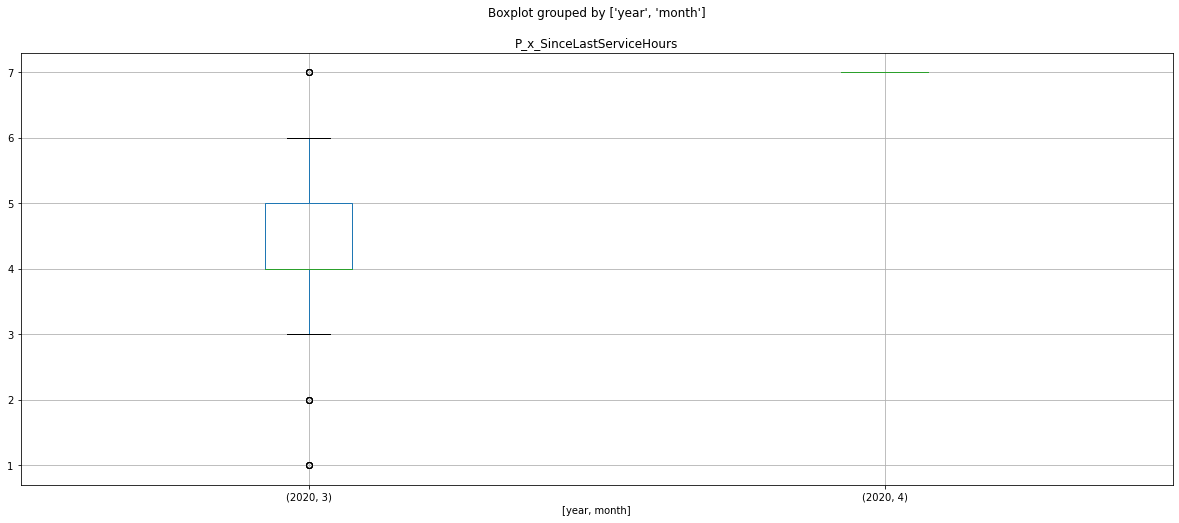

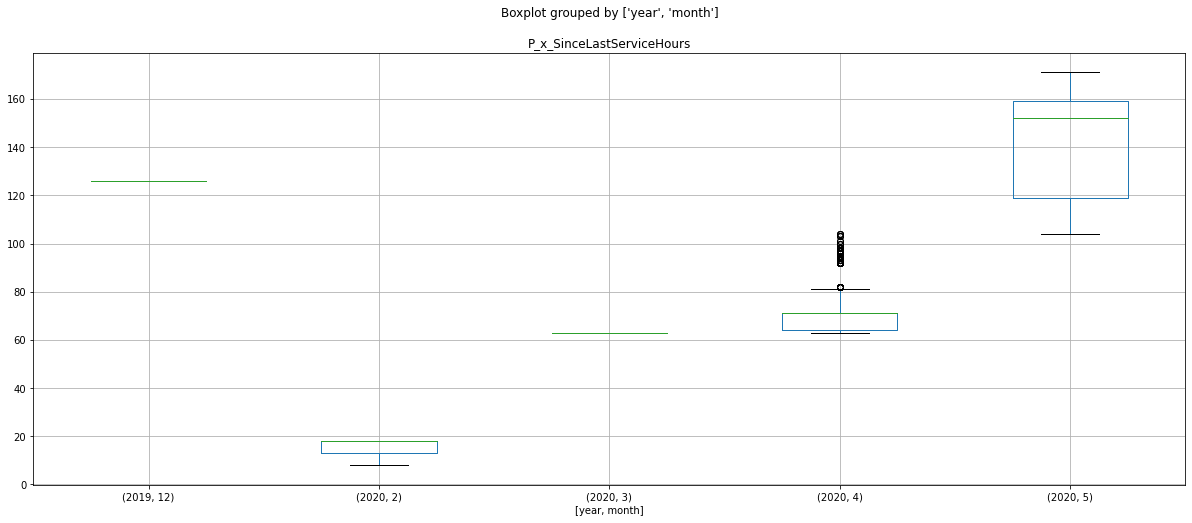

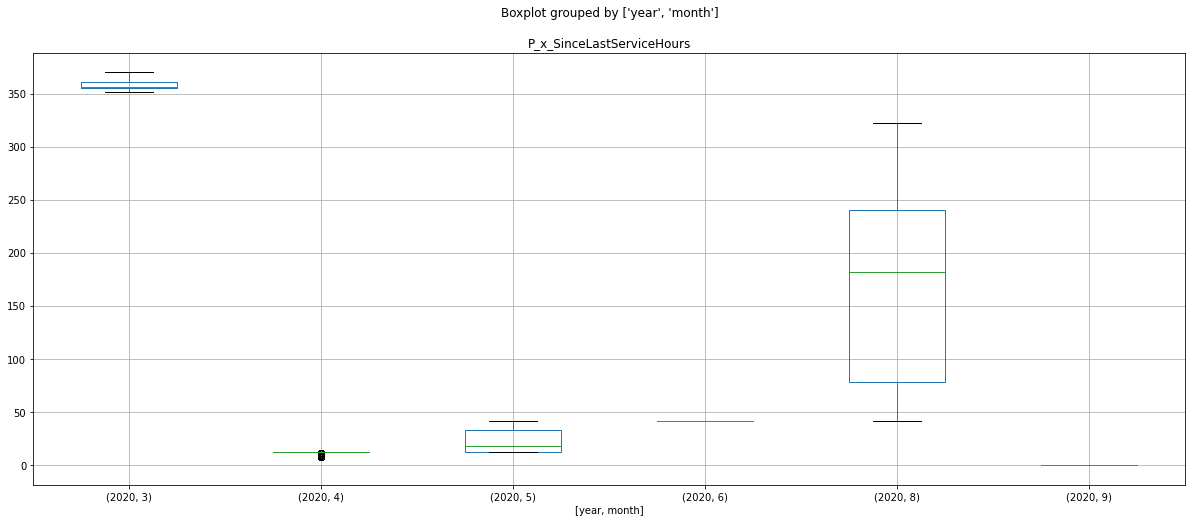

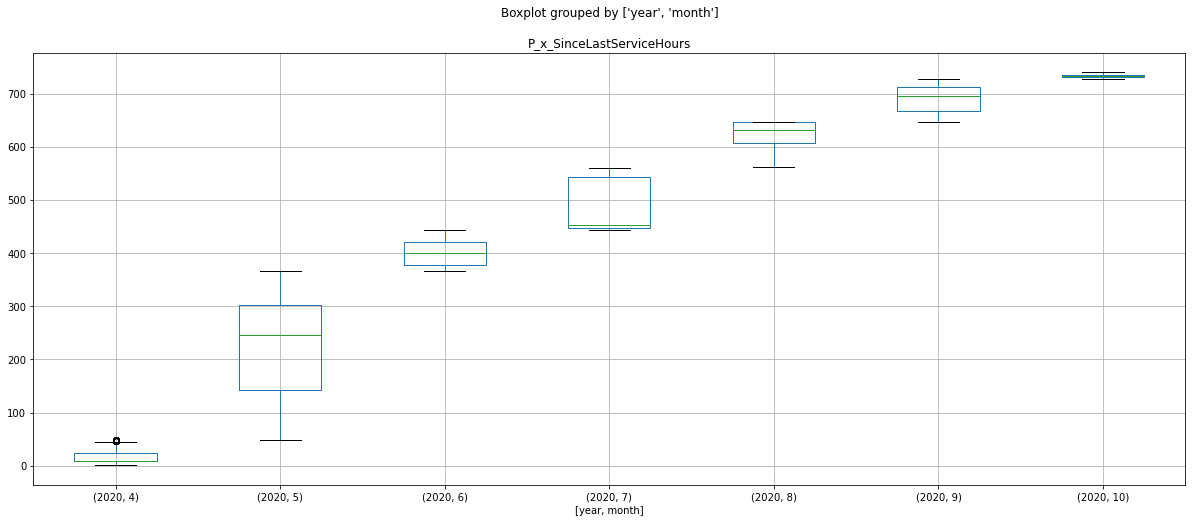

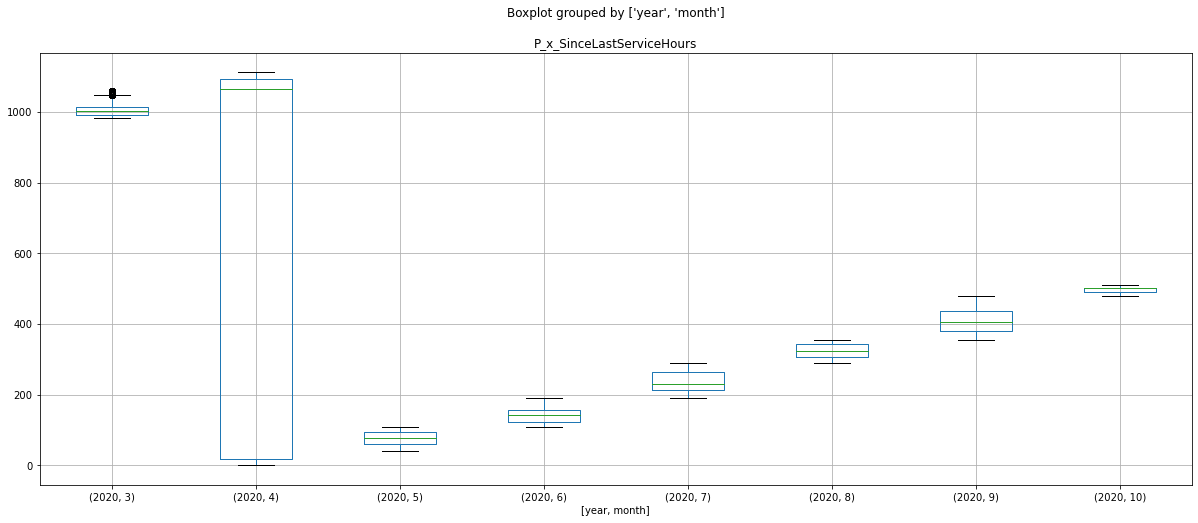

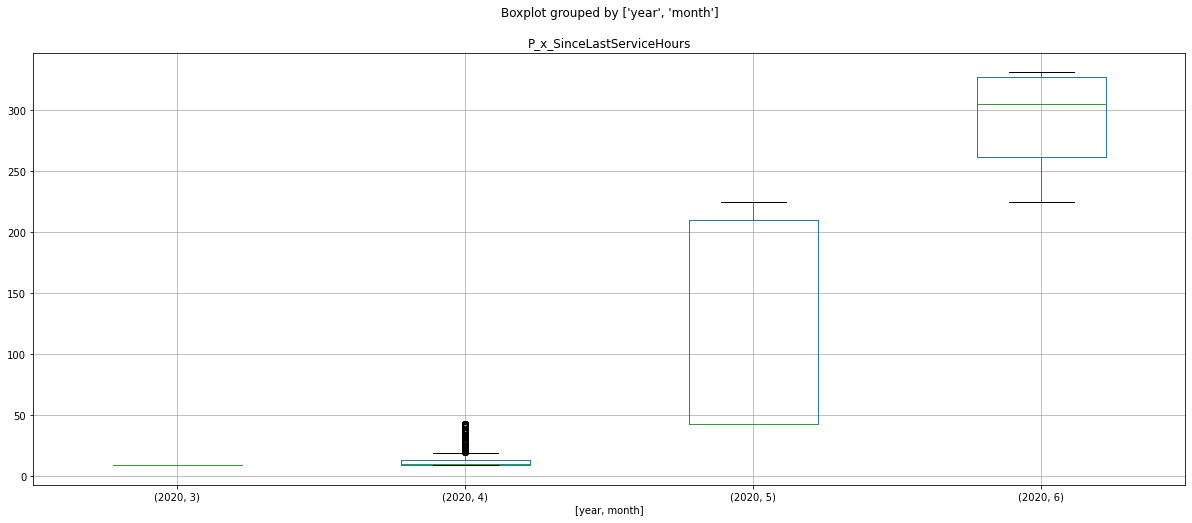

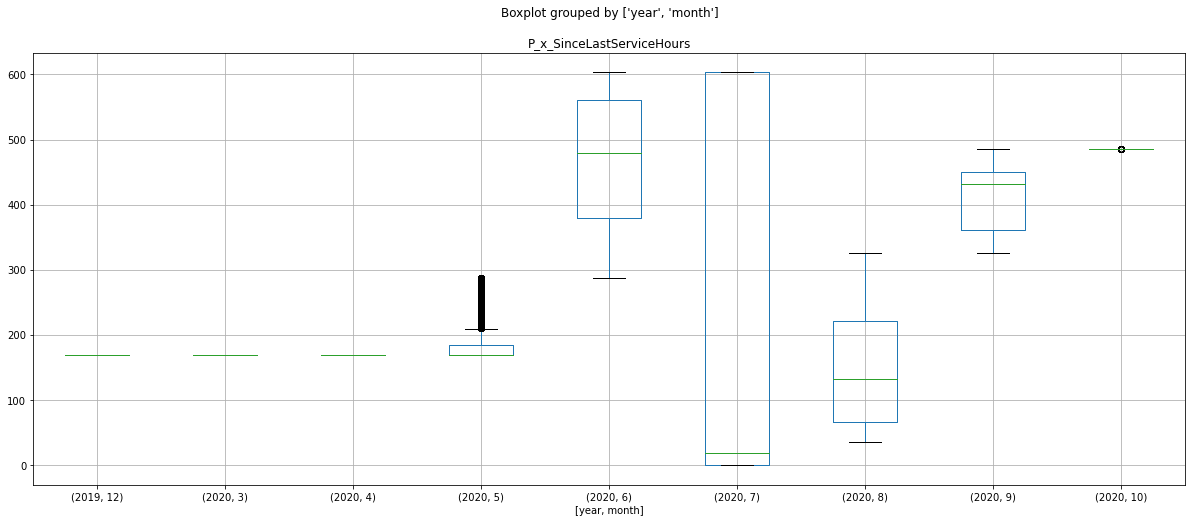

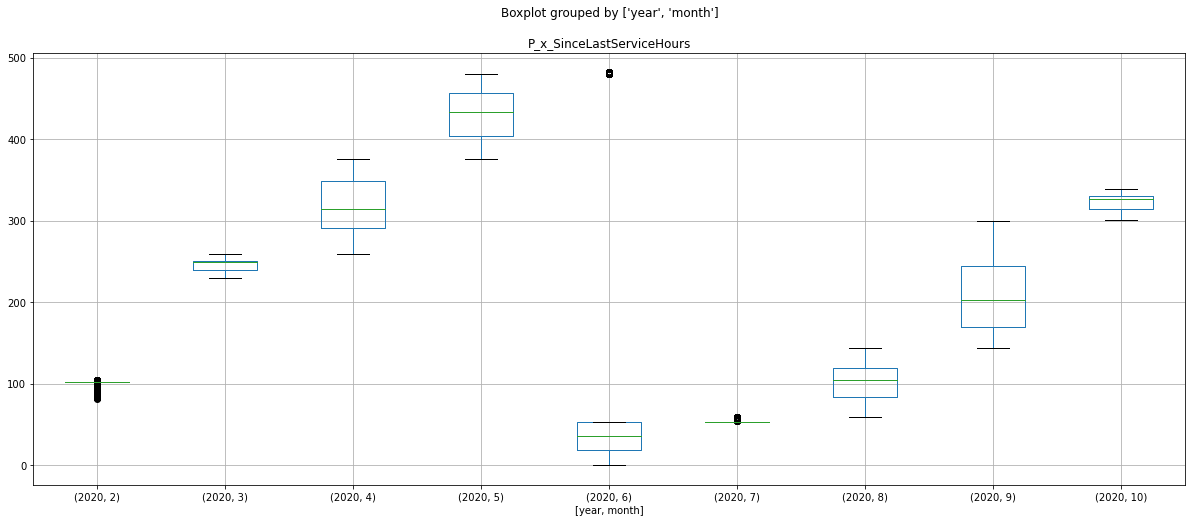

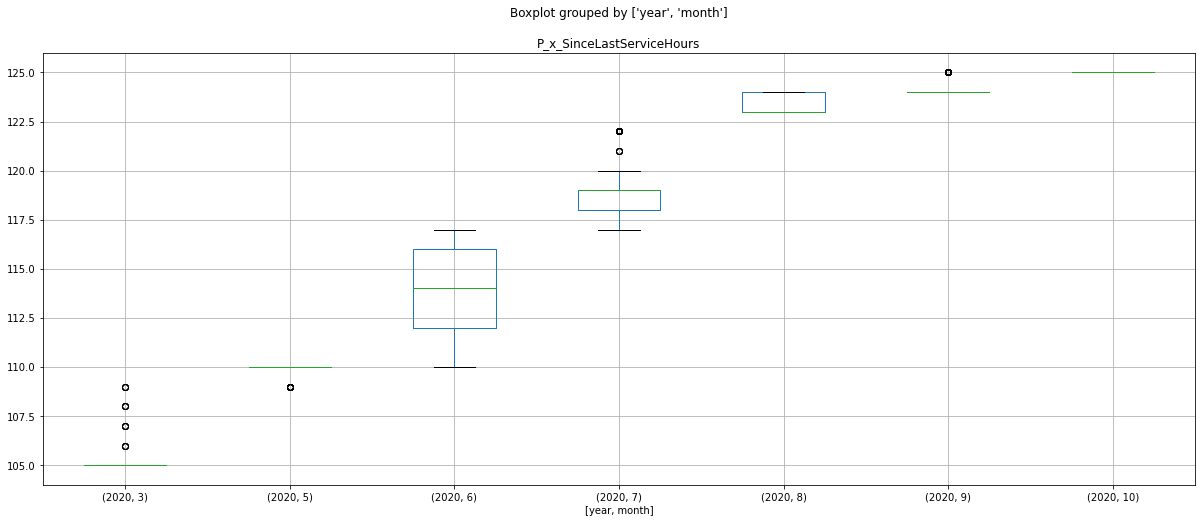

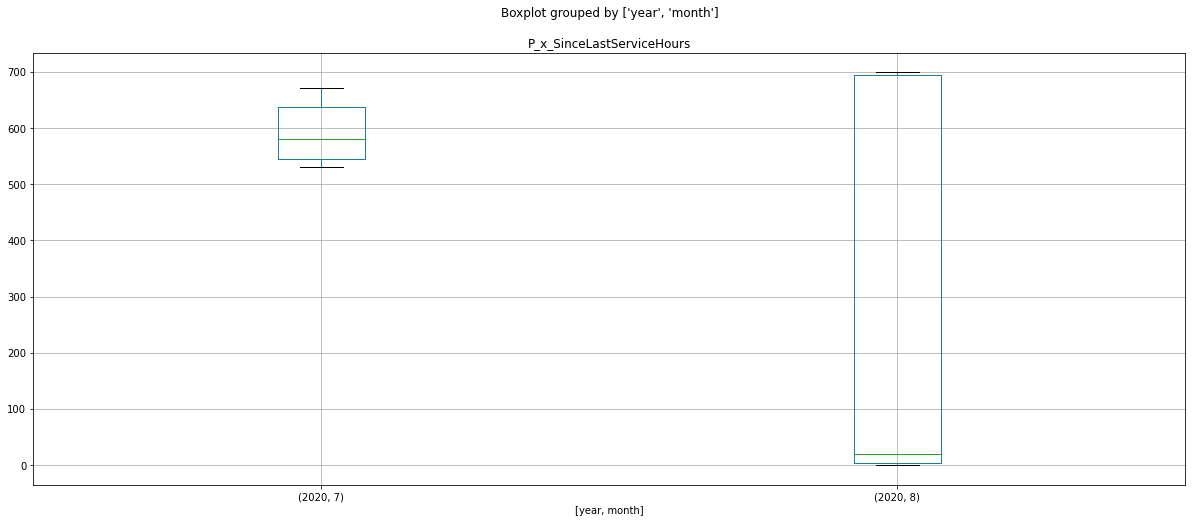

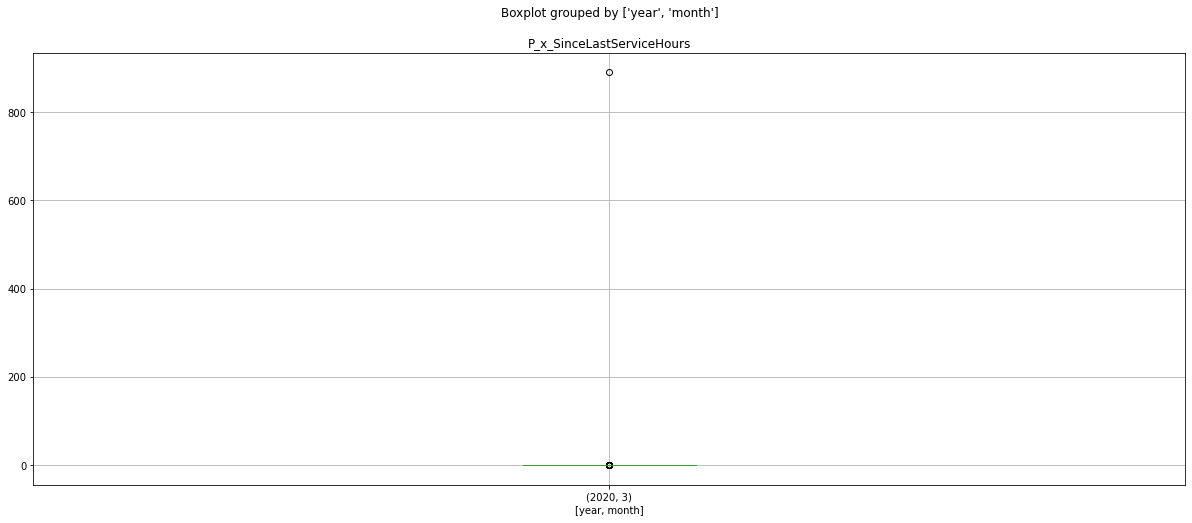

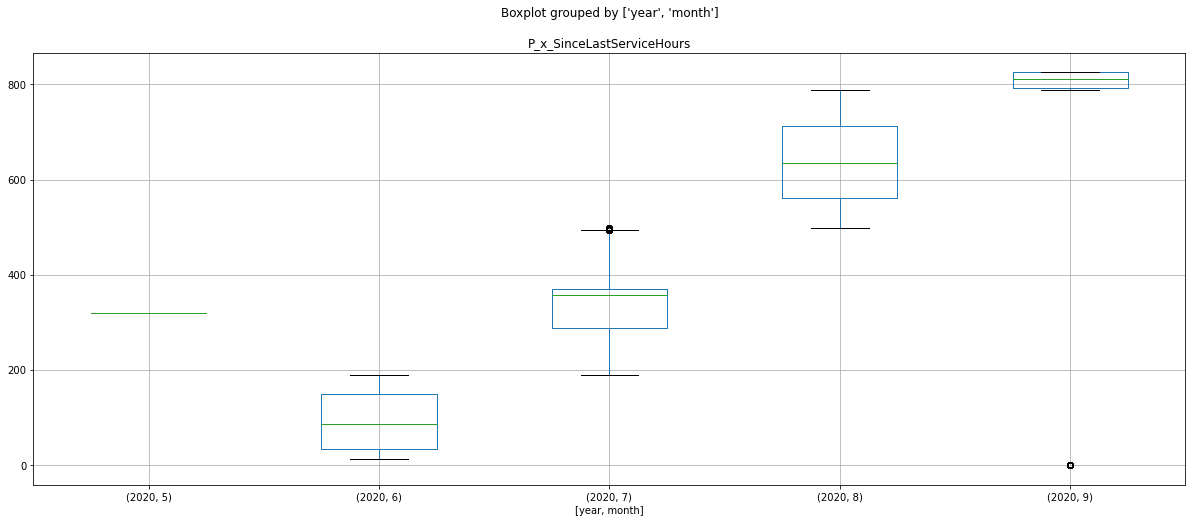

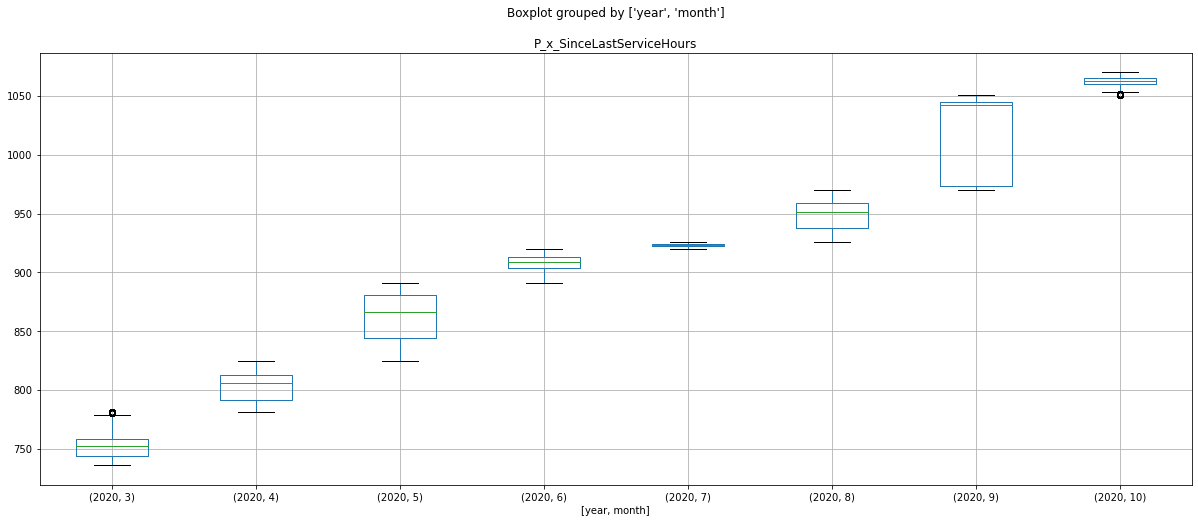

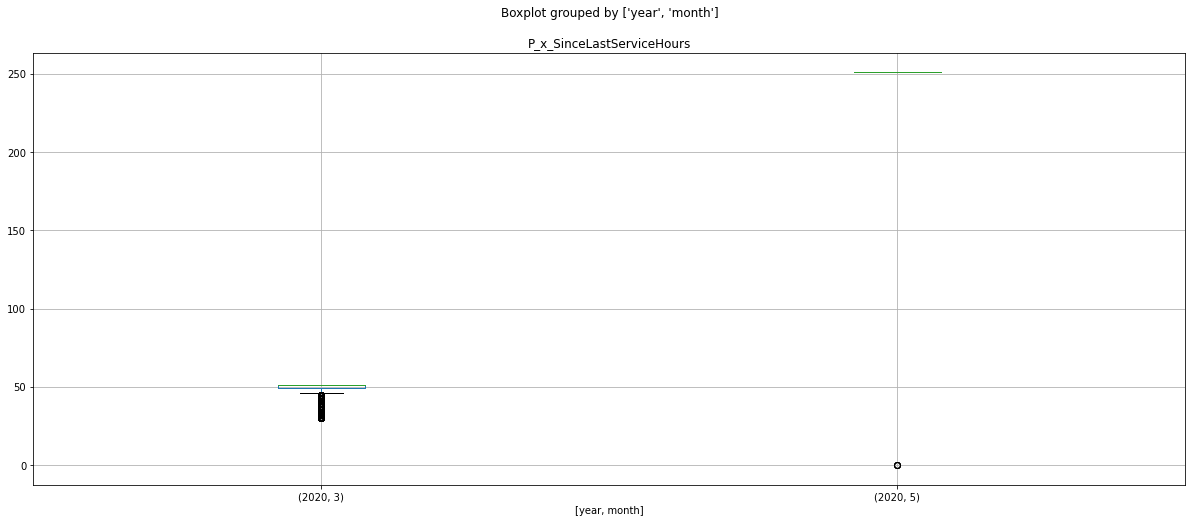

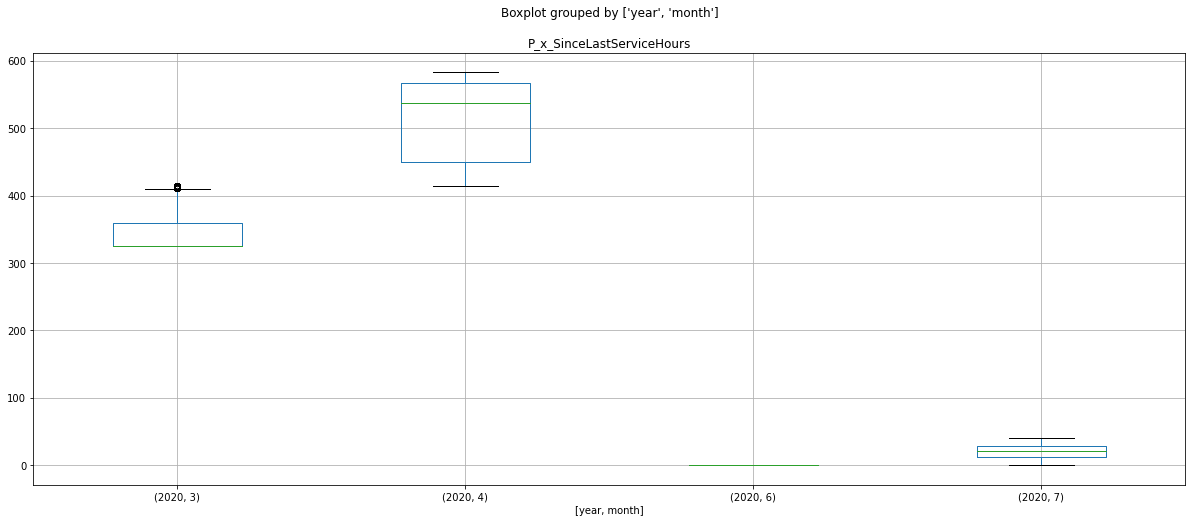

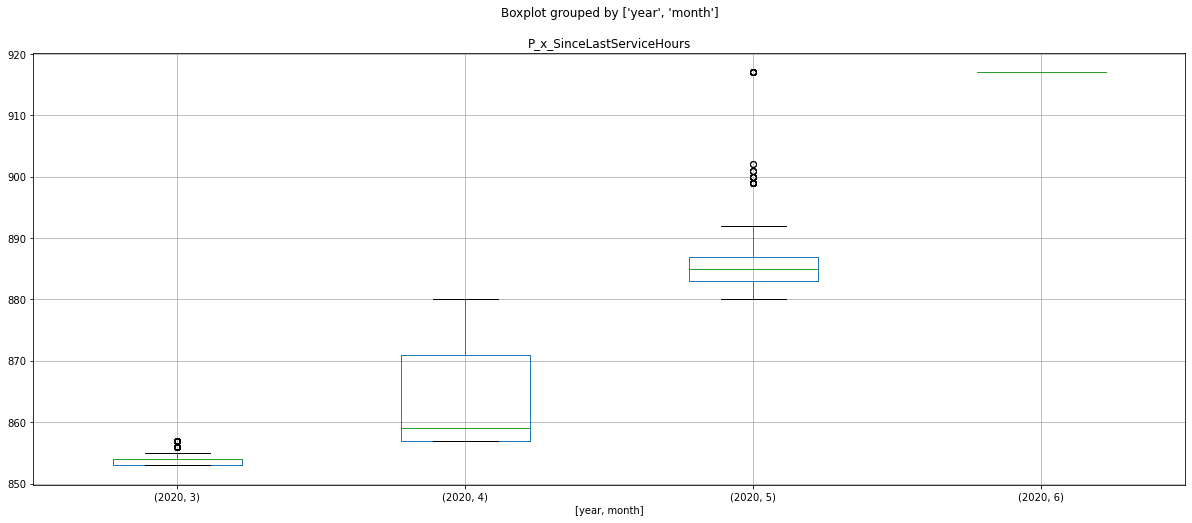

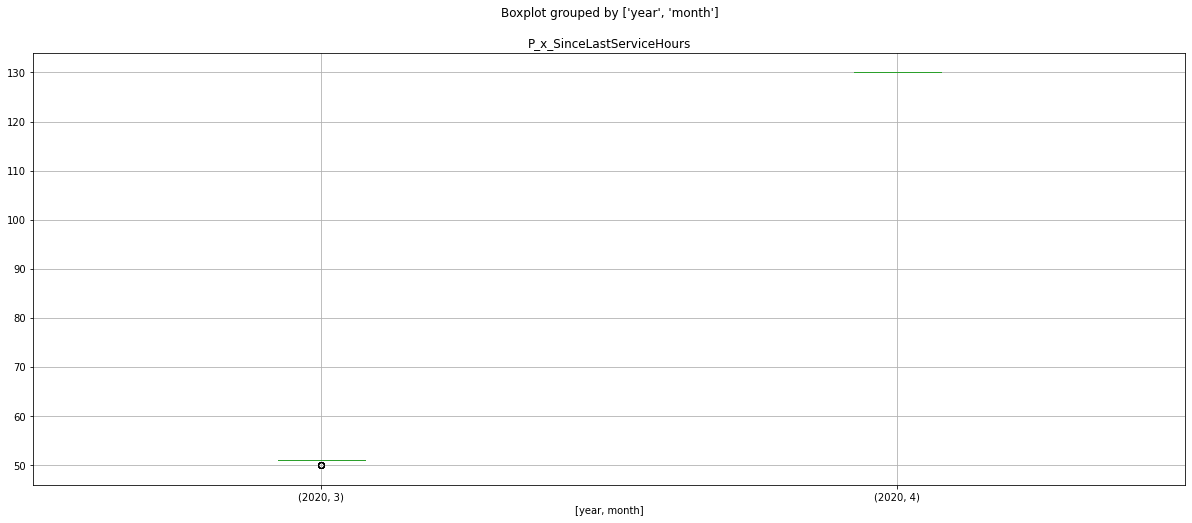

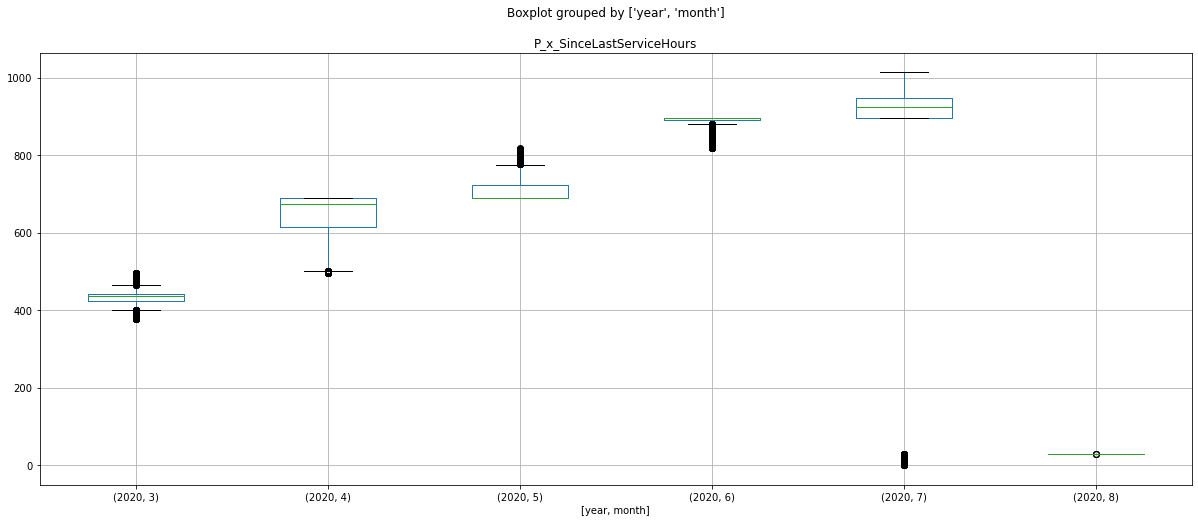

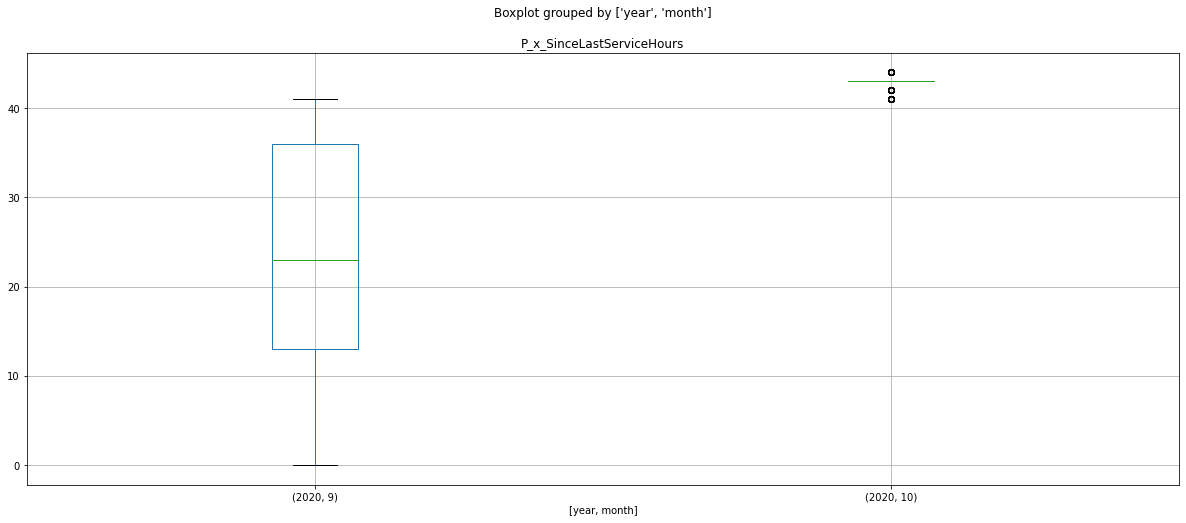

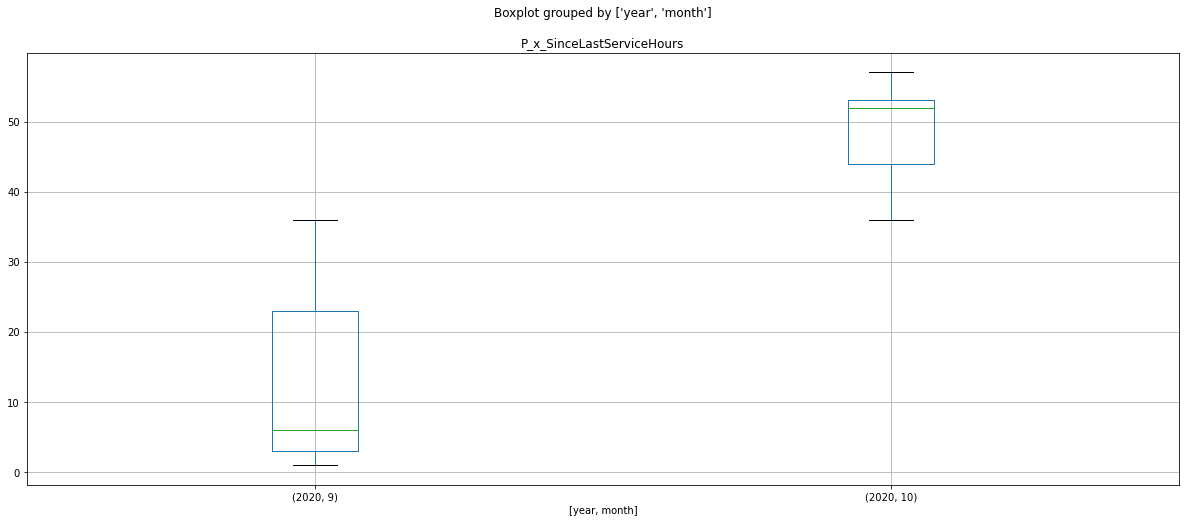

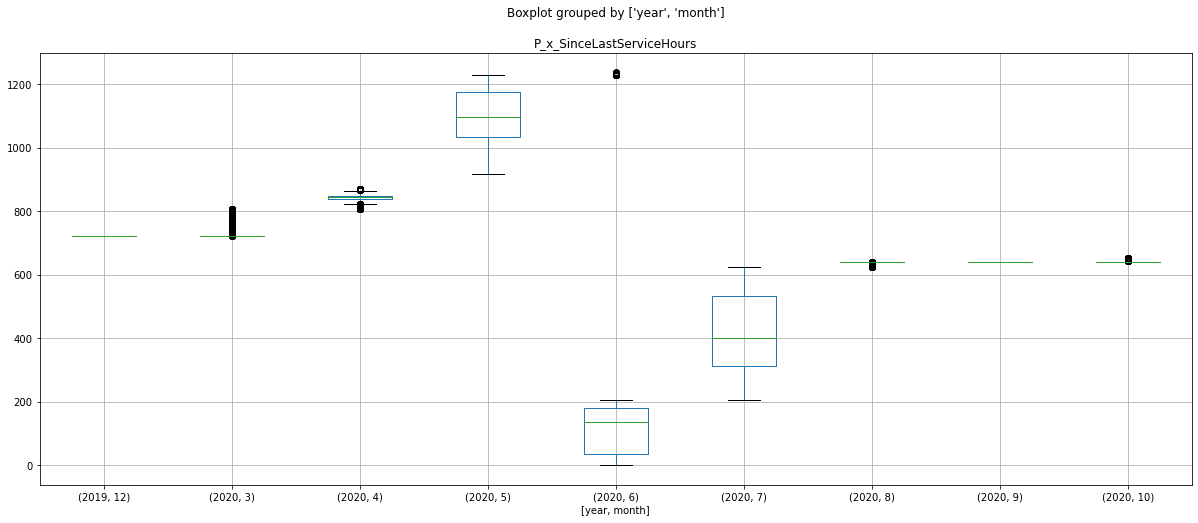

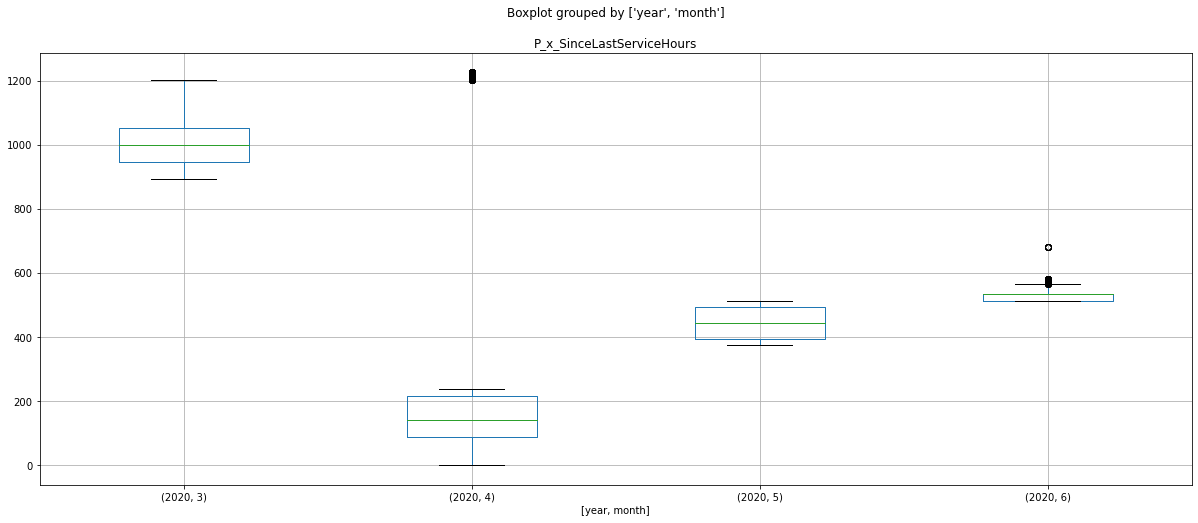

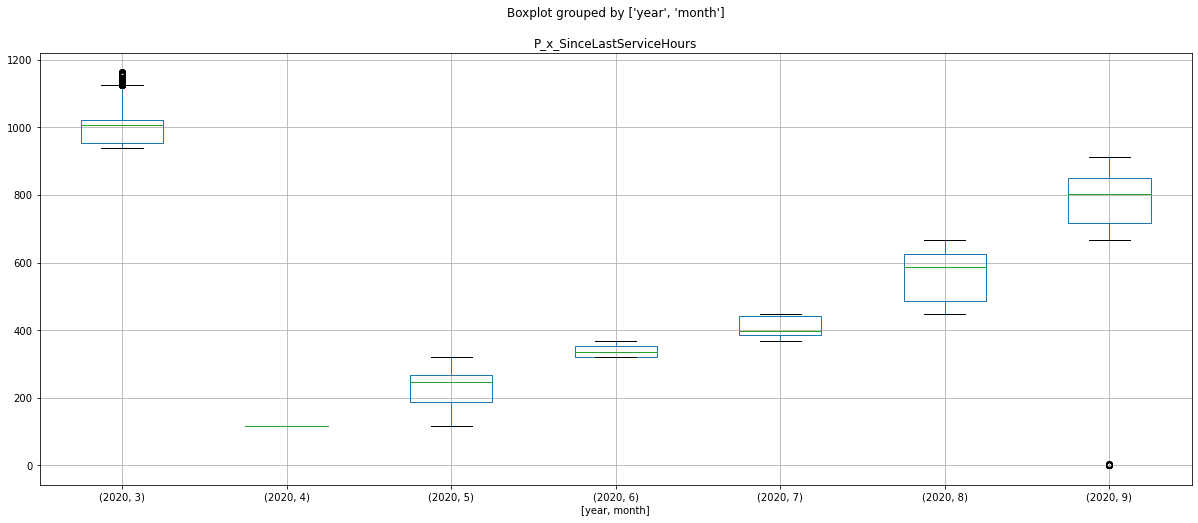

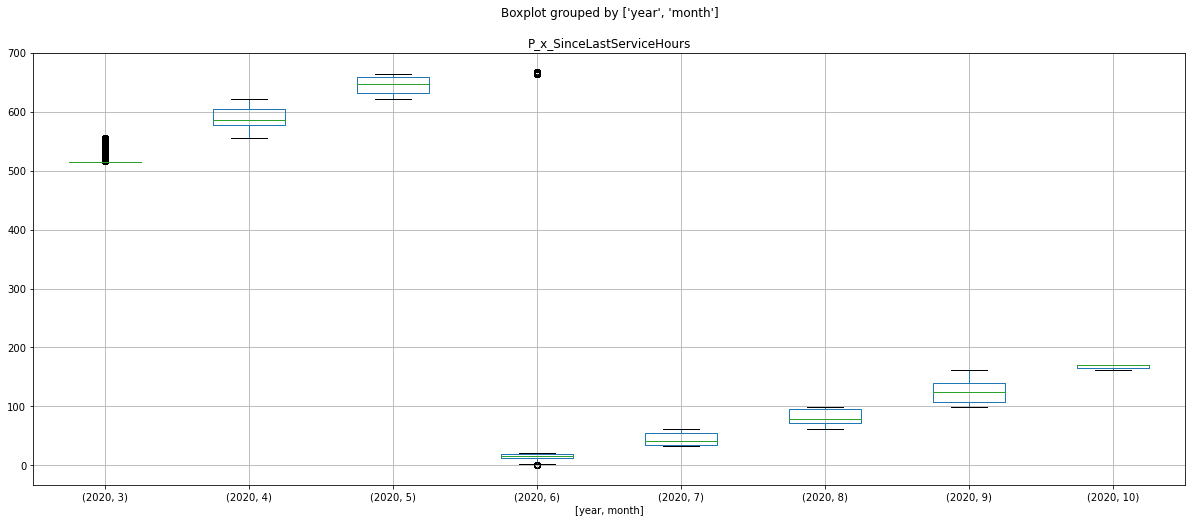

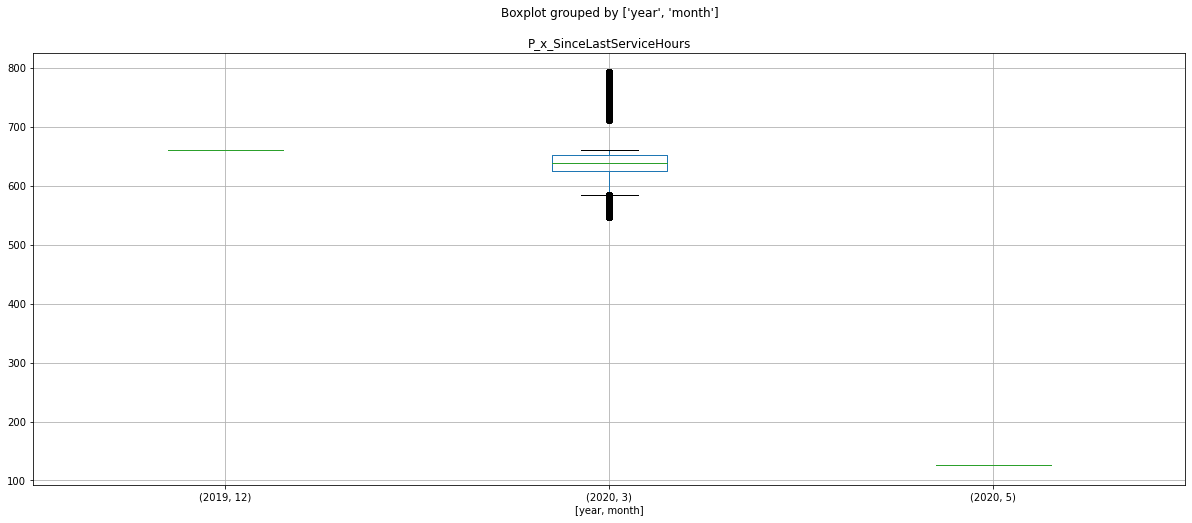

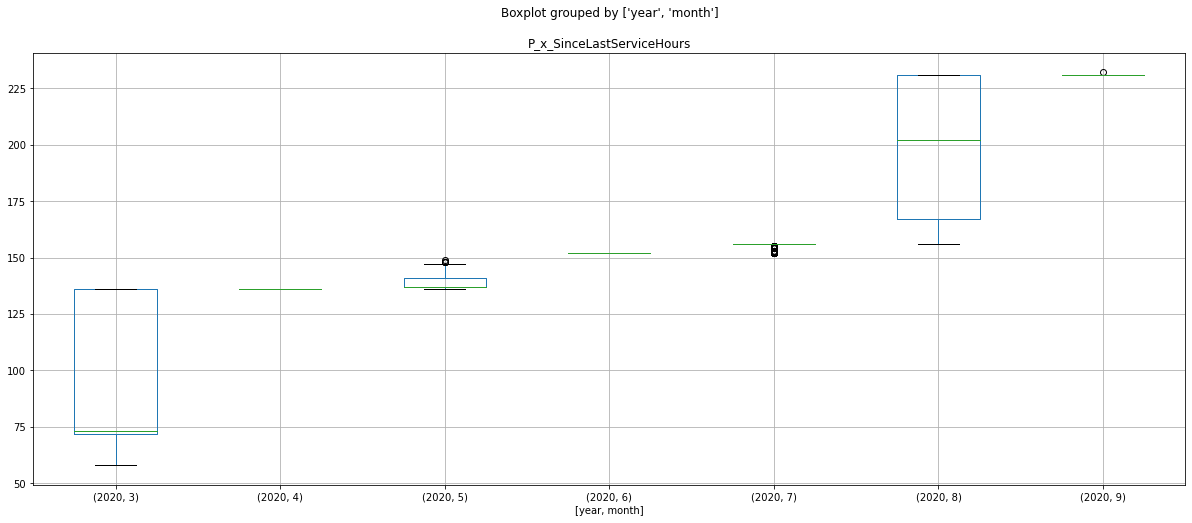

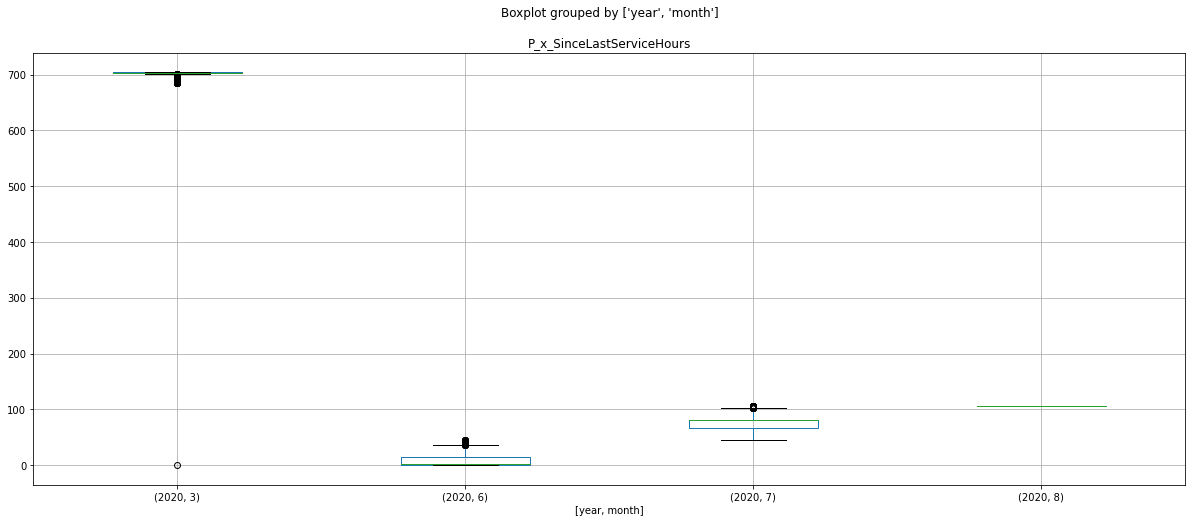

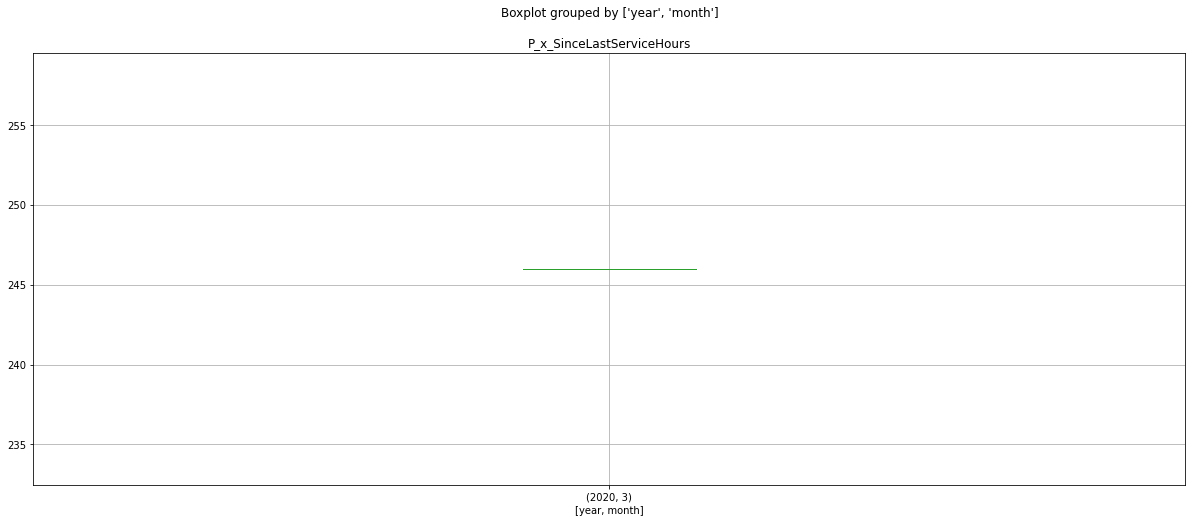

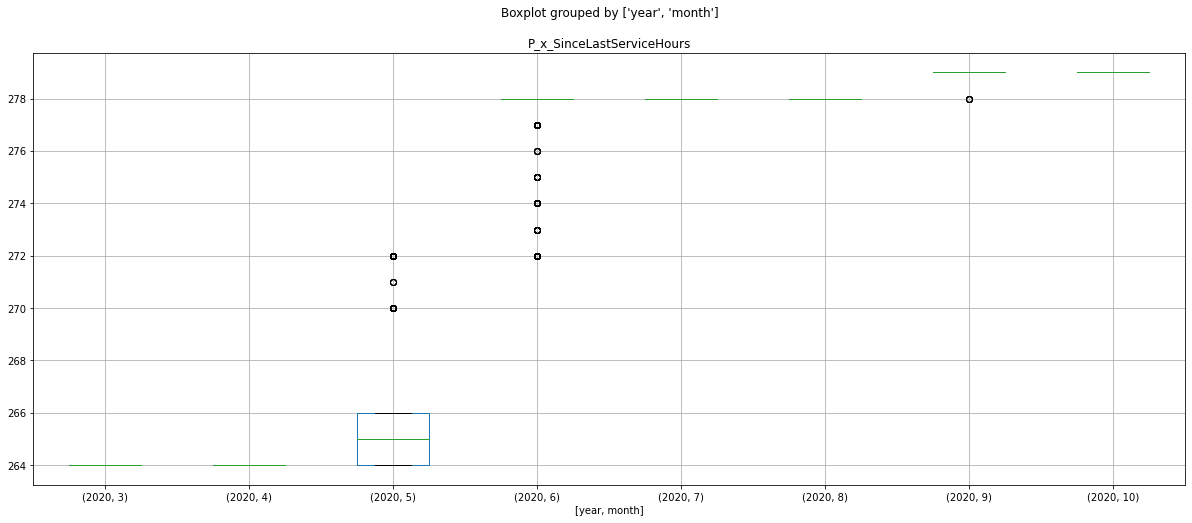

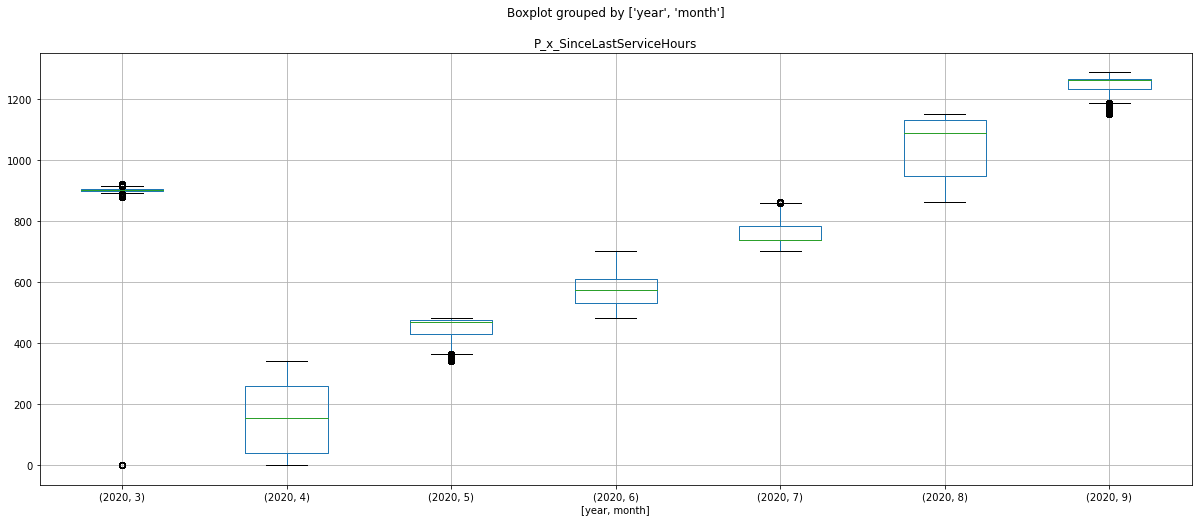

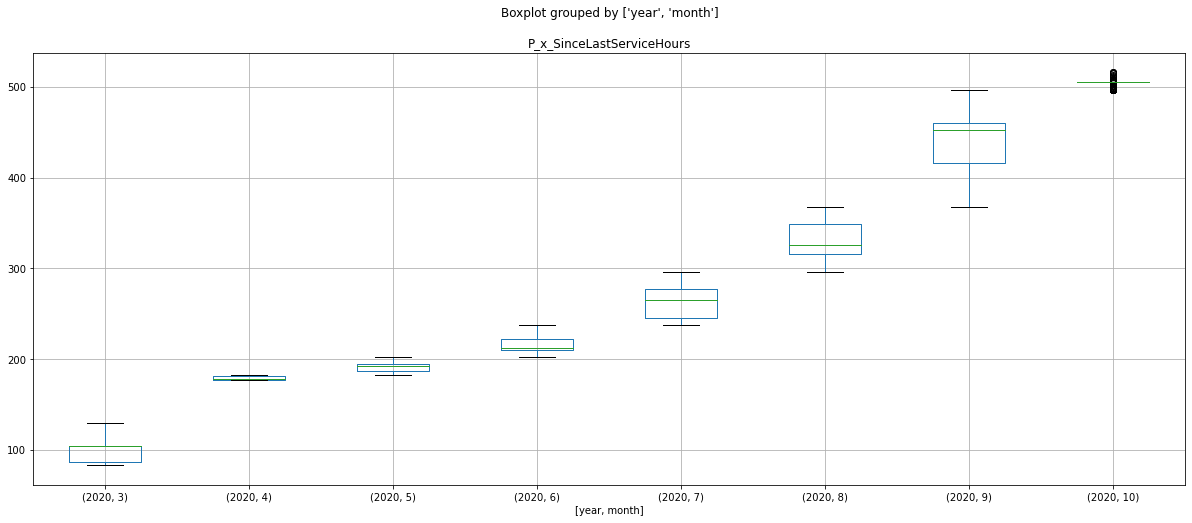

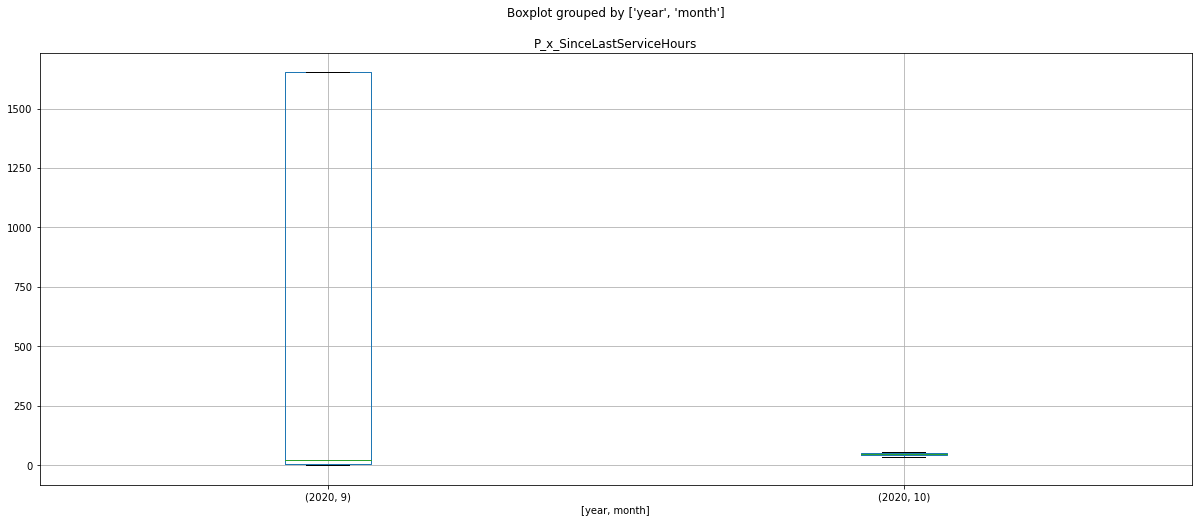

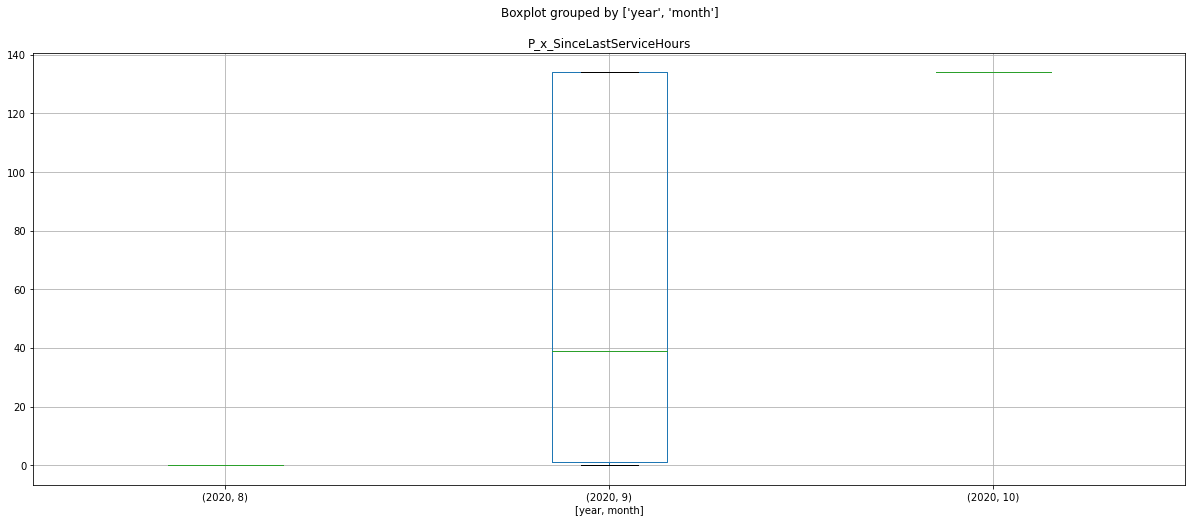

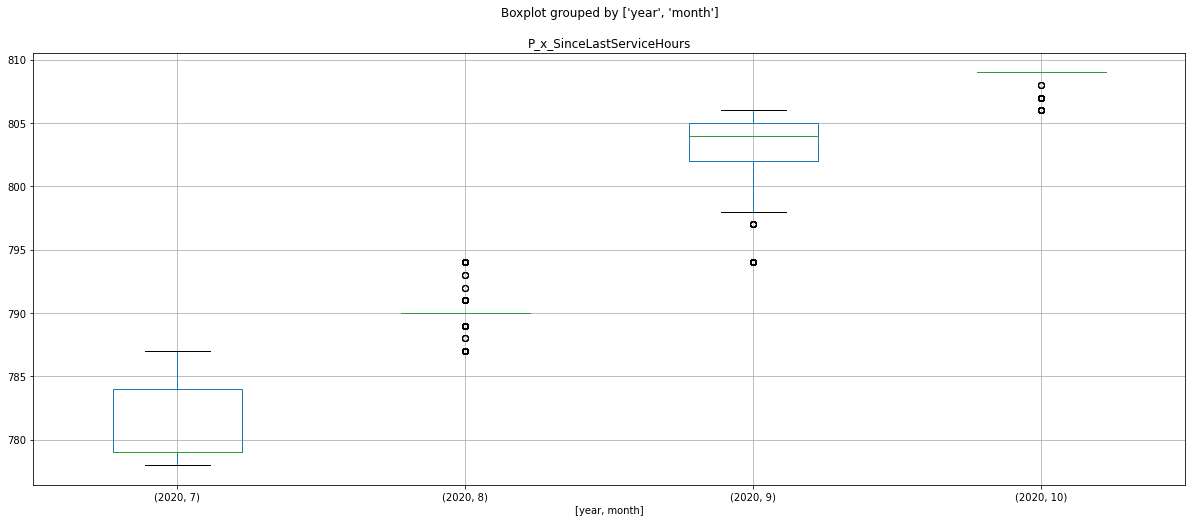

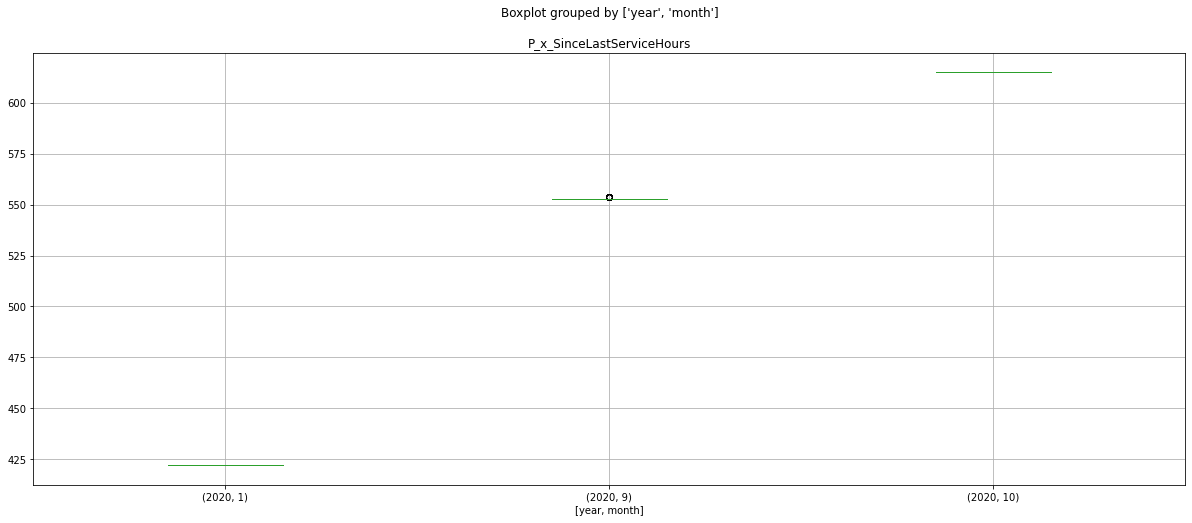

In [8]:
import warnings
warnings.filterwarnings('ignore')
for i in list(data['equipmentNumber'].unique()):
    data[data['equipmentNumber']==i].boxplot(column=['P_x_SinceLastServiceHours'], by=['year', 'month'], figsize = (20,8))
#     plt.figure(figsize=(20,8))
#     plt.hist(df[df['equipmentNumber']==i]['P_x_-Hou_OperatingLastService'], 100, facecolor='blue', alpha=0.5)
#     plt.show()

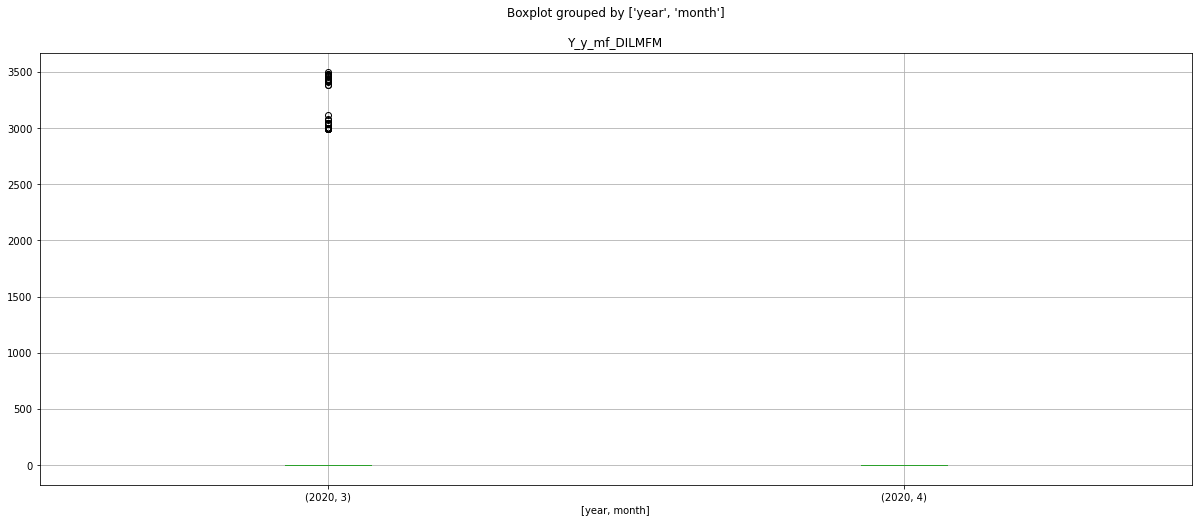

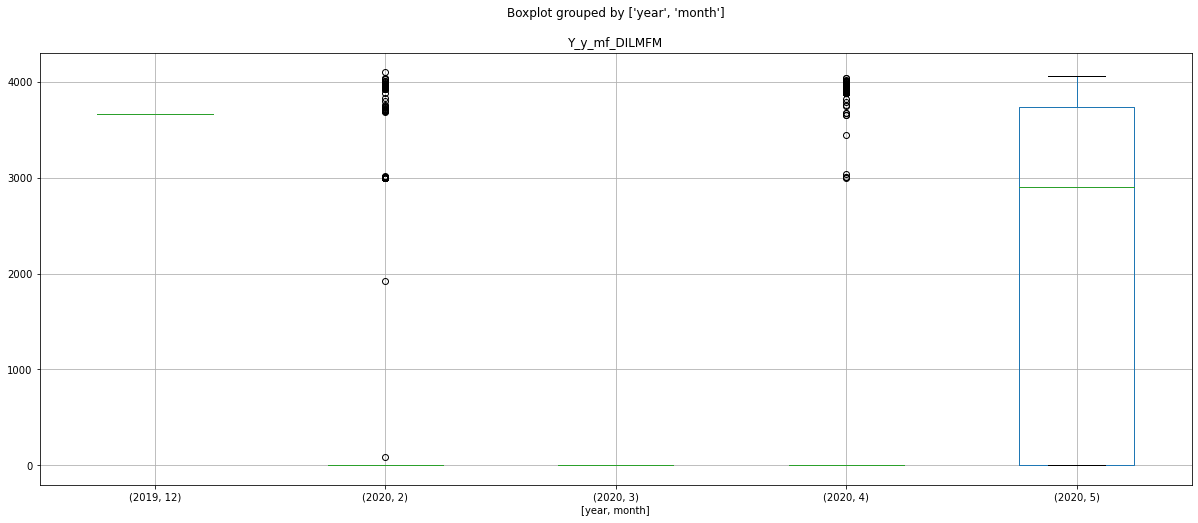

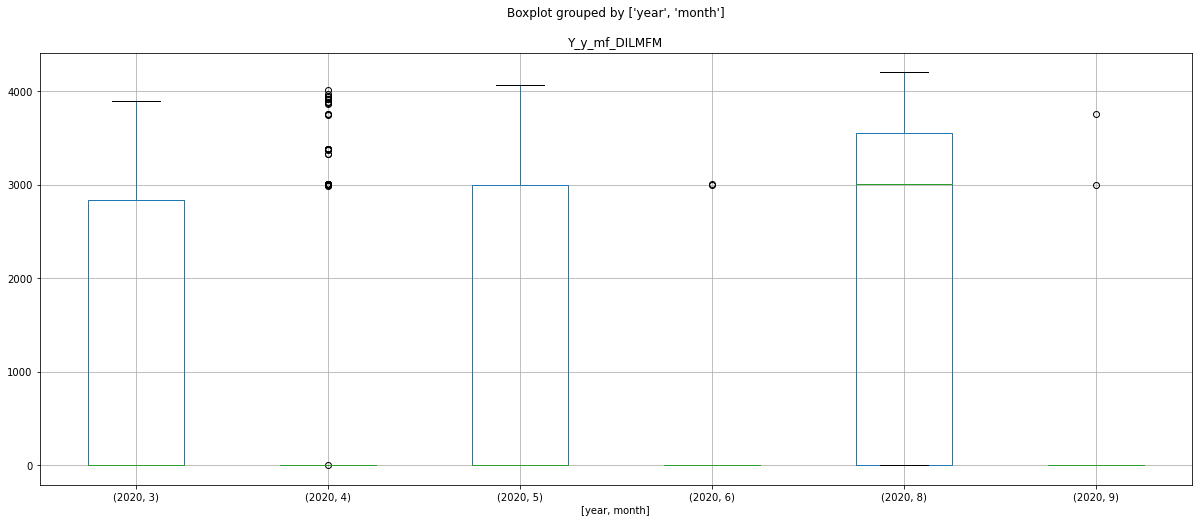

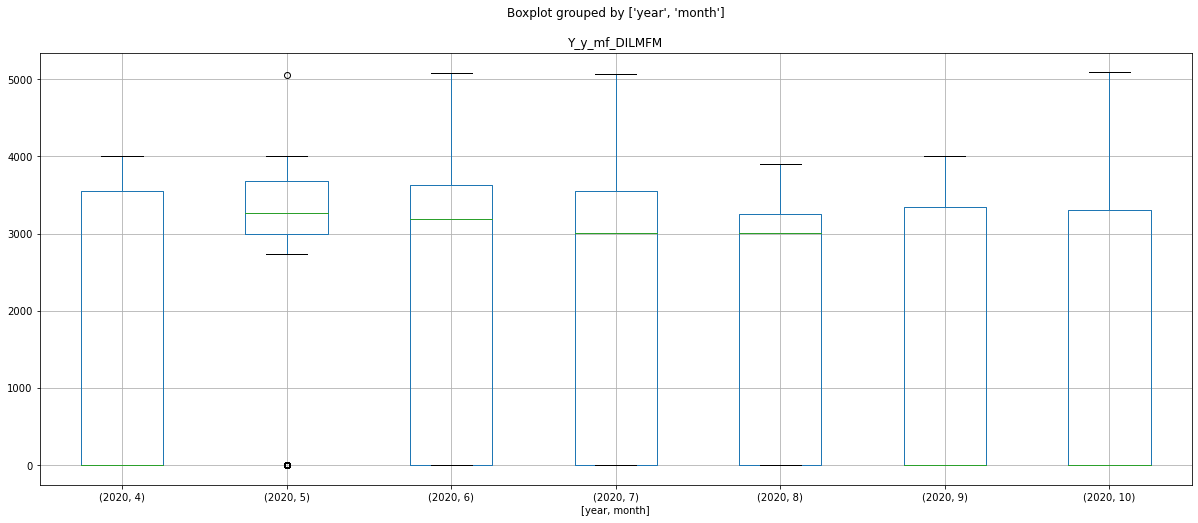

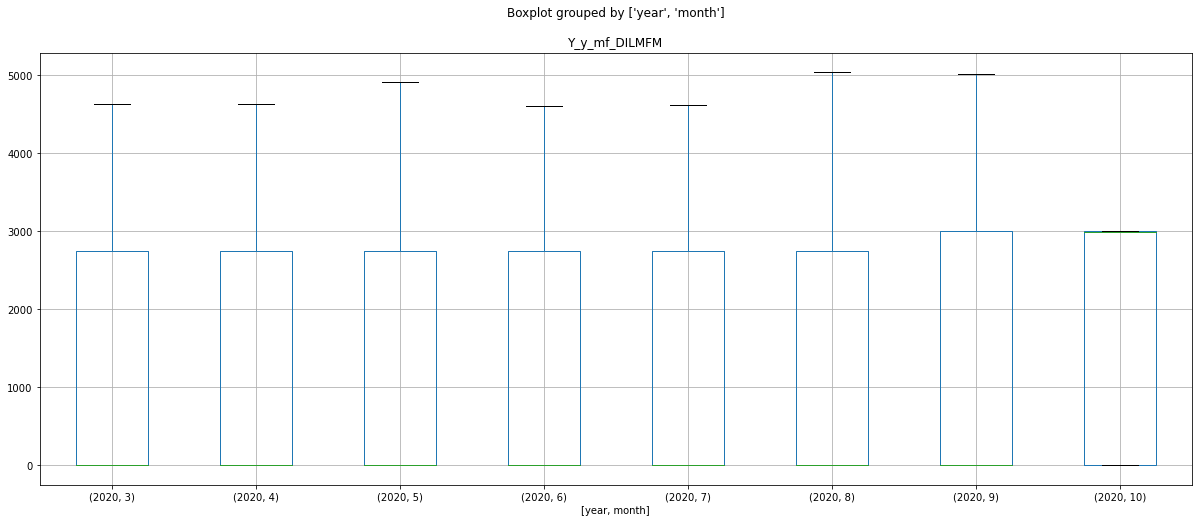

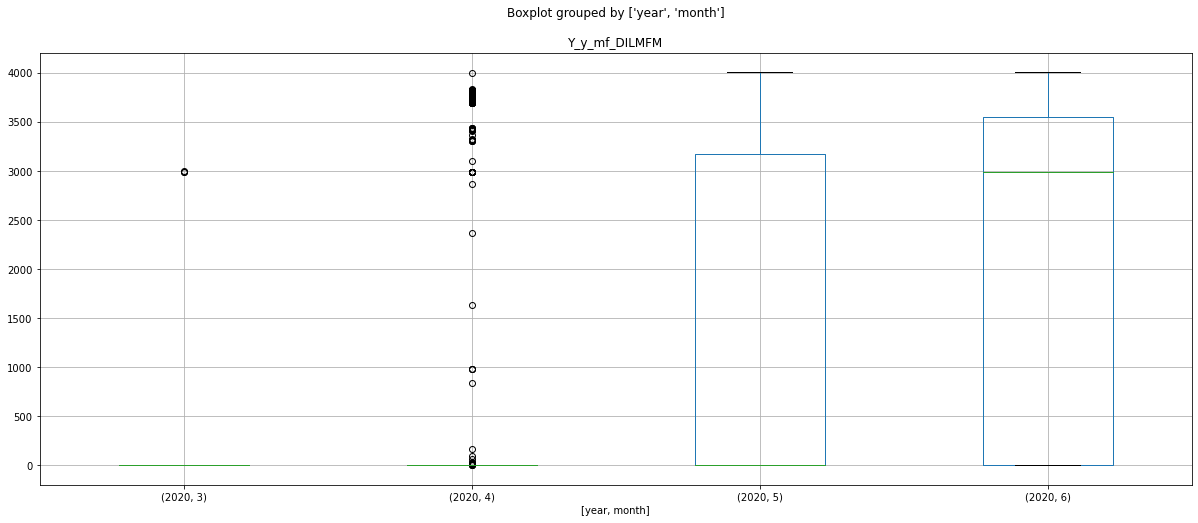

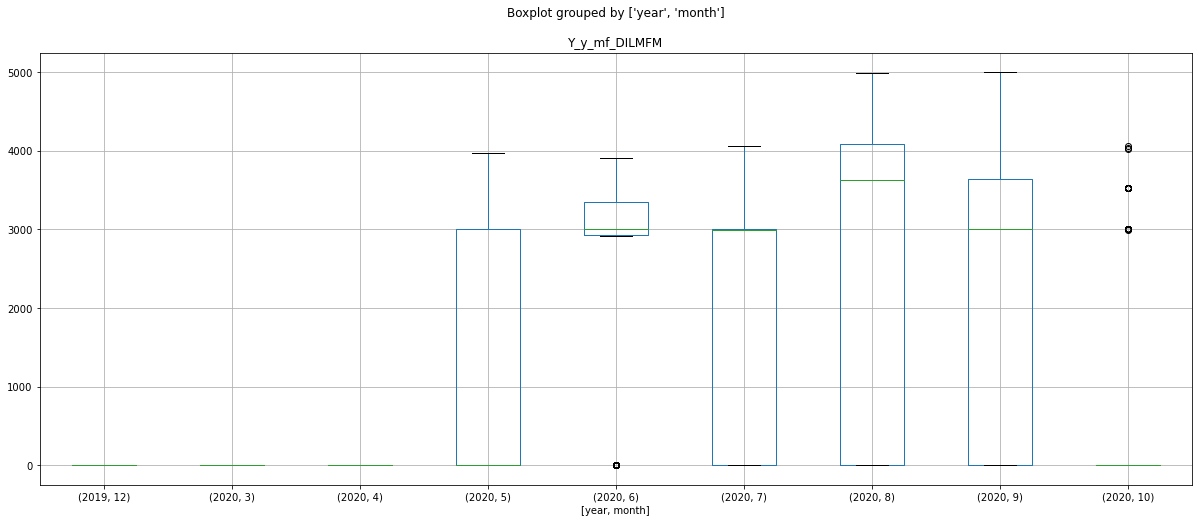

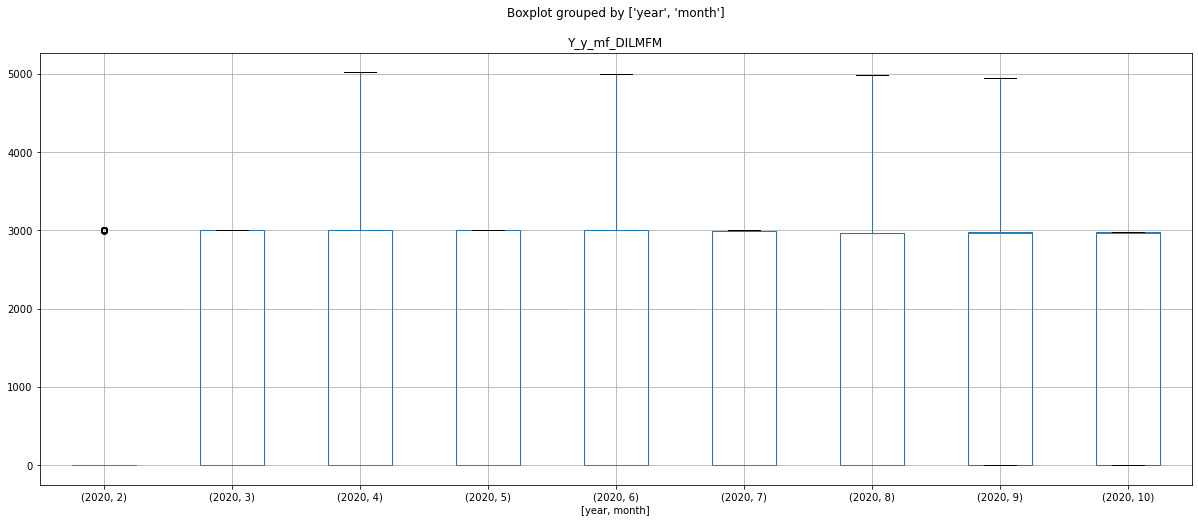

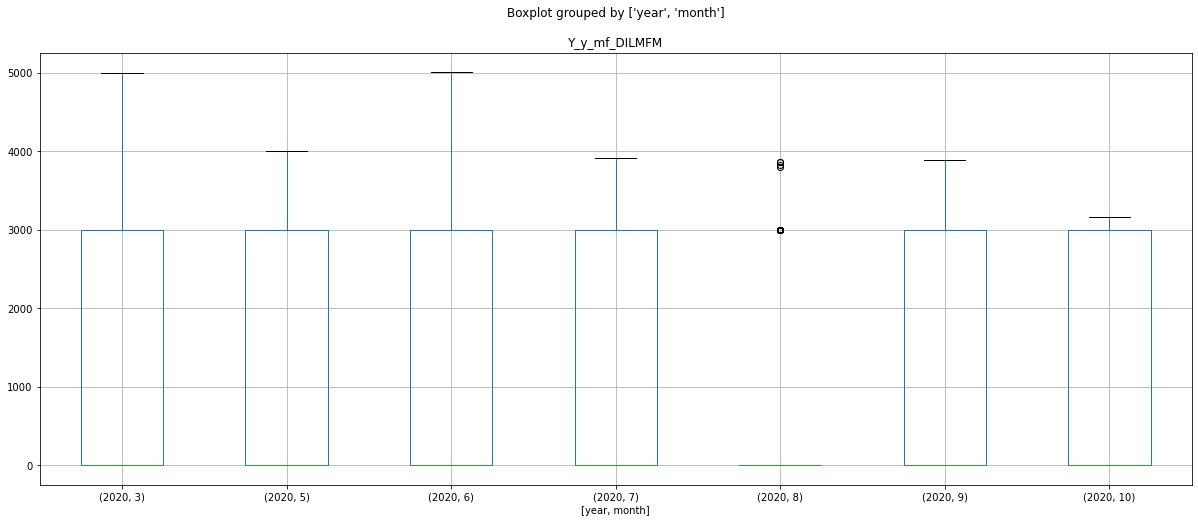

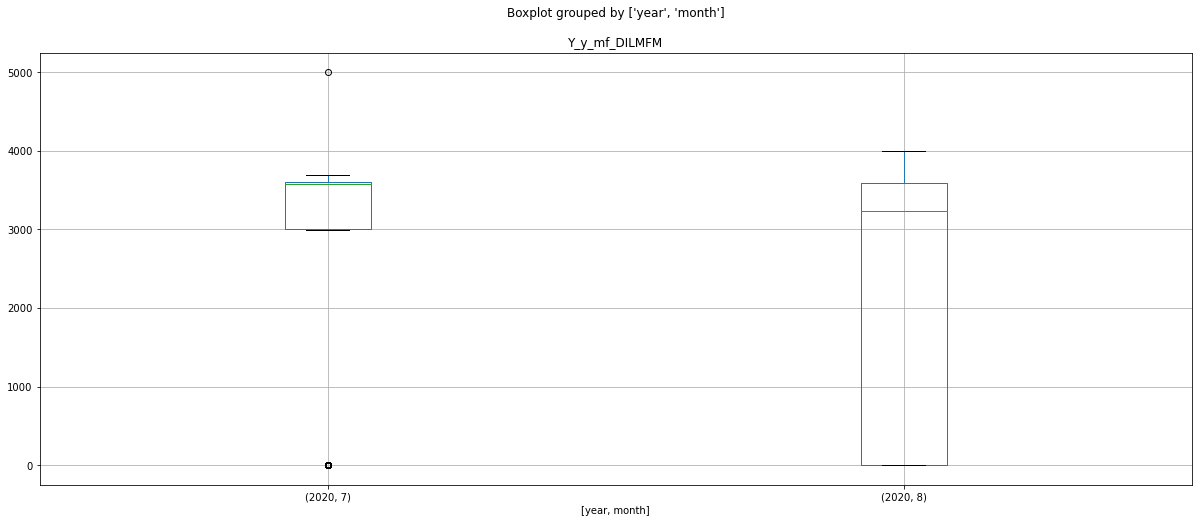

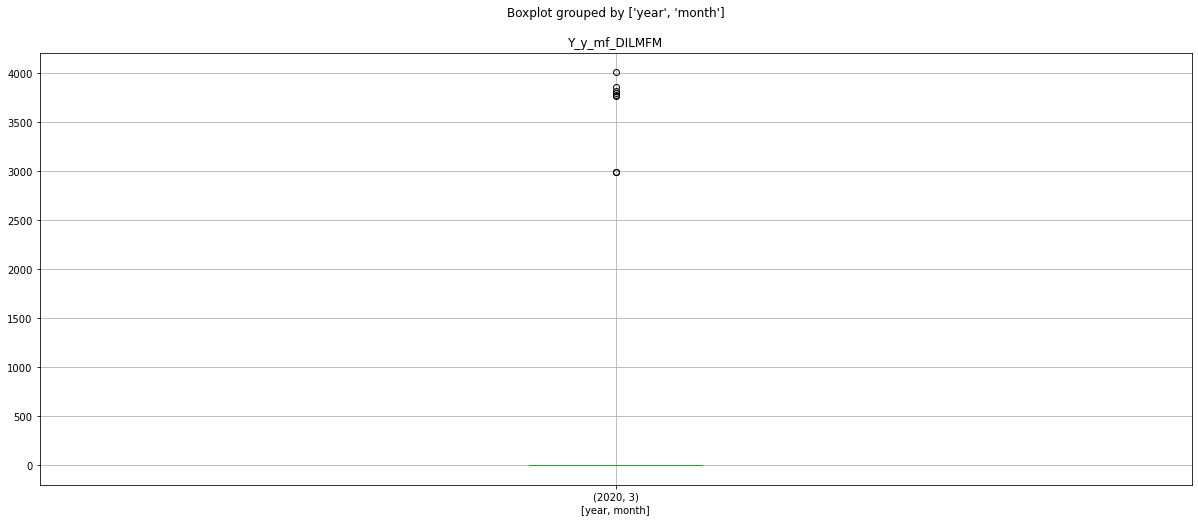

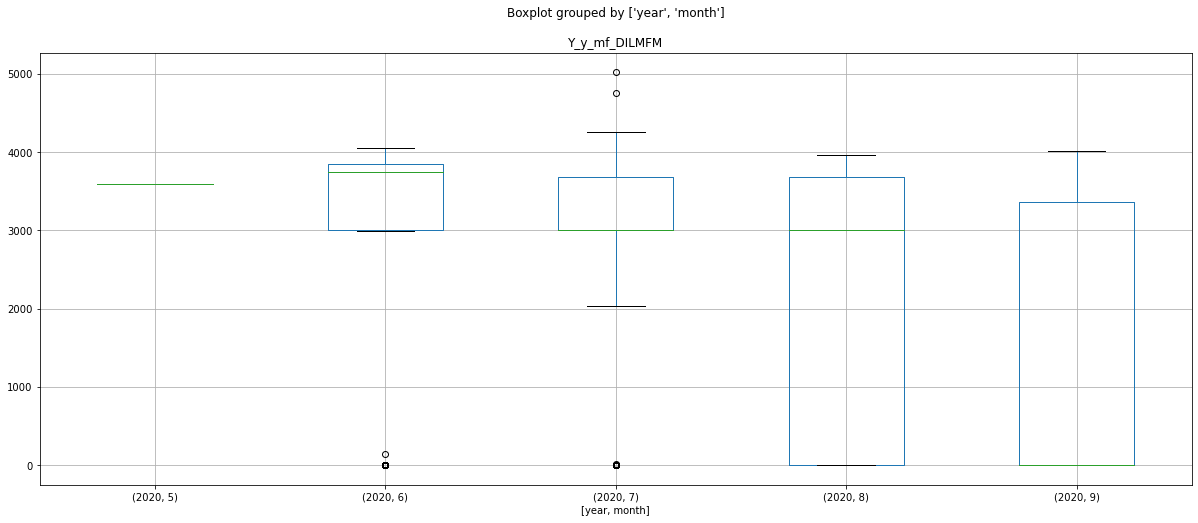

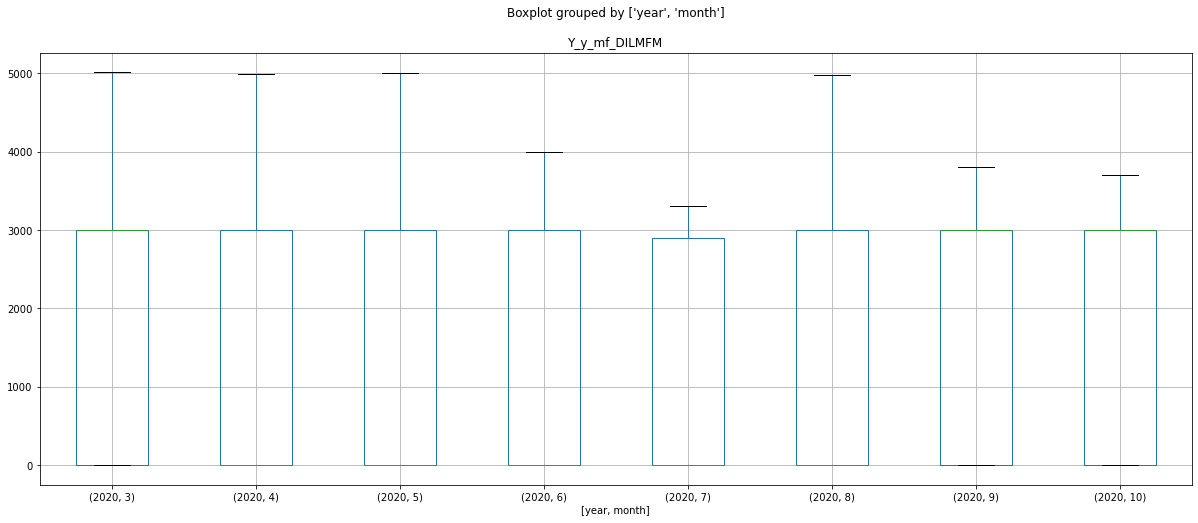

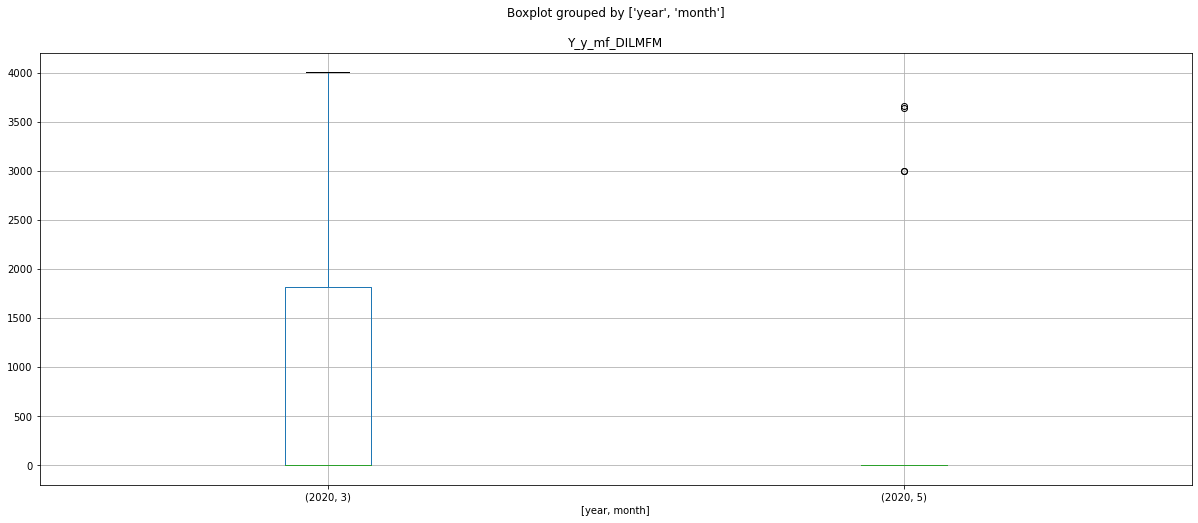

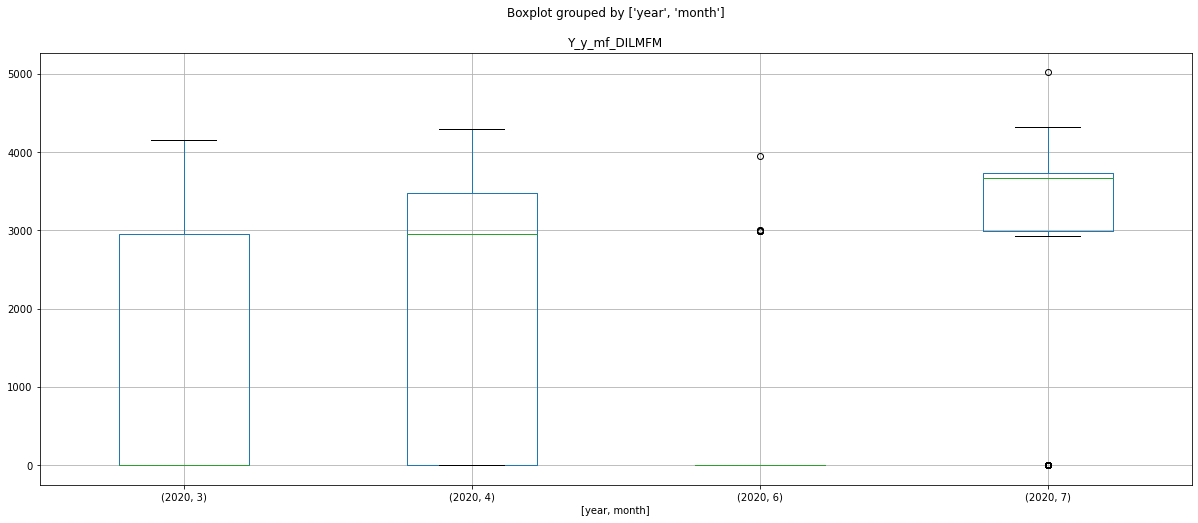

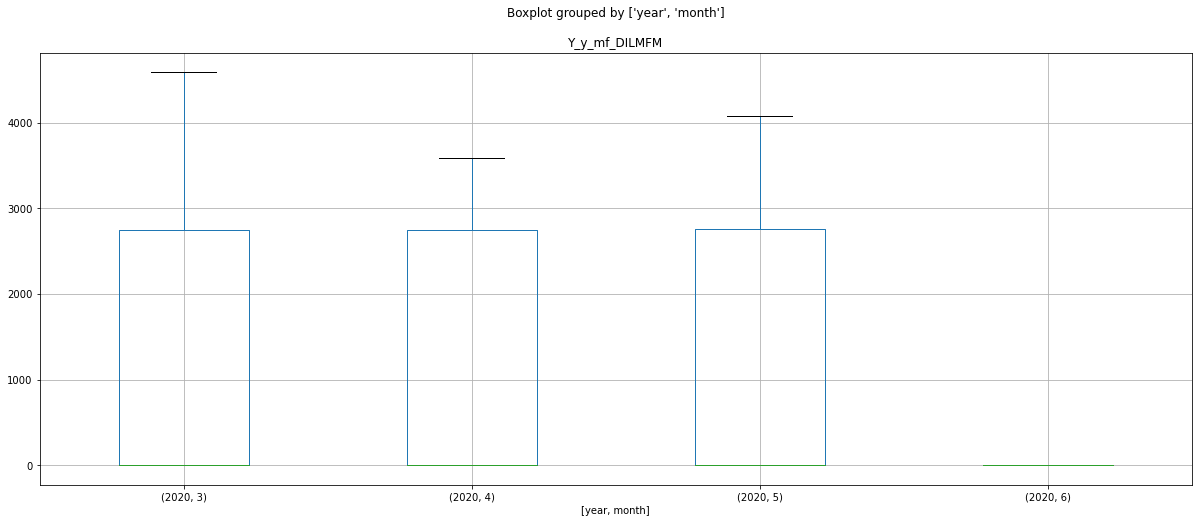

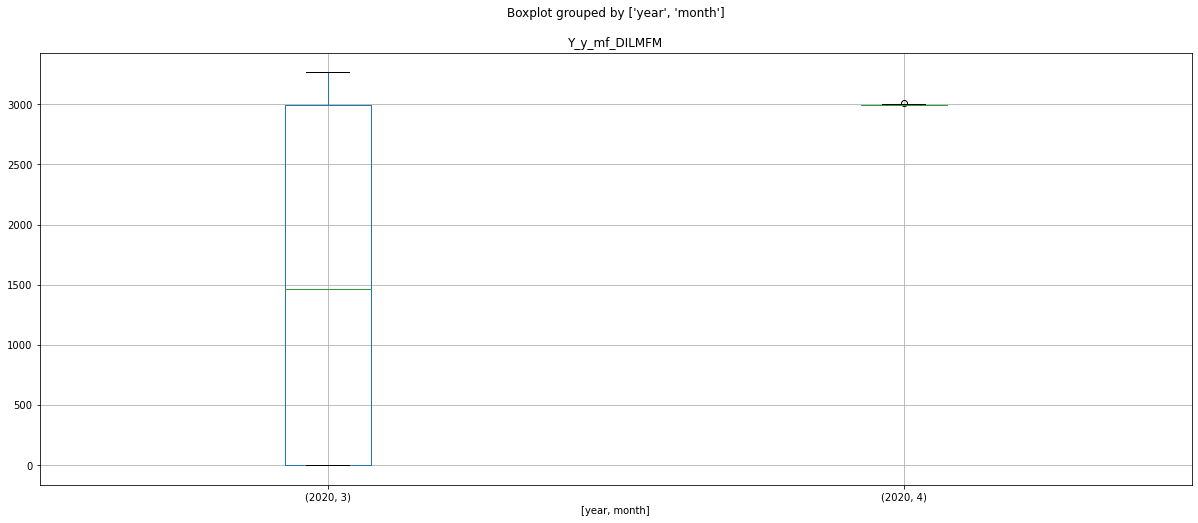

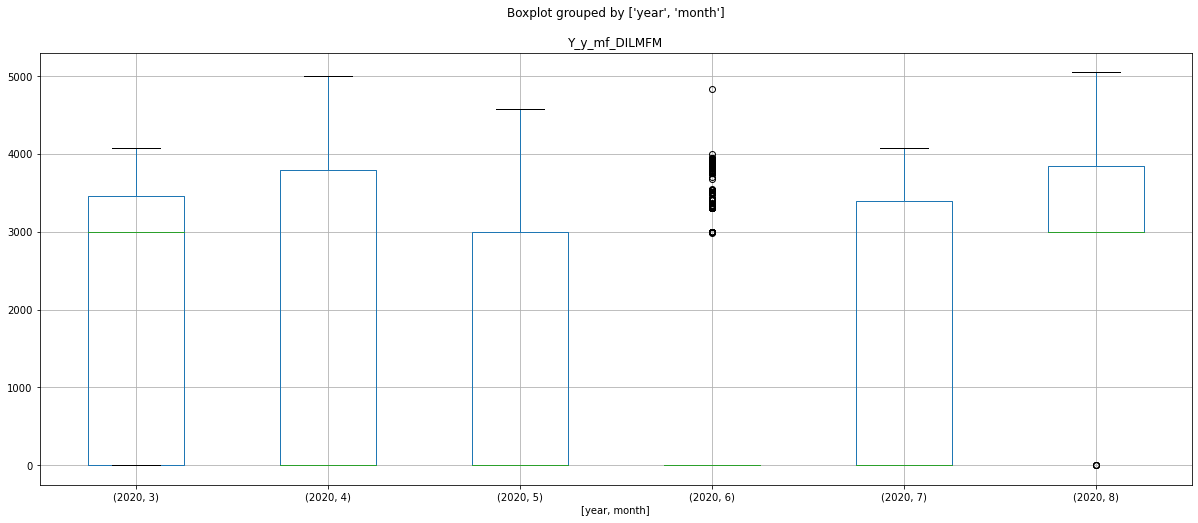

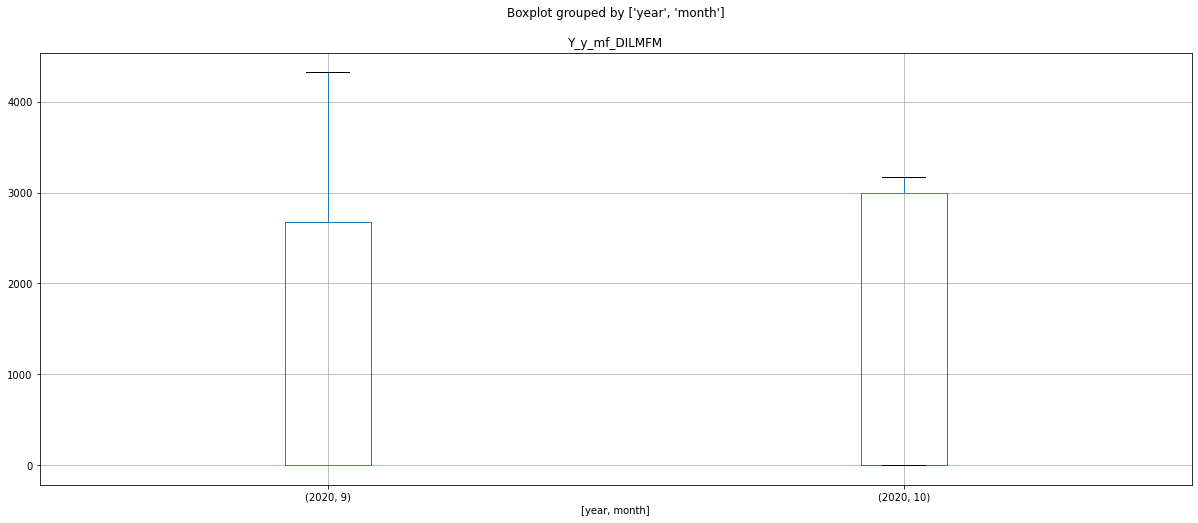

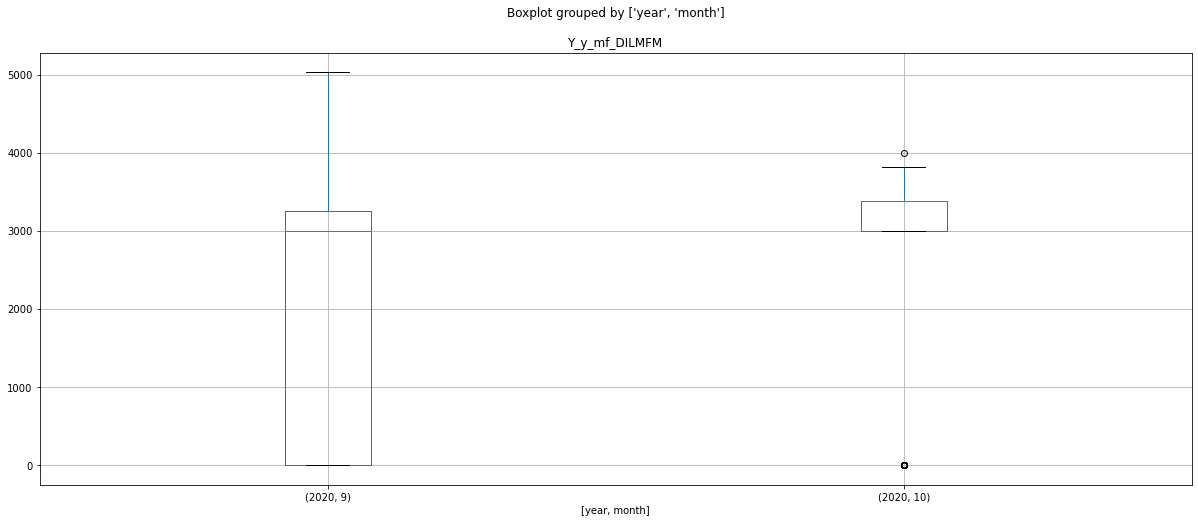

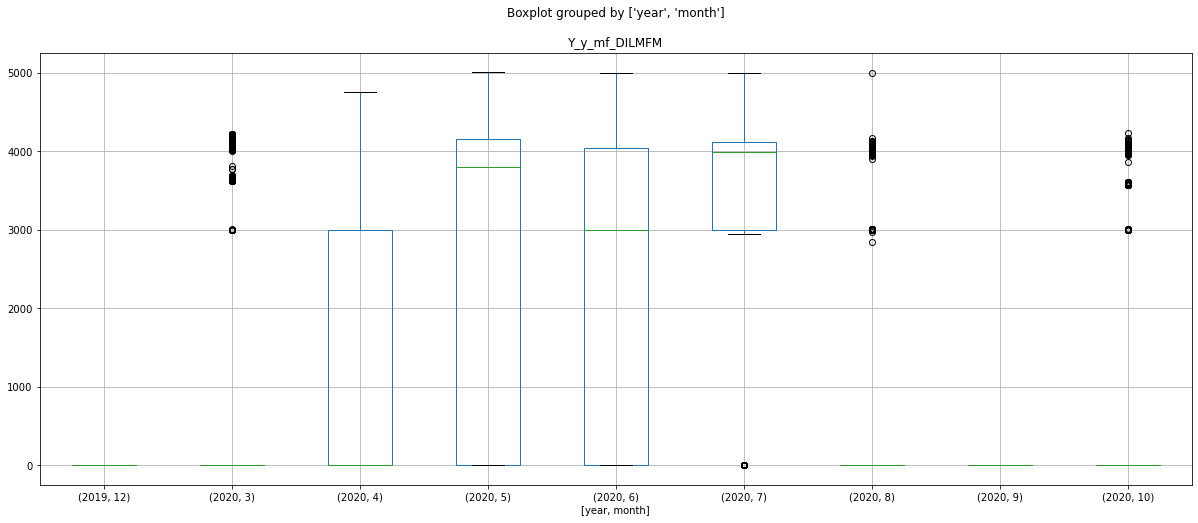

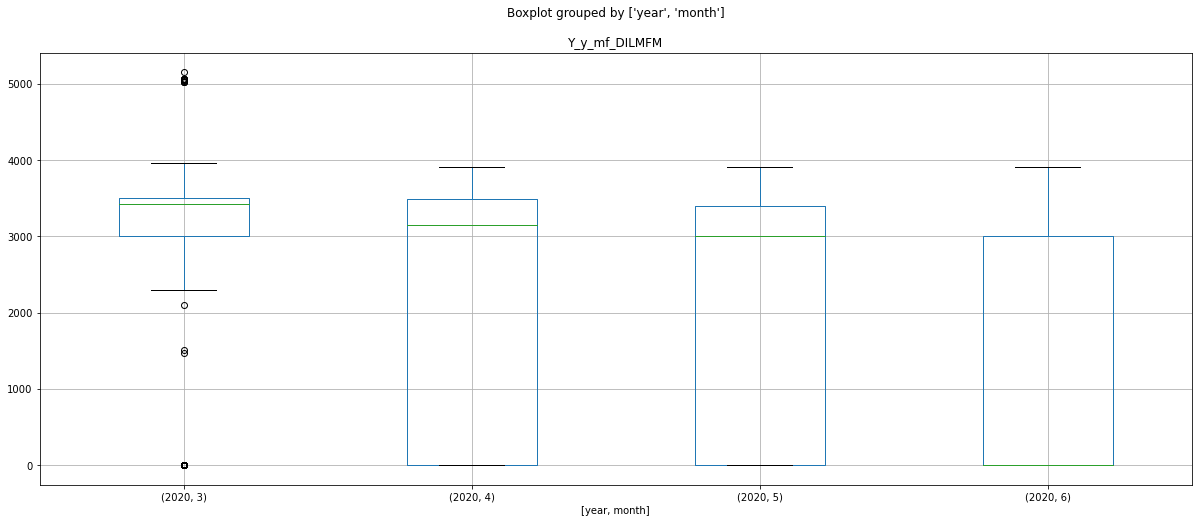

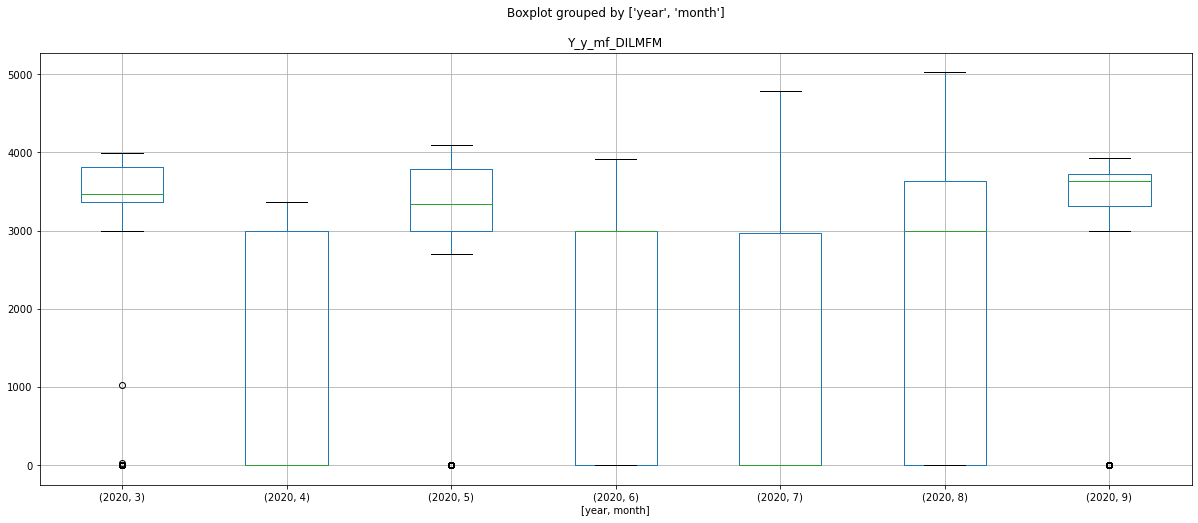

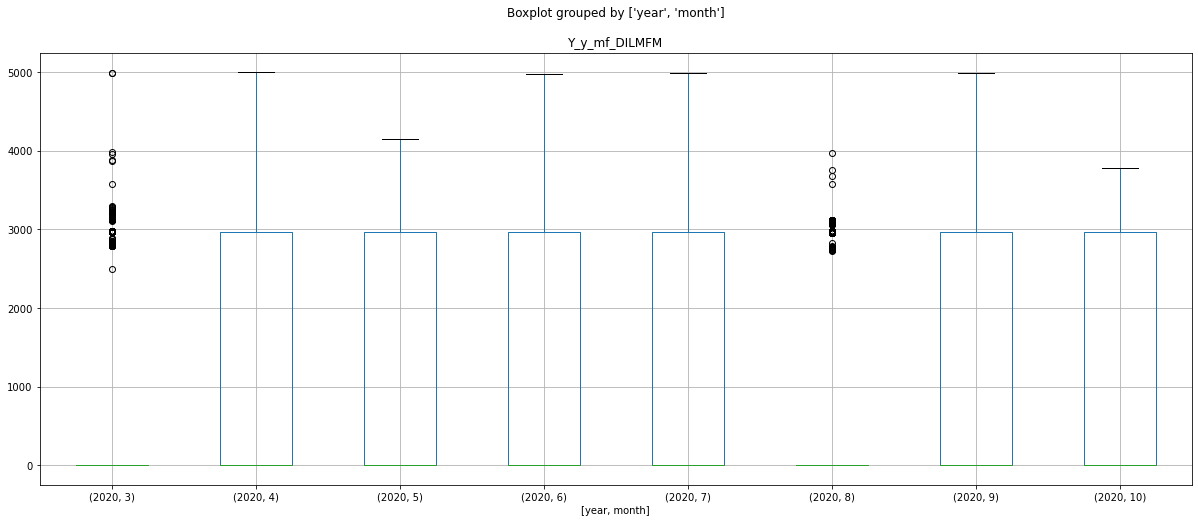

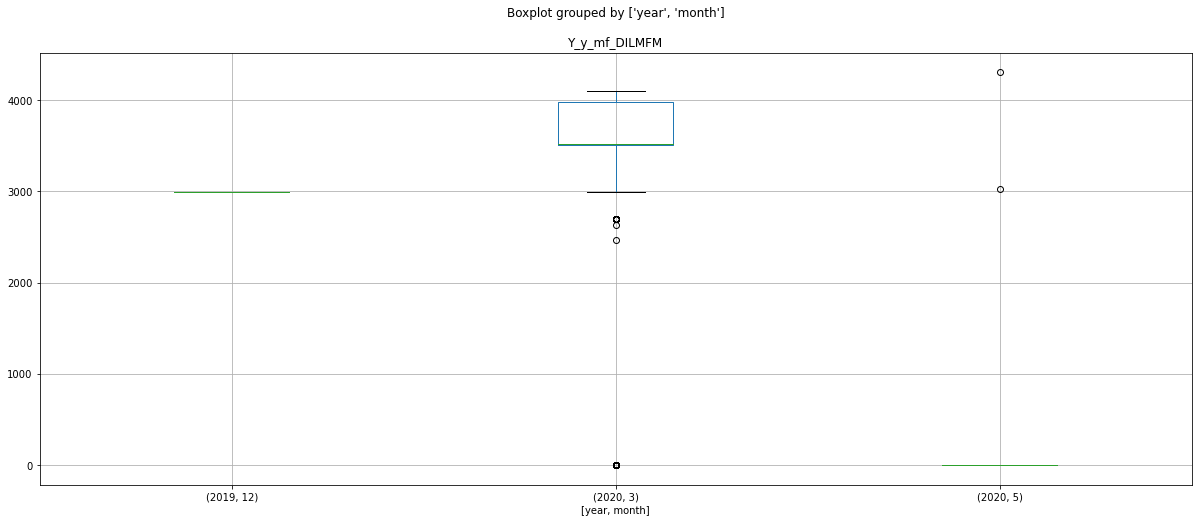

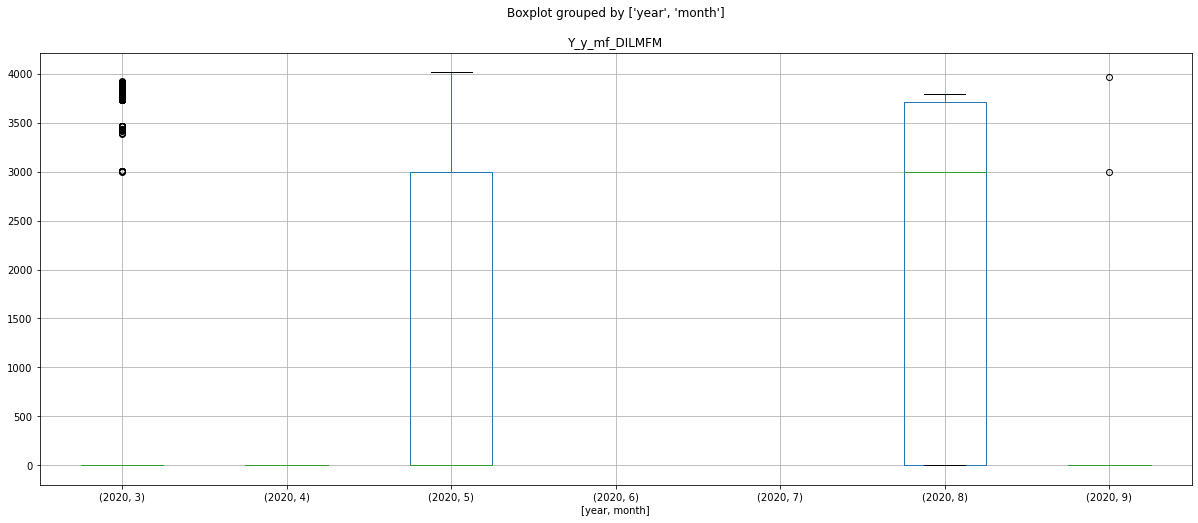

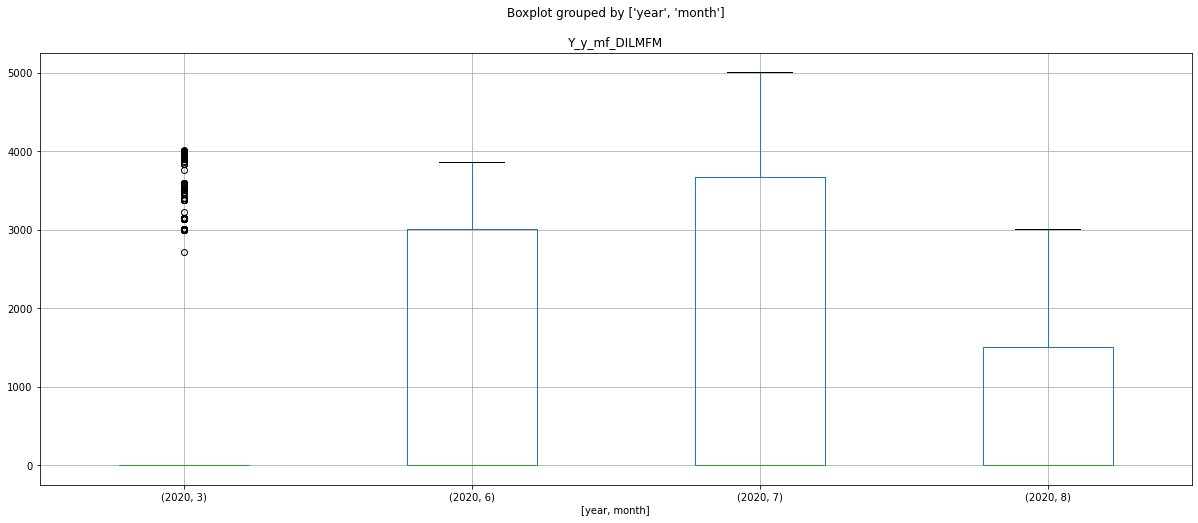

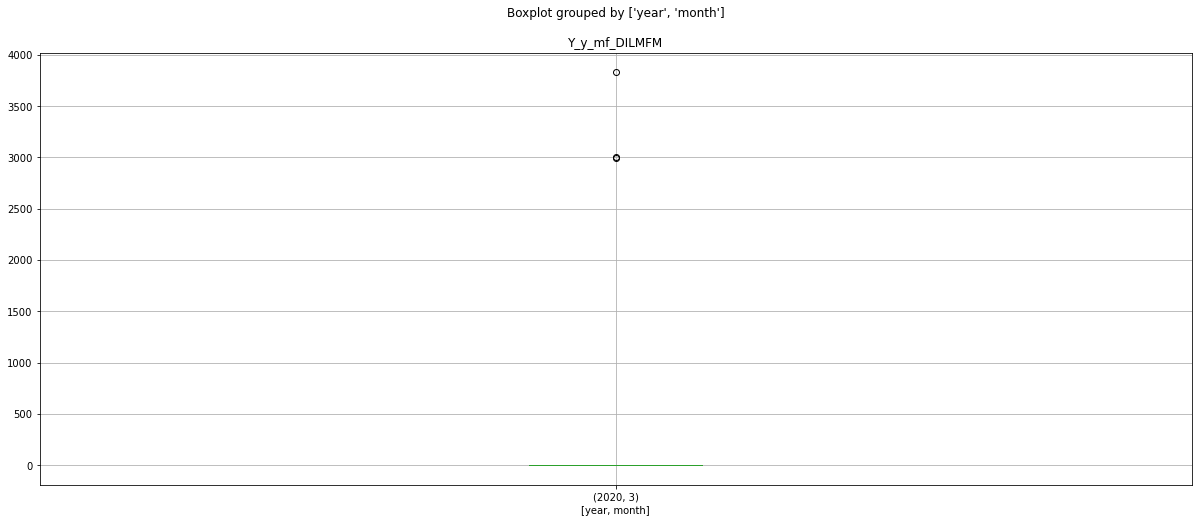

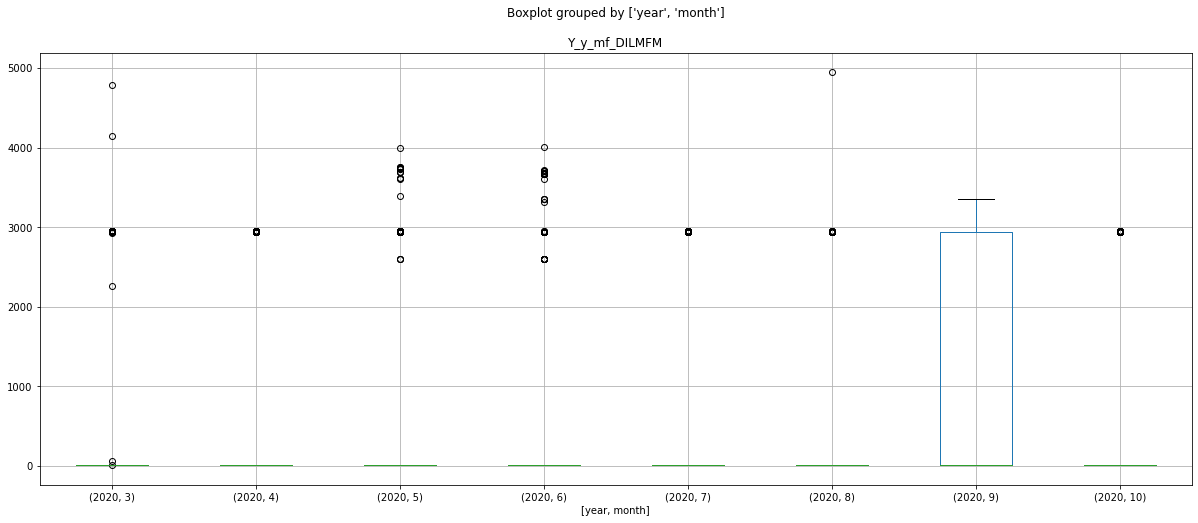

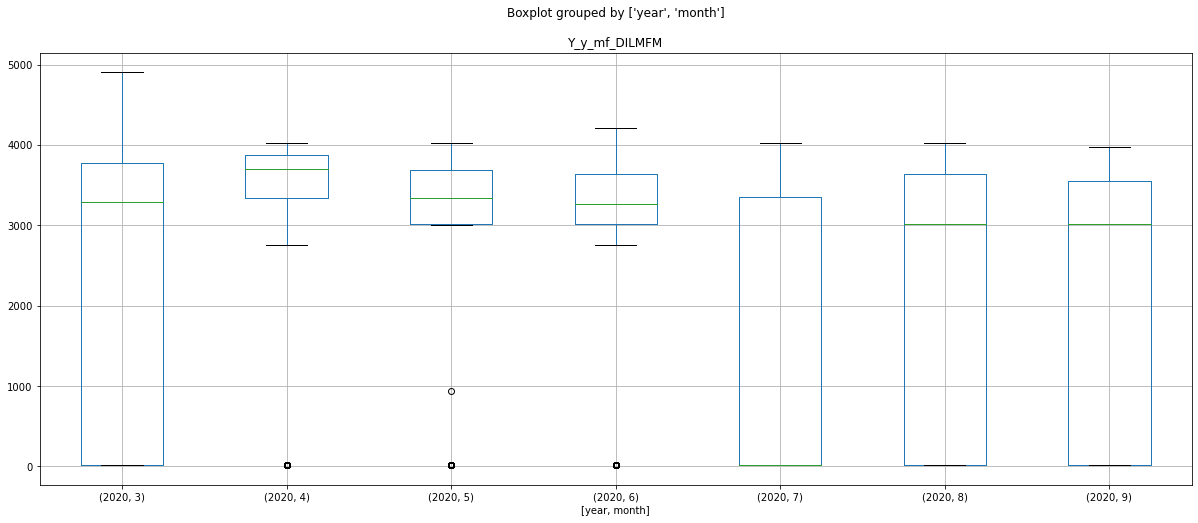

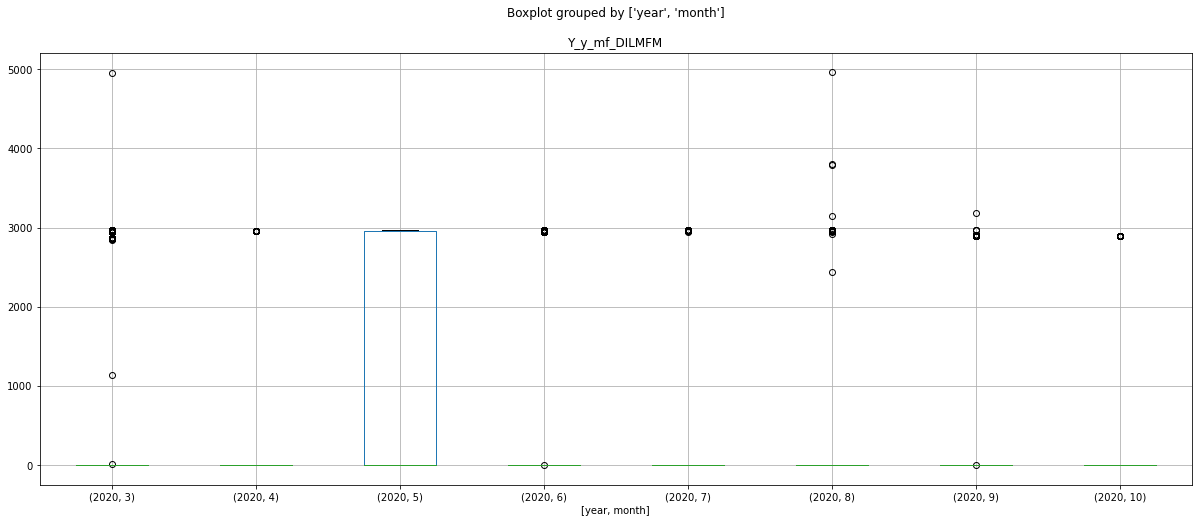

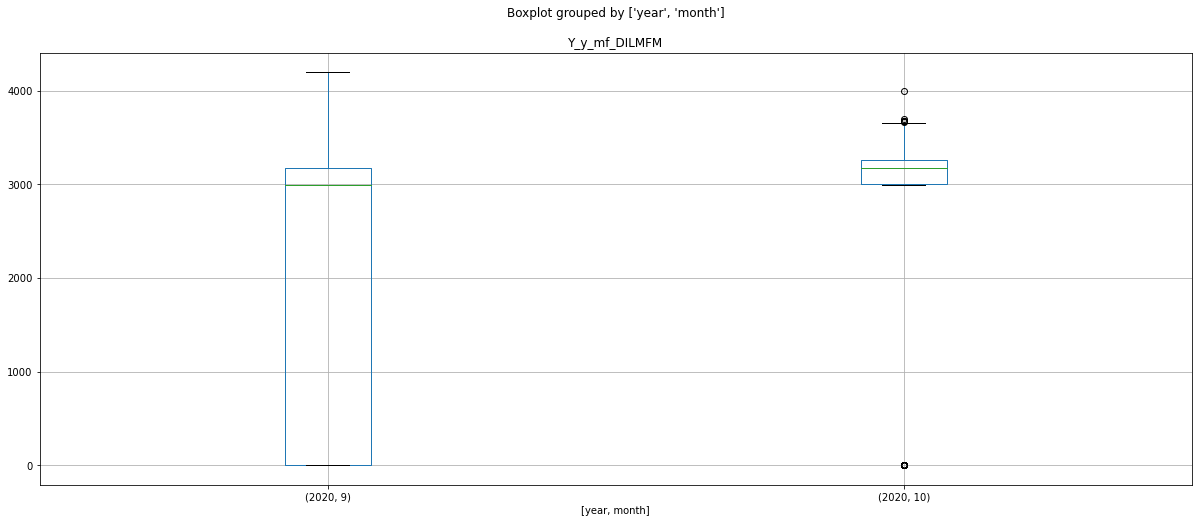

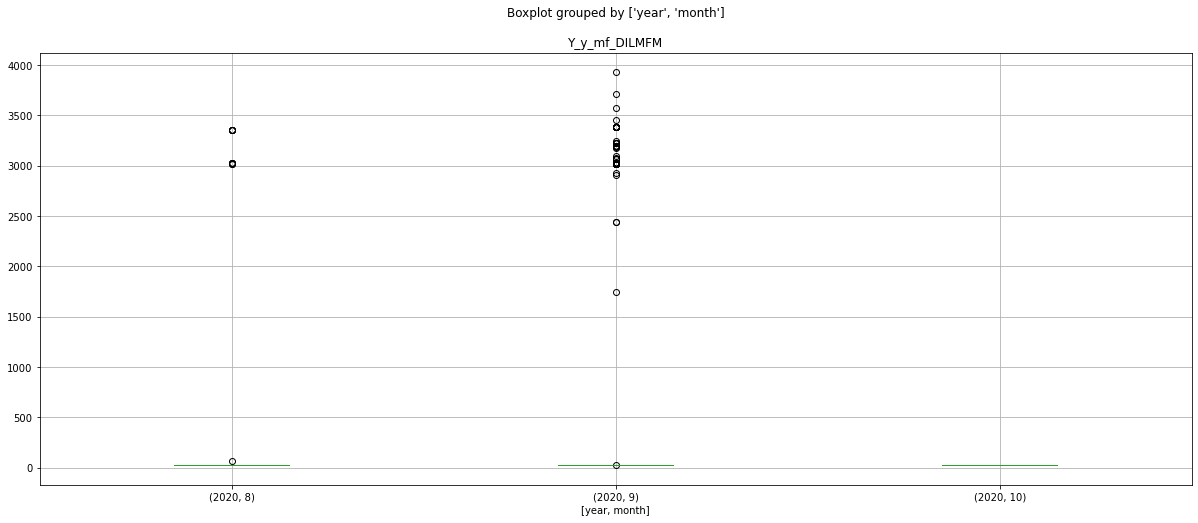

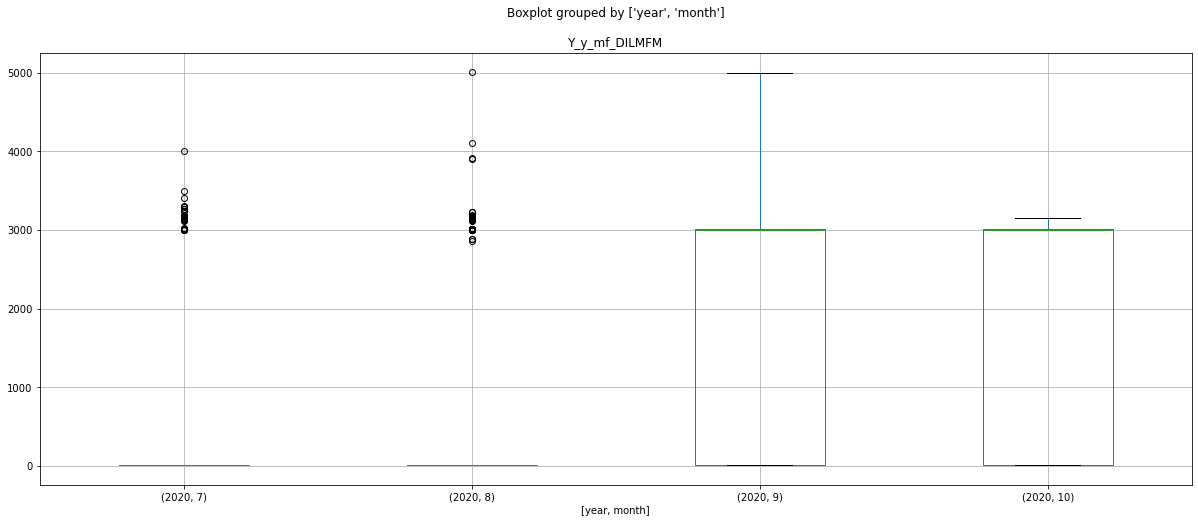

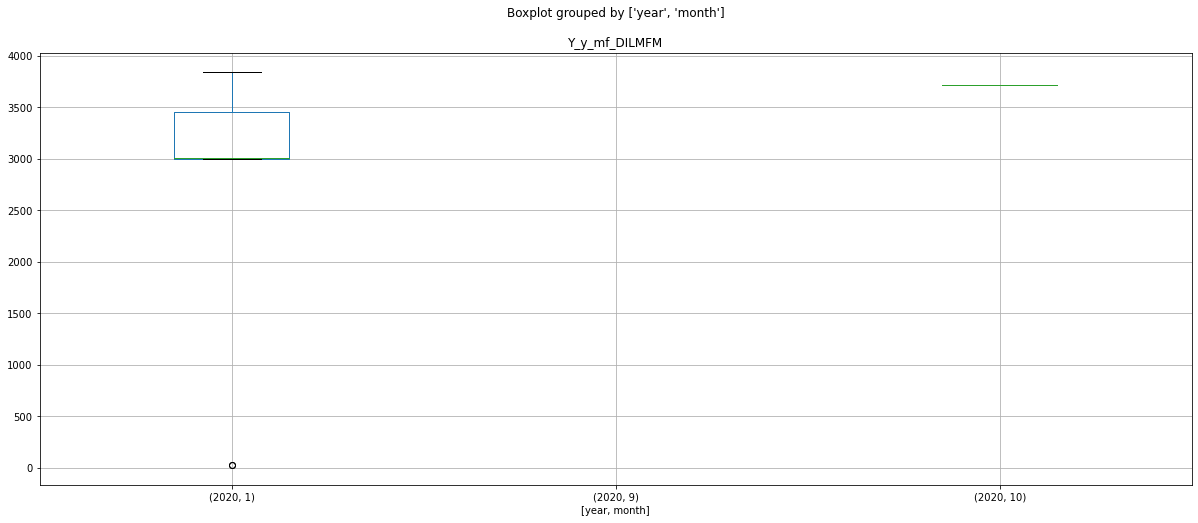

In [9]:
for i in list(data['equipmentNumber'].unique()):
    data[data['equipmentNumber']==i].boxplot(column=['Y_y_mf_DILMFM'], by=['year', 'month'], figsize = (20,8))

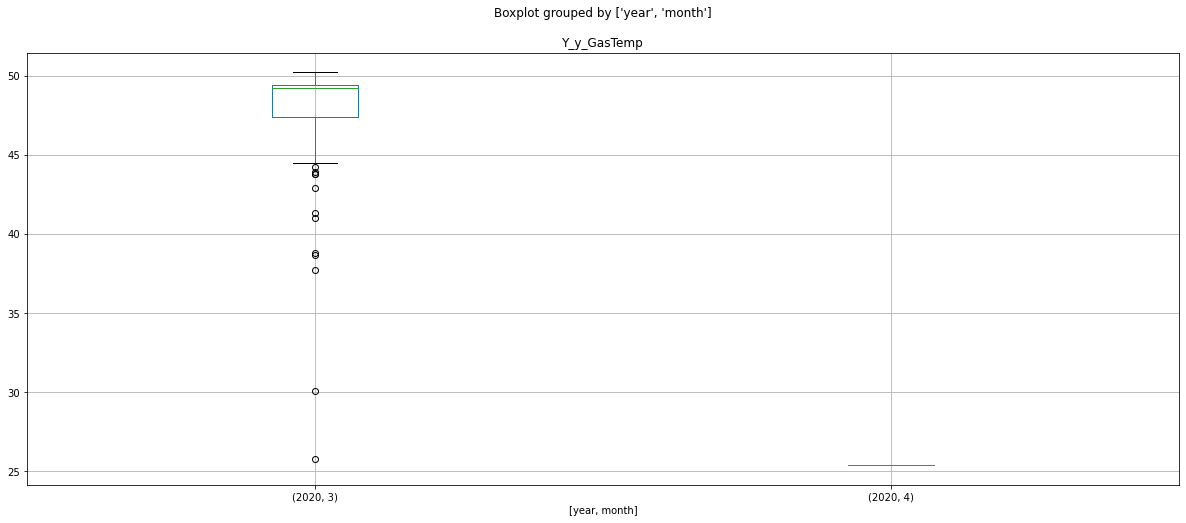

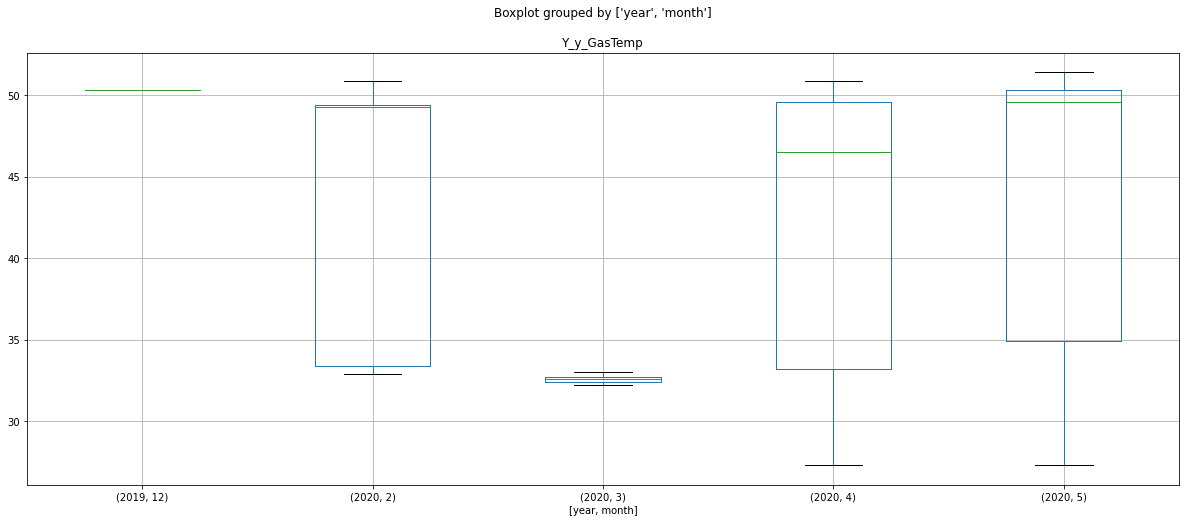

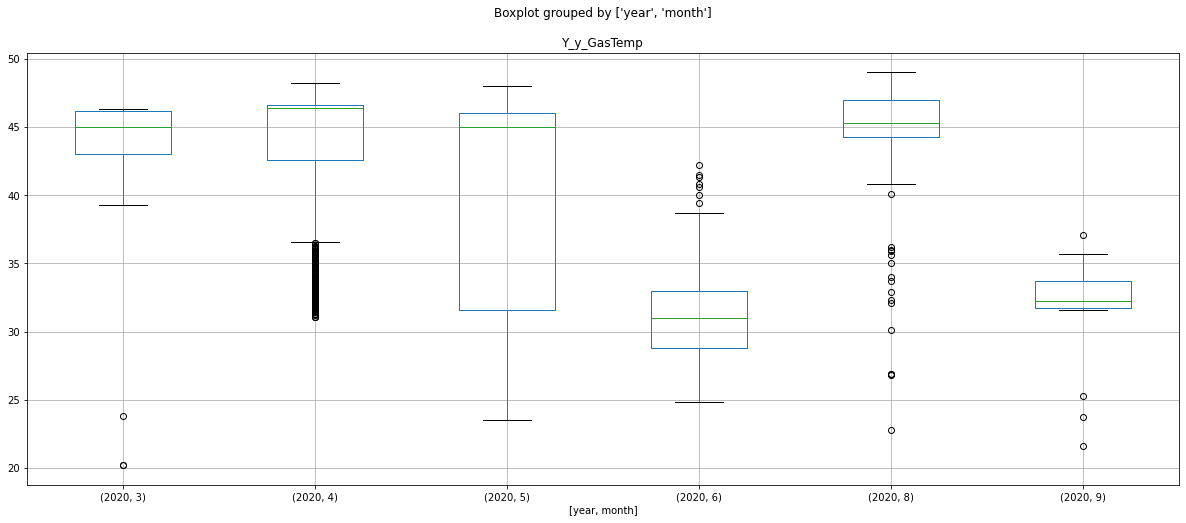

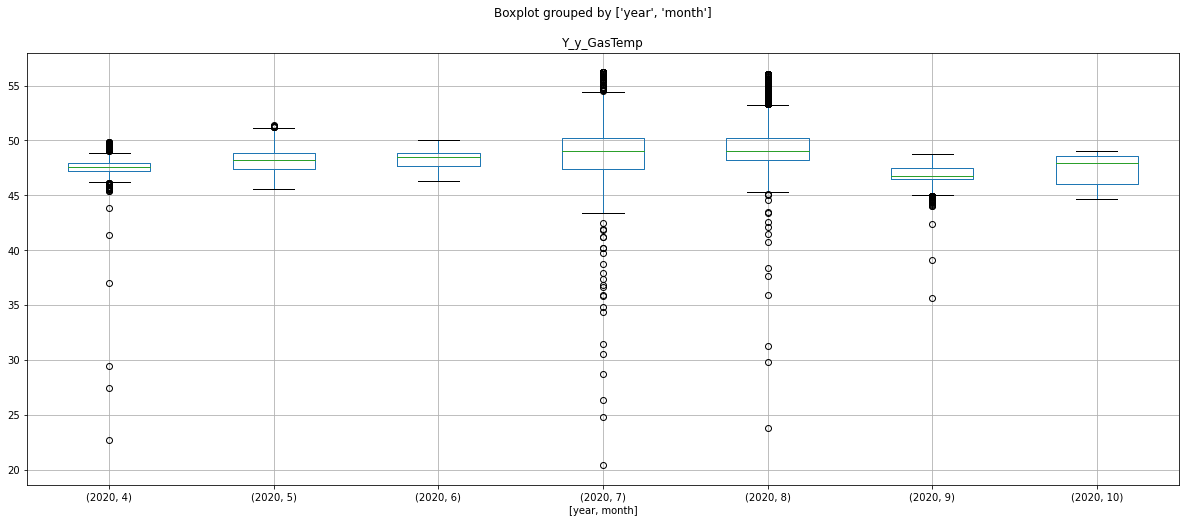

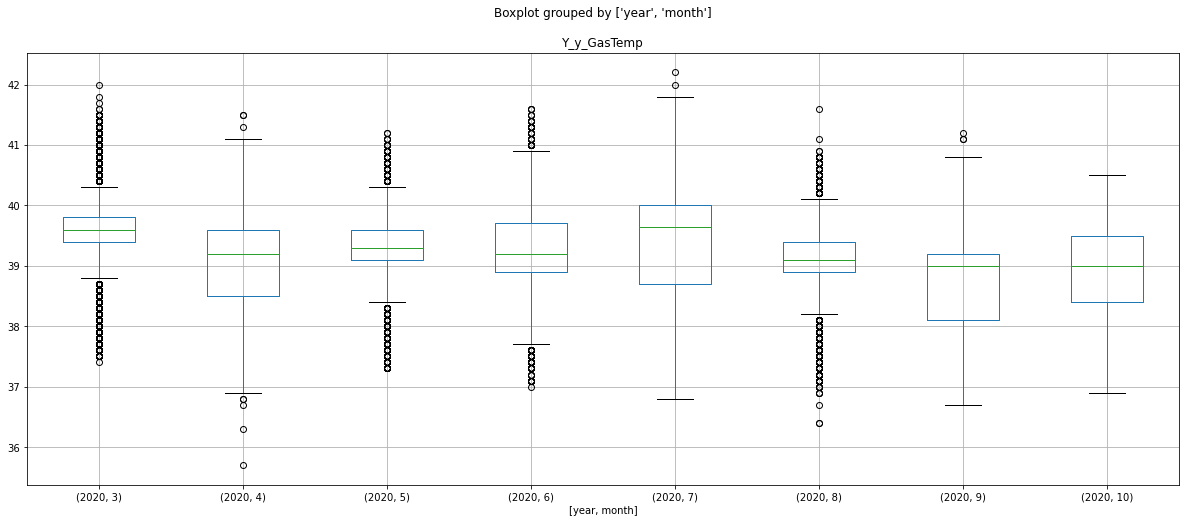

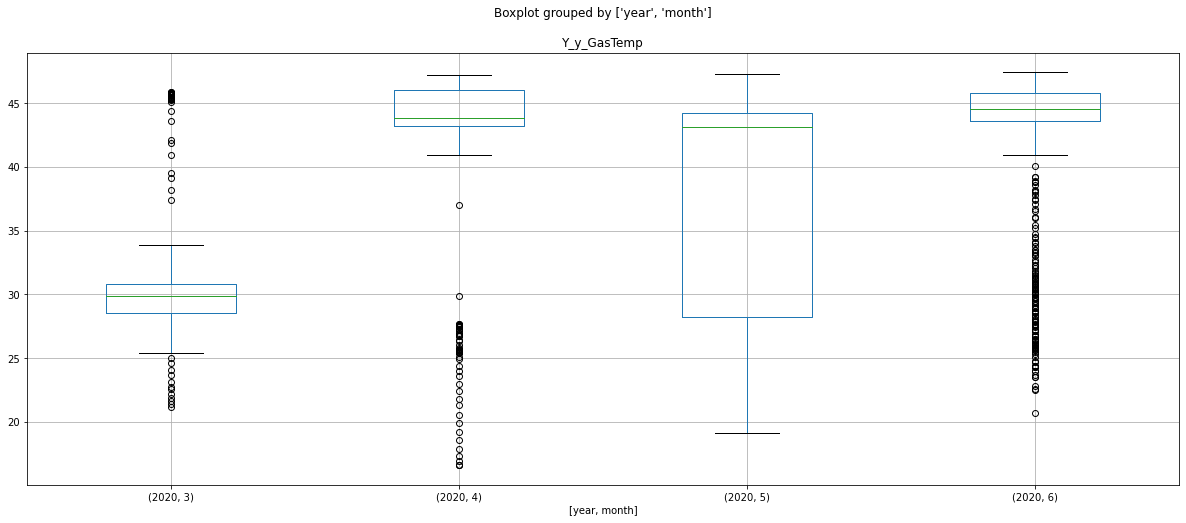

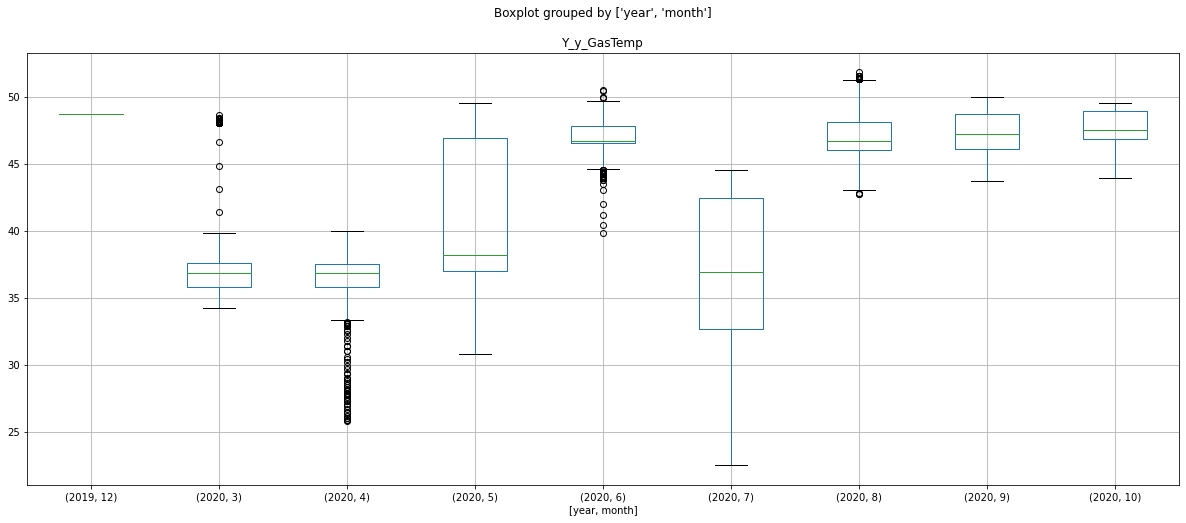

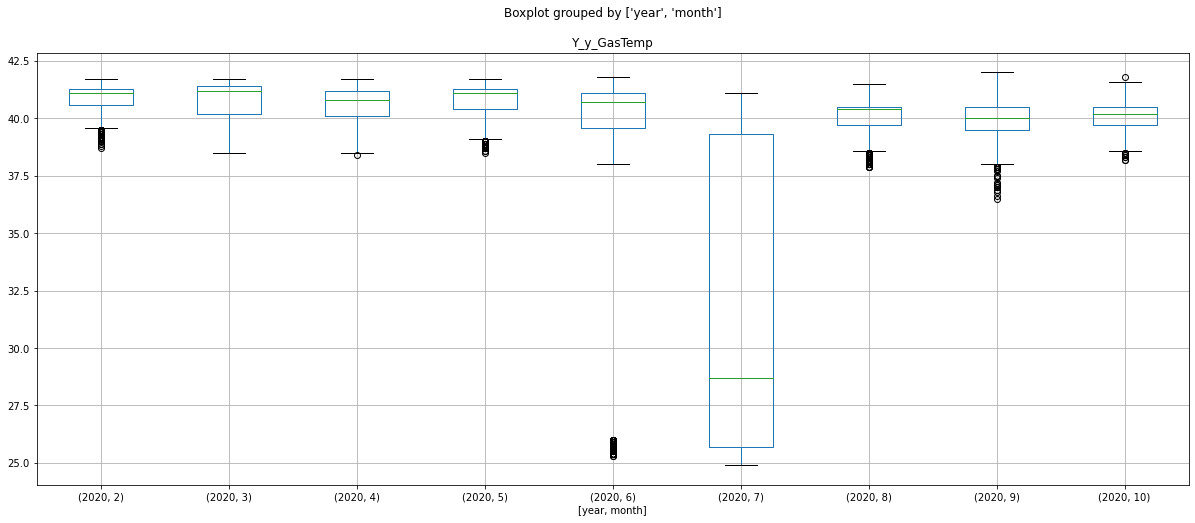

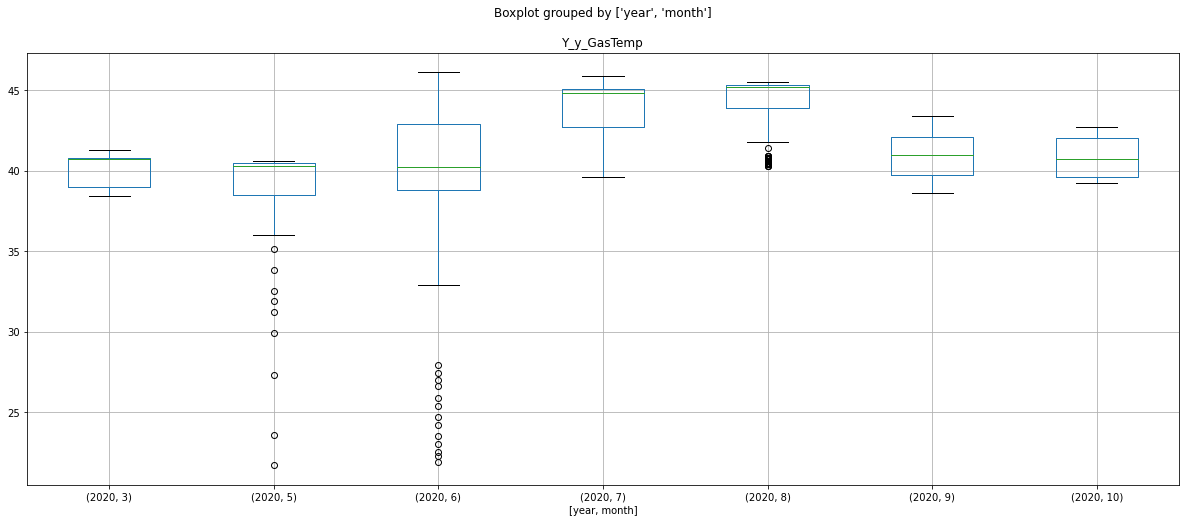

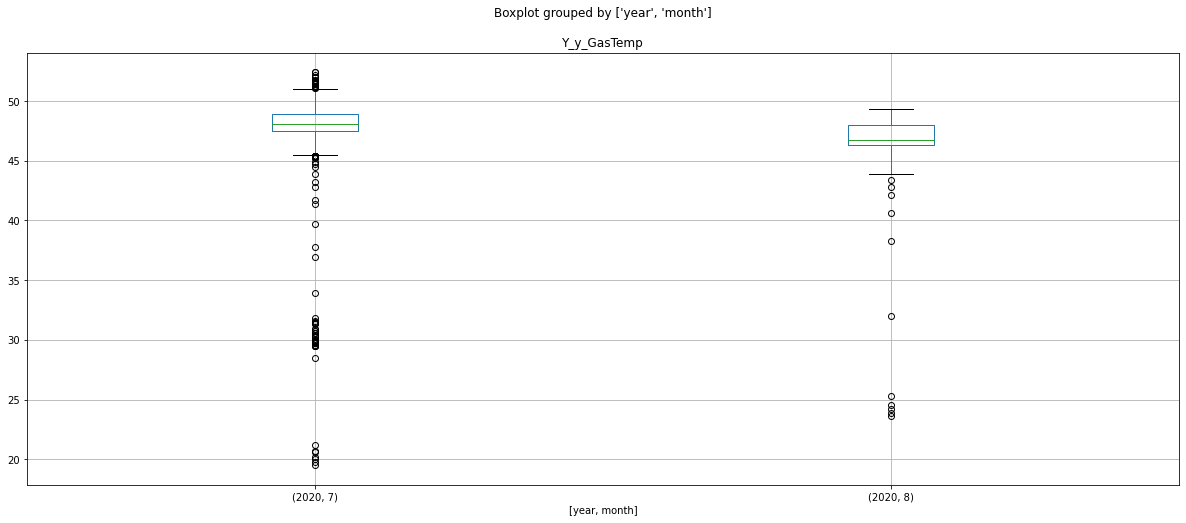

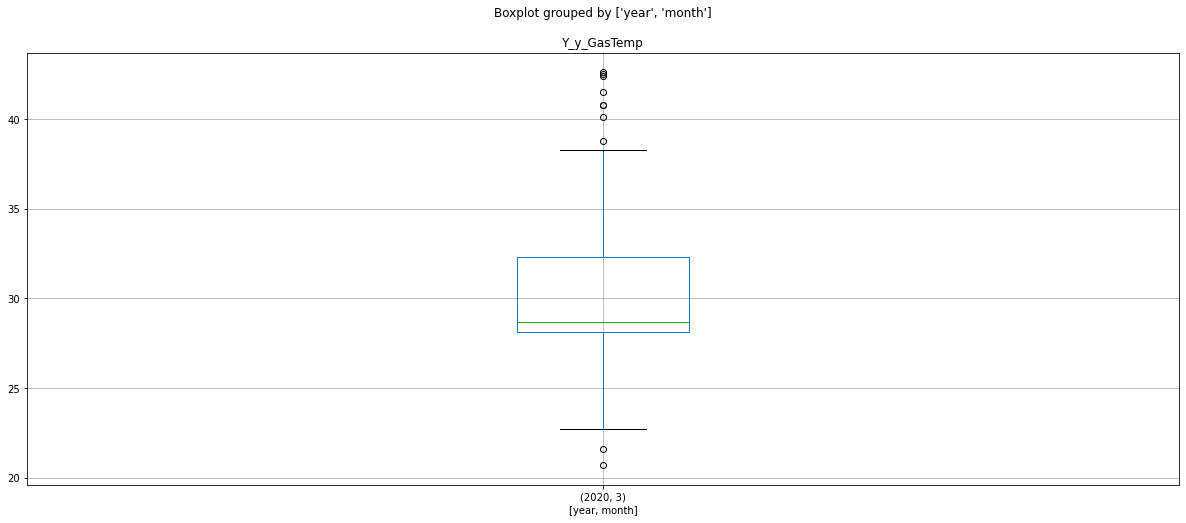

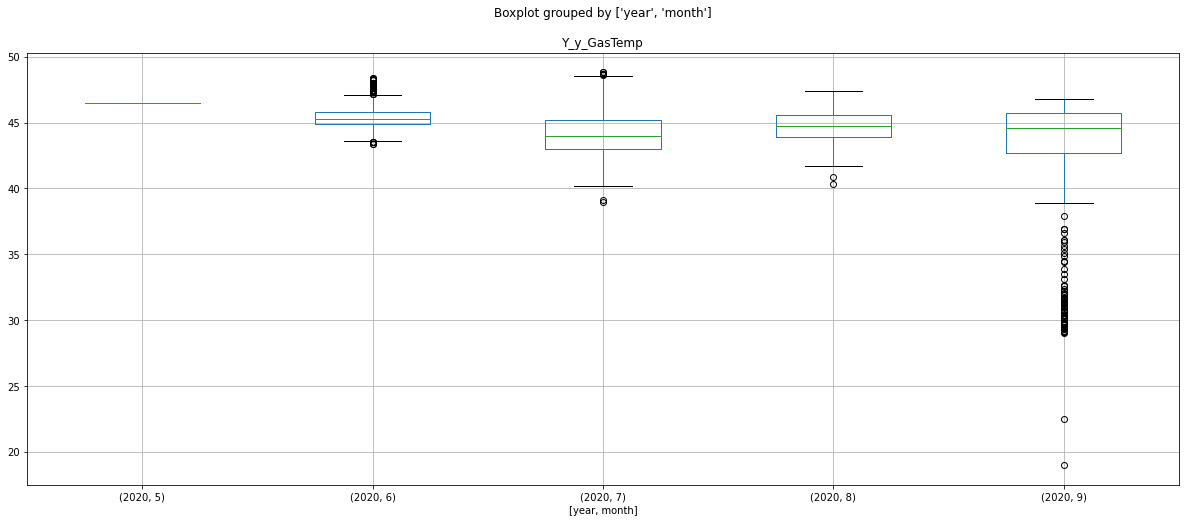

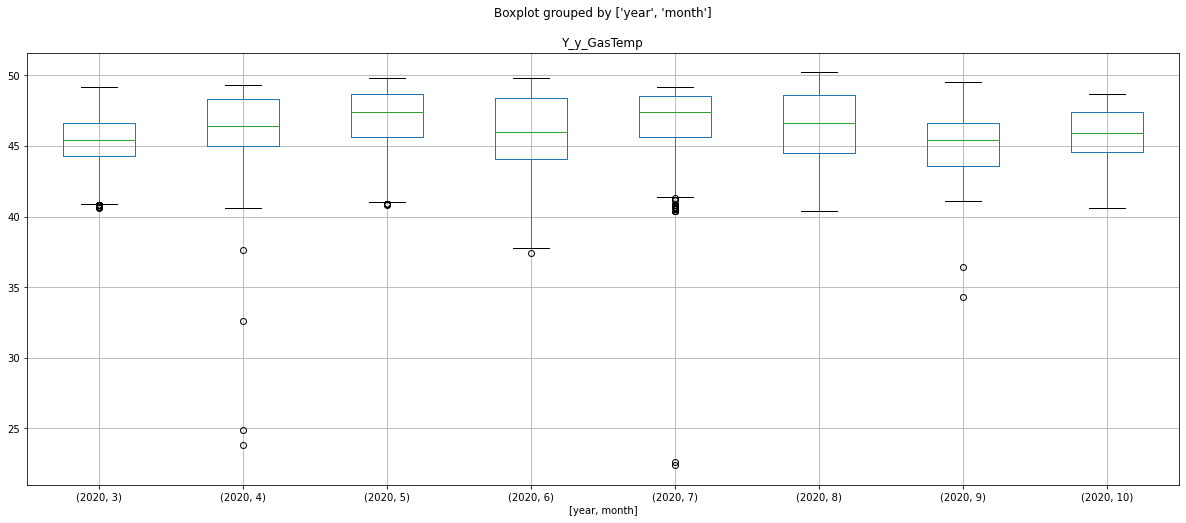

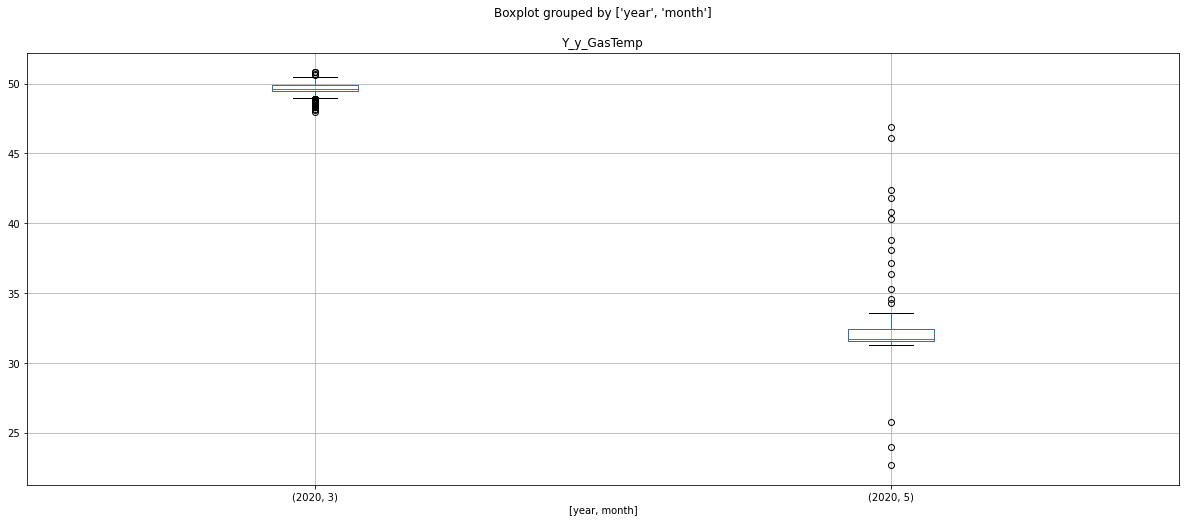

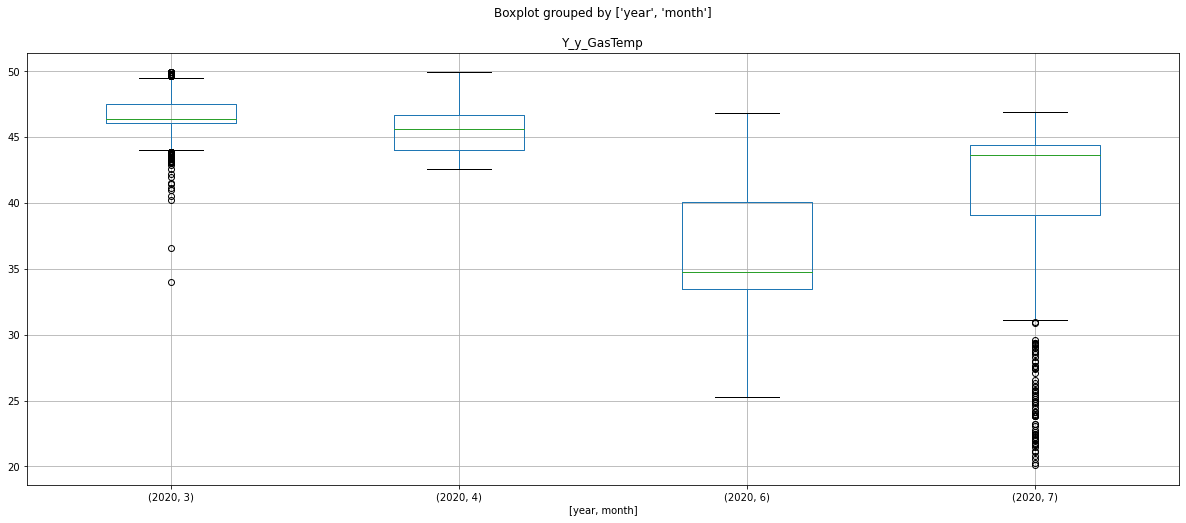

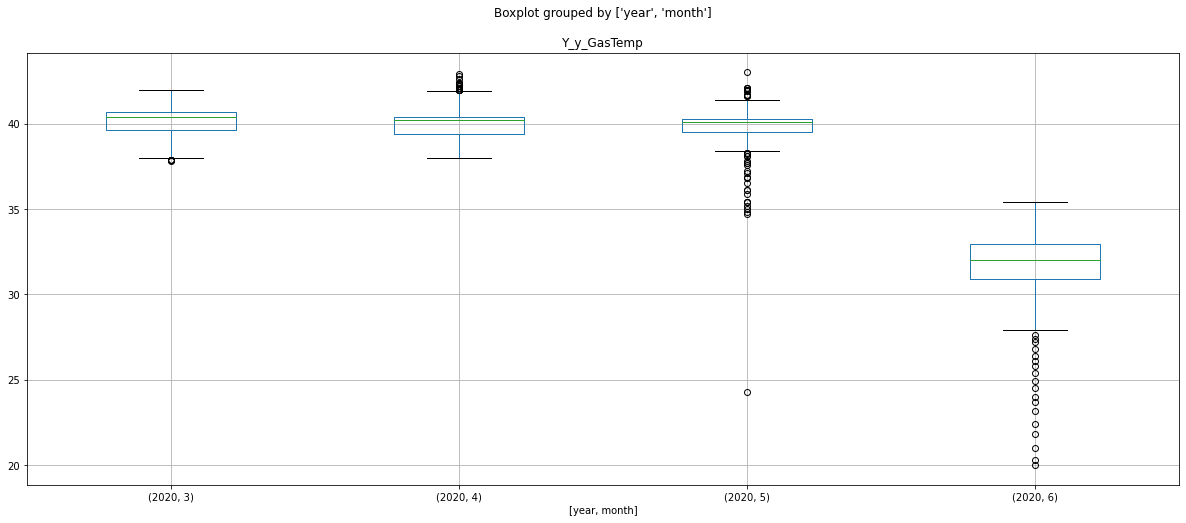

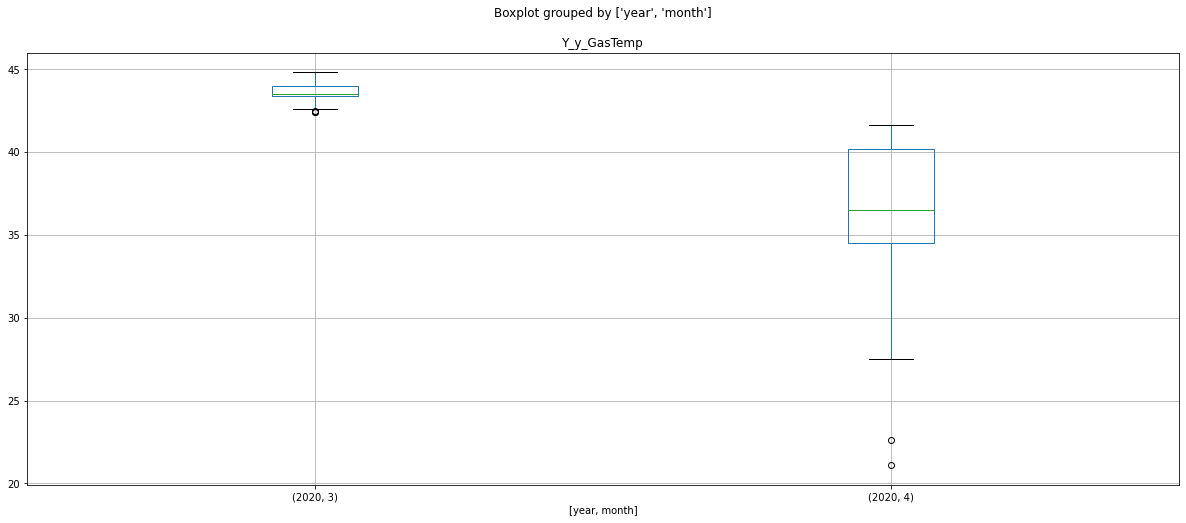

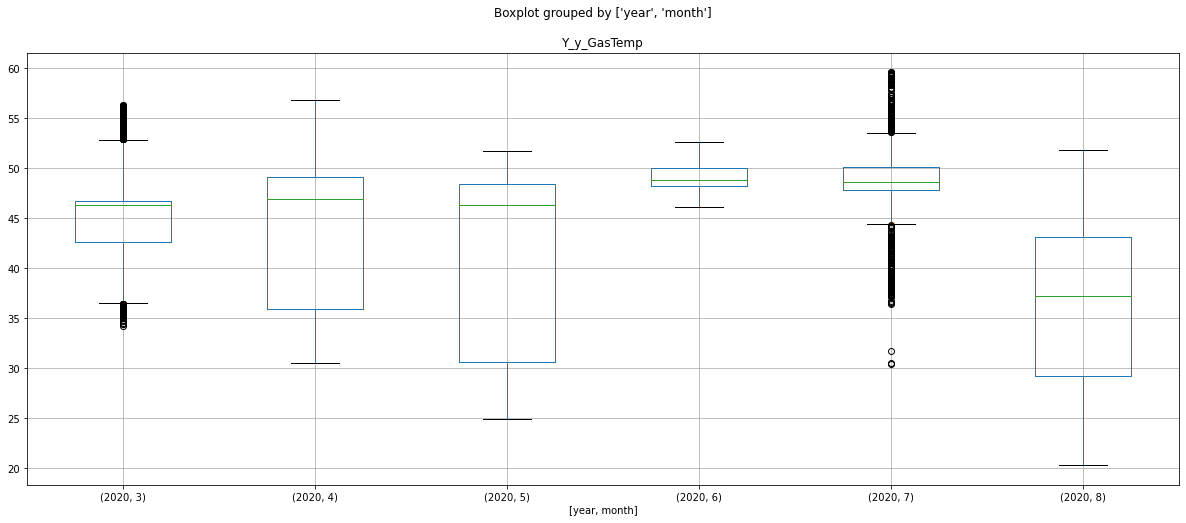

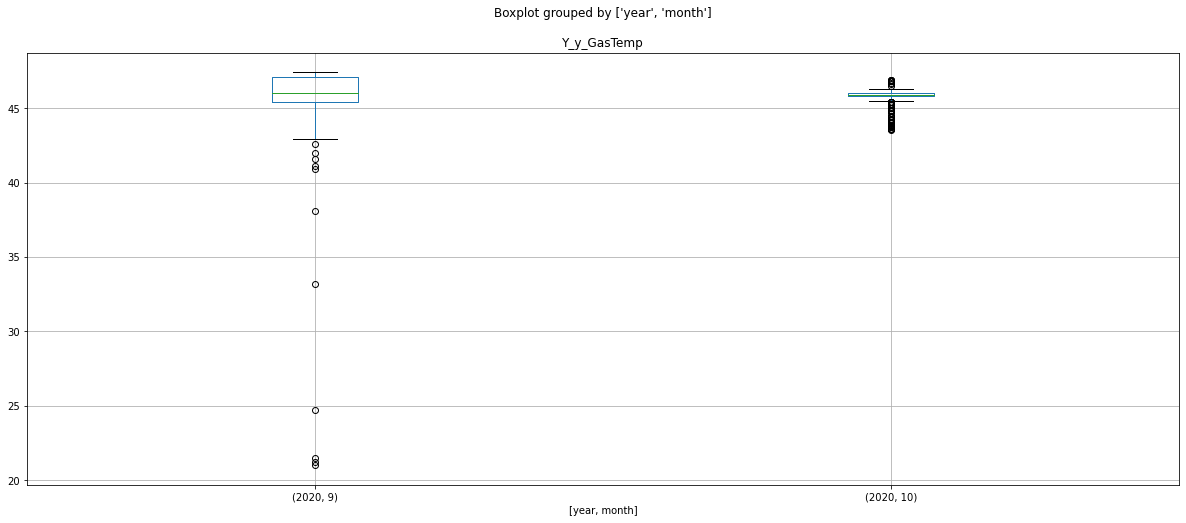

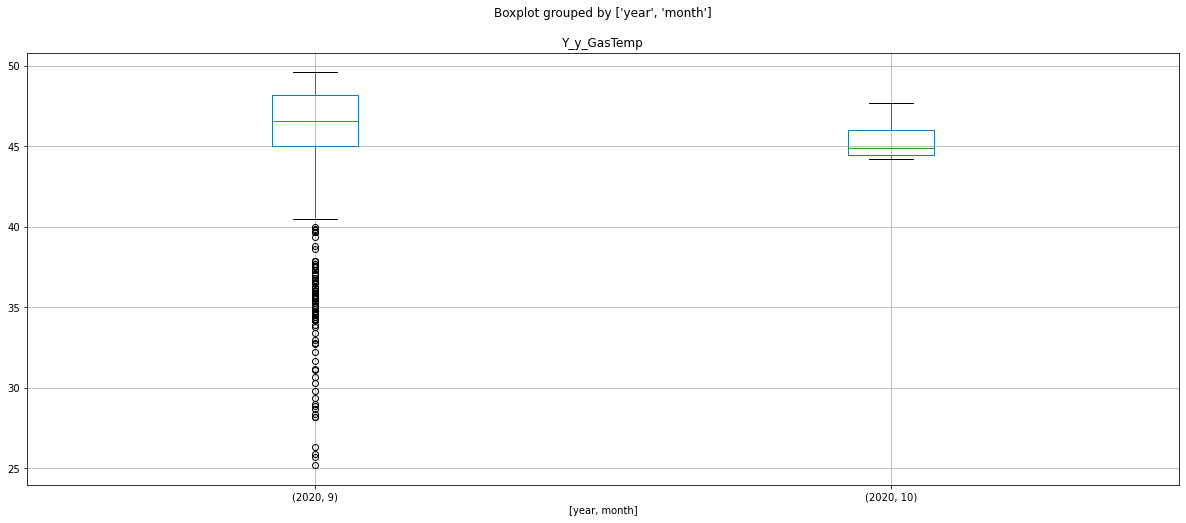

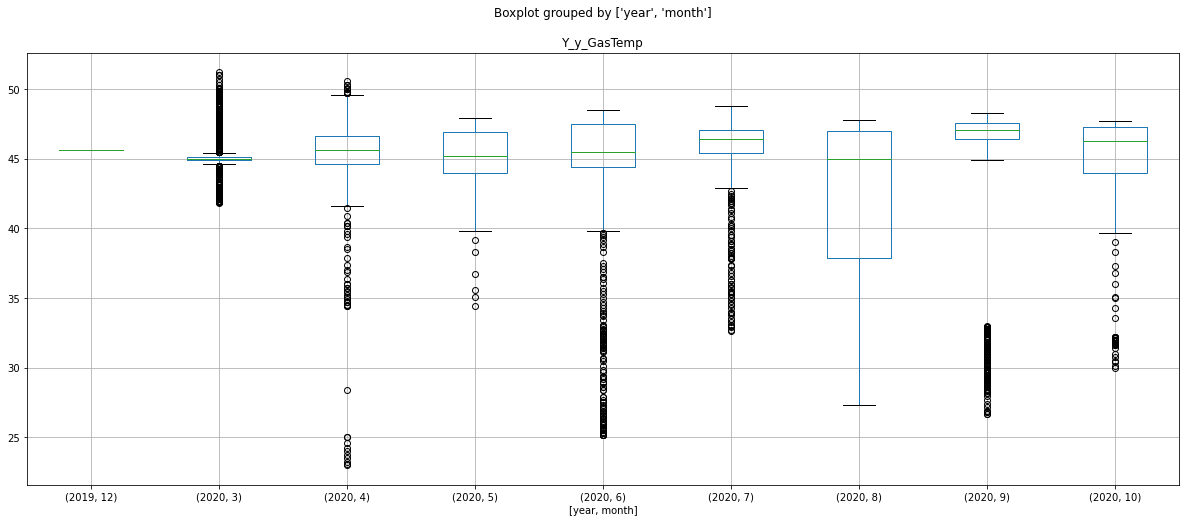

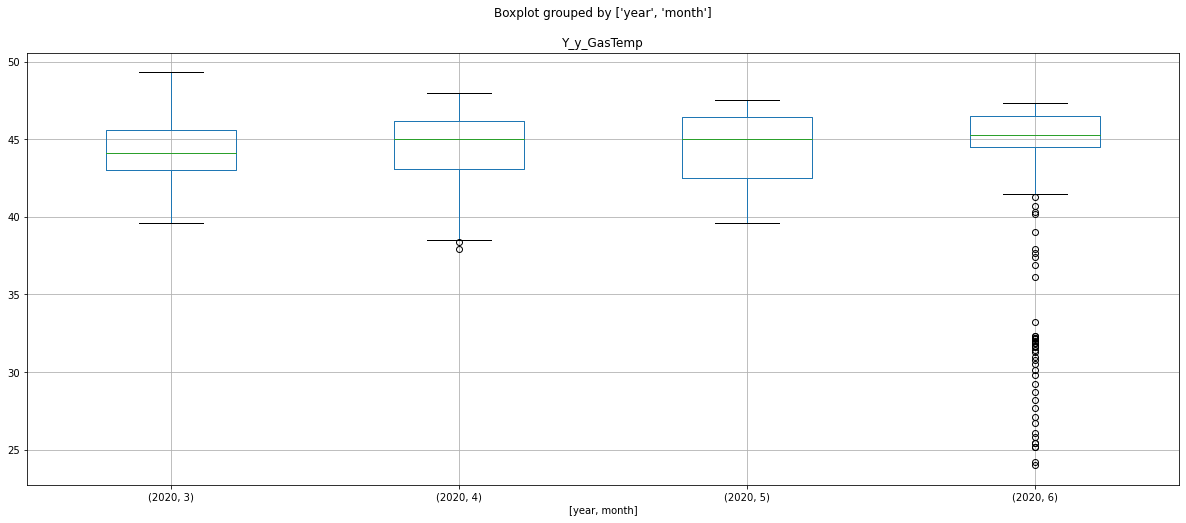

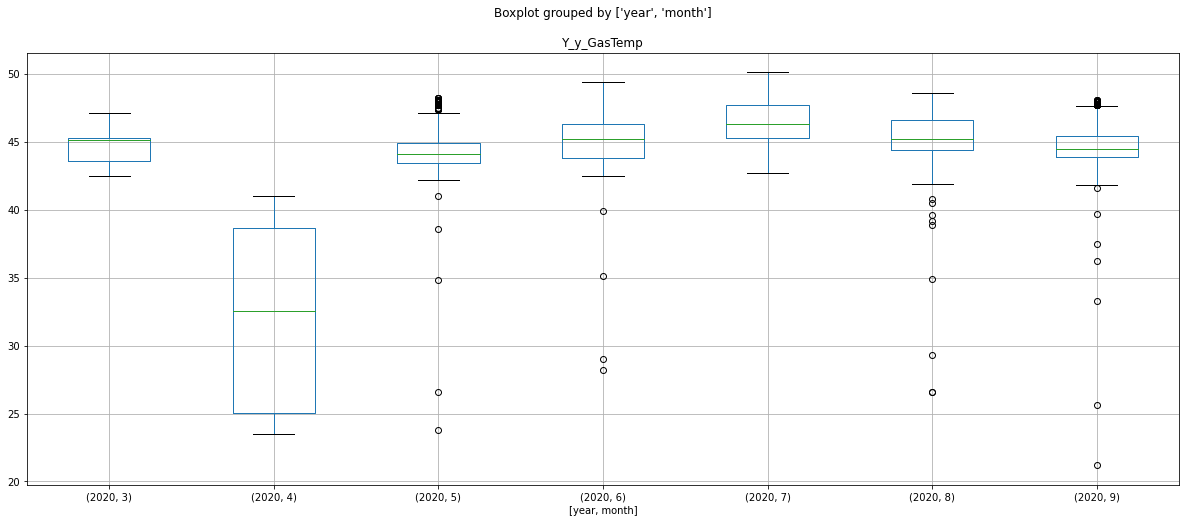

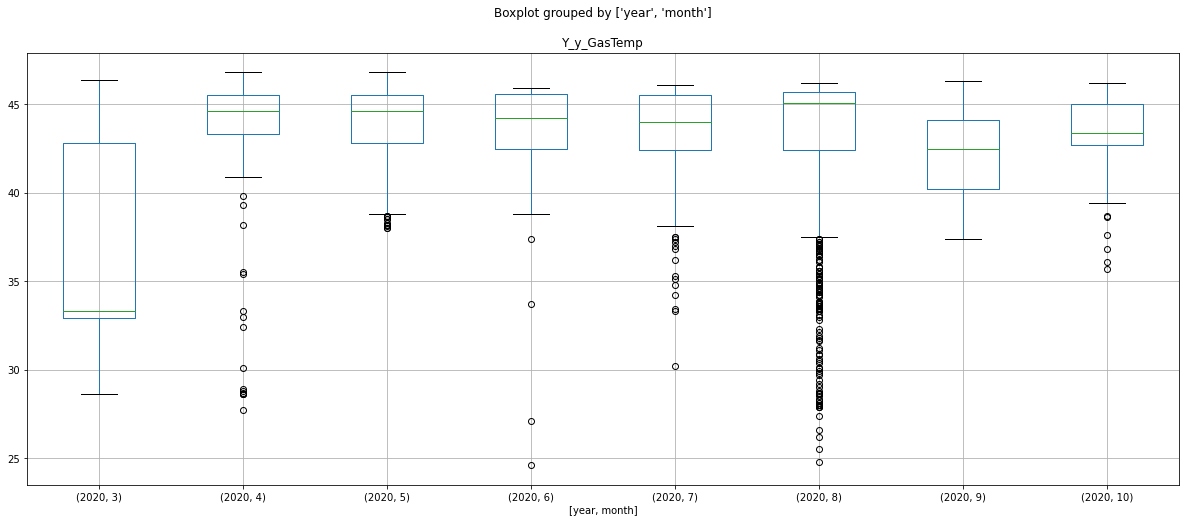

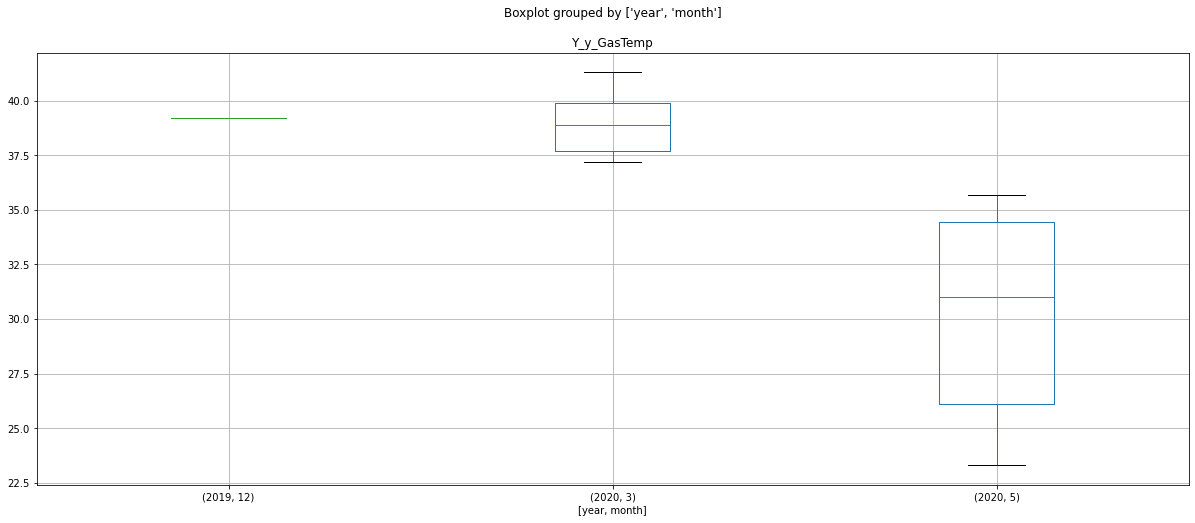

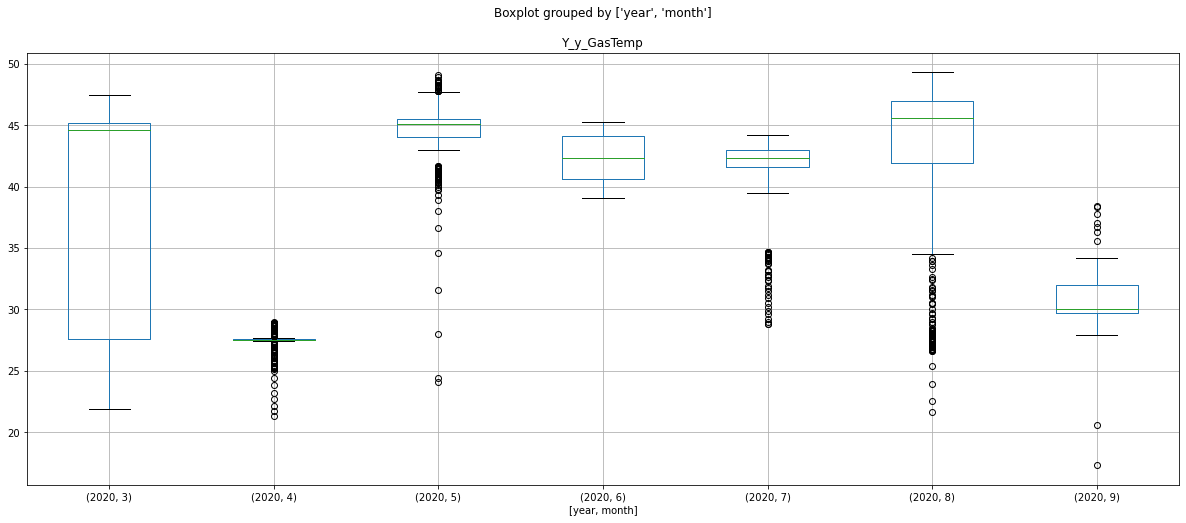

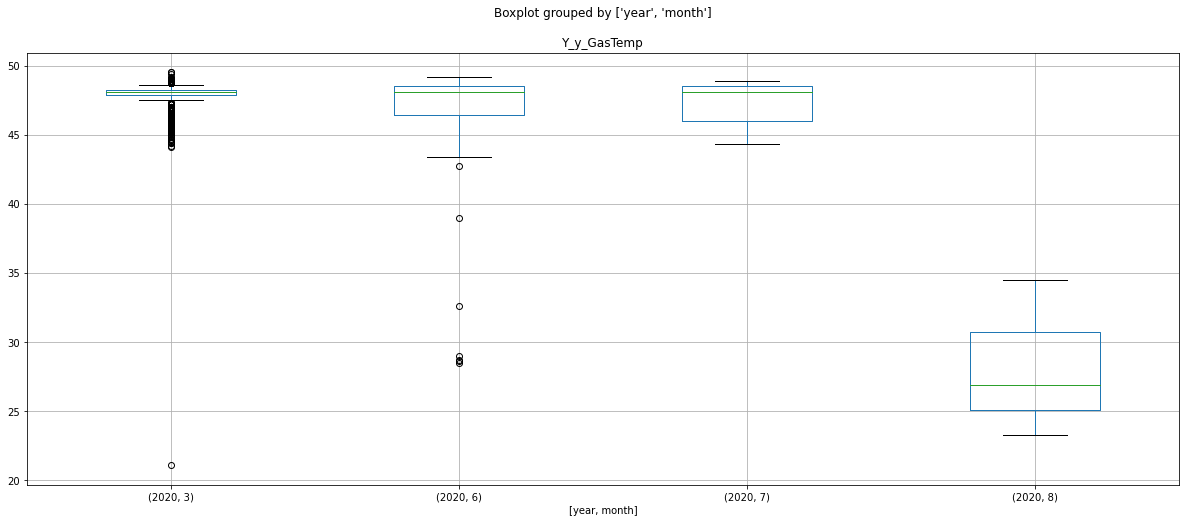

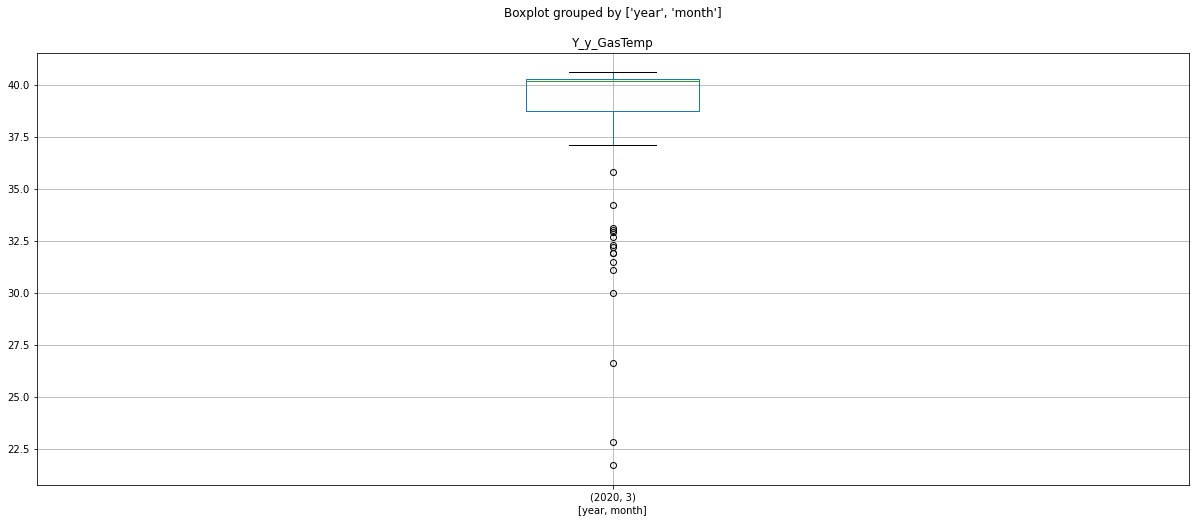

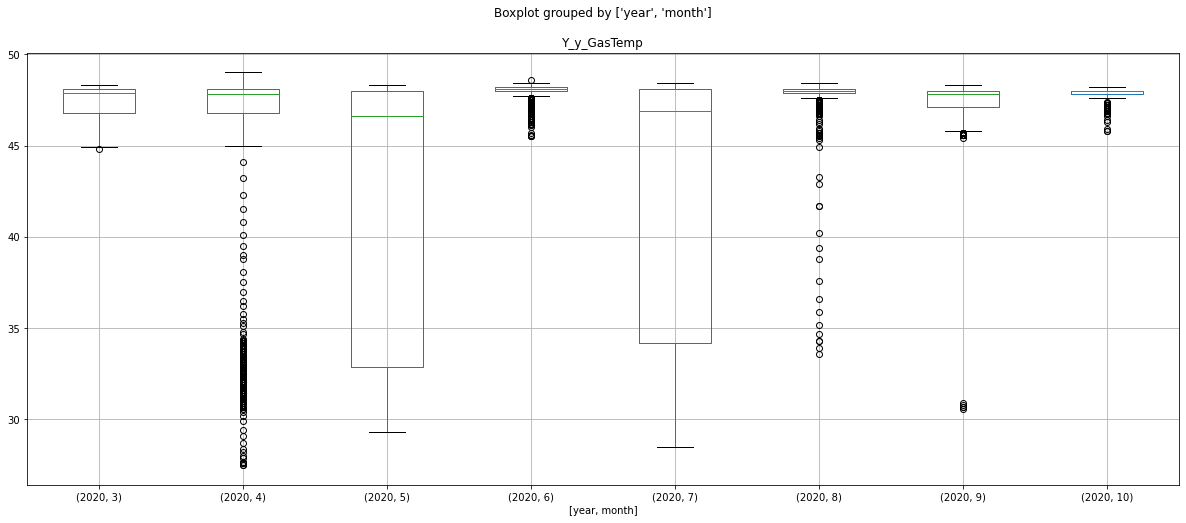

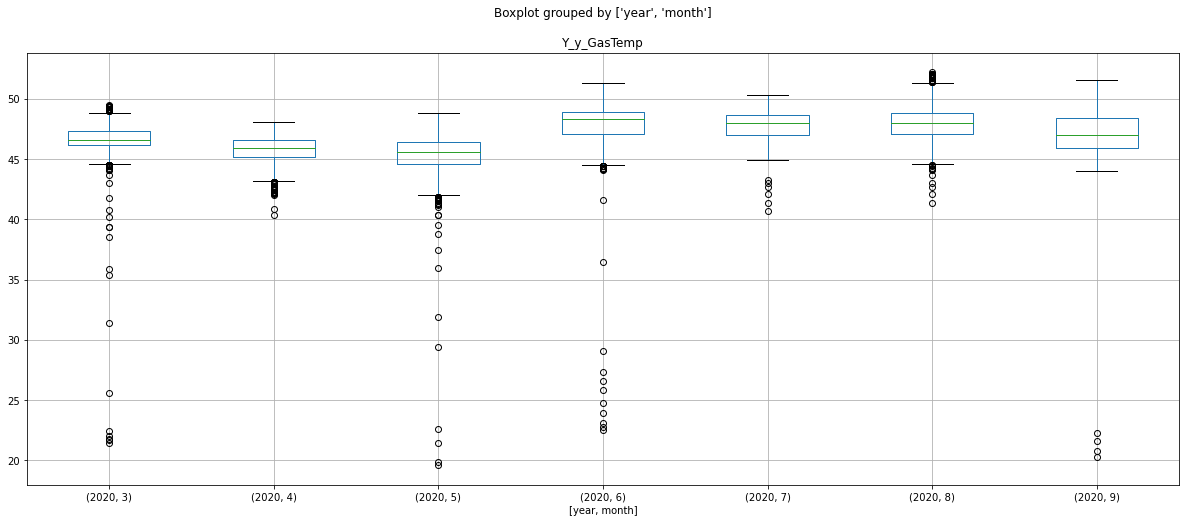

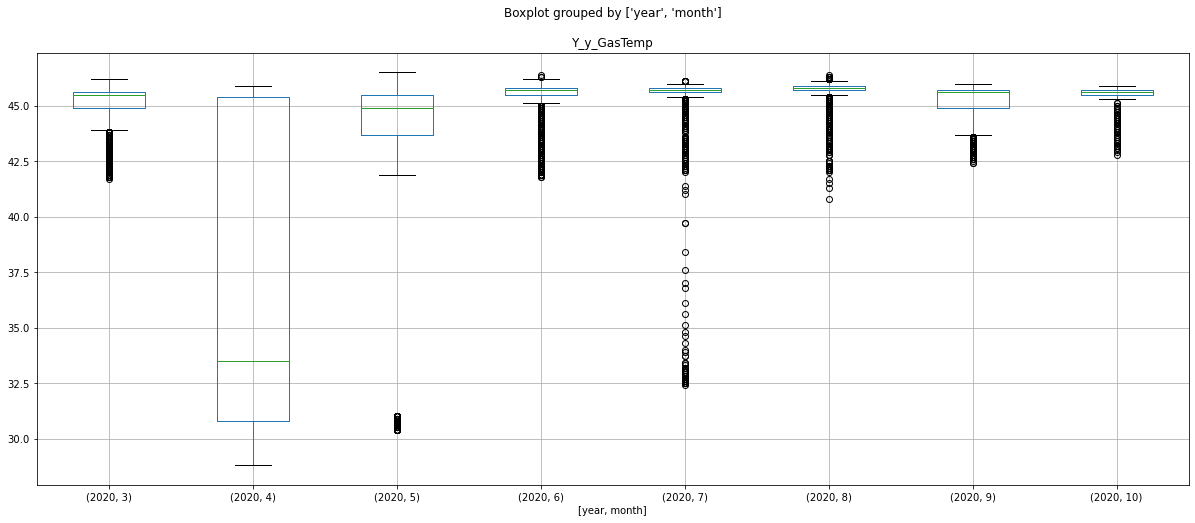

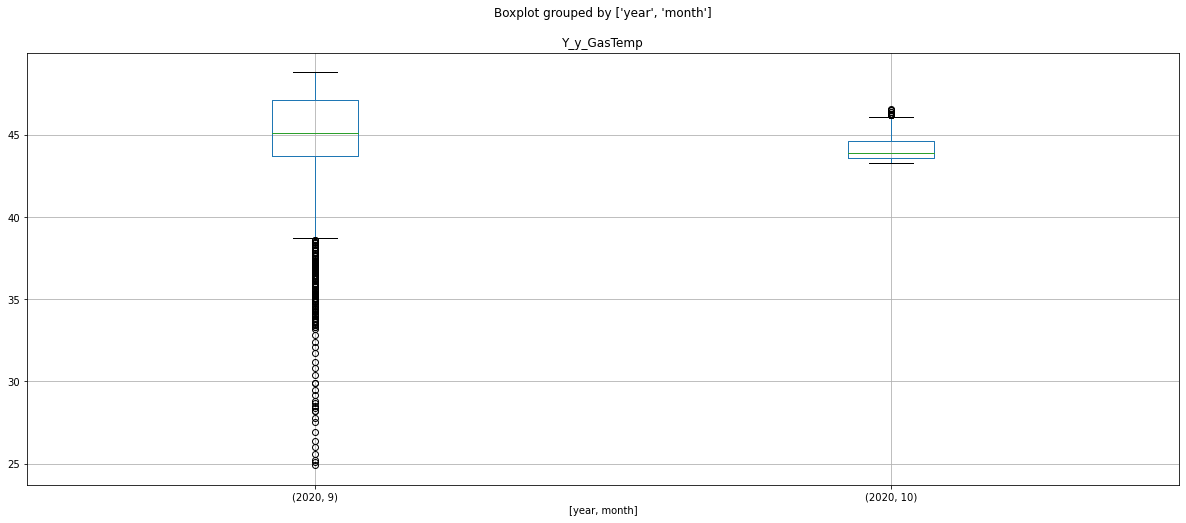

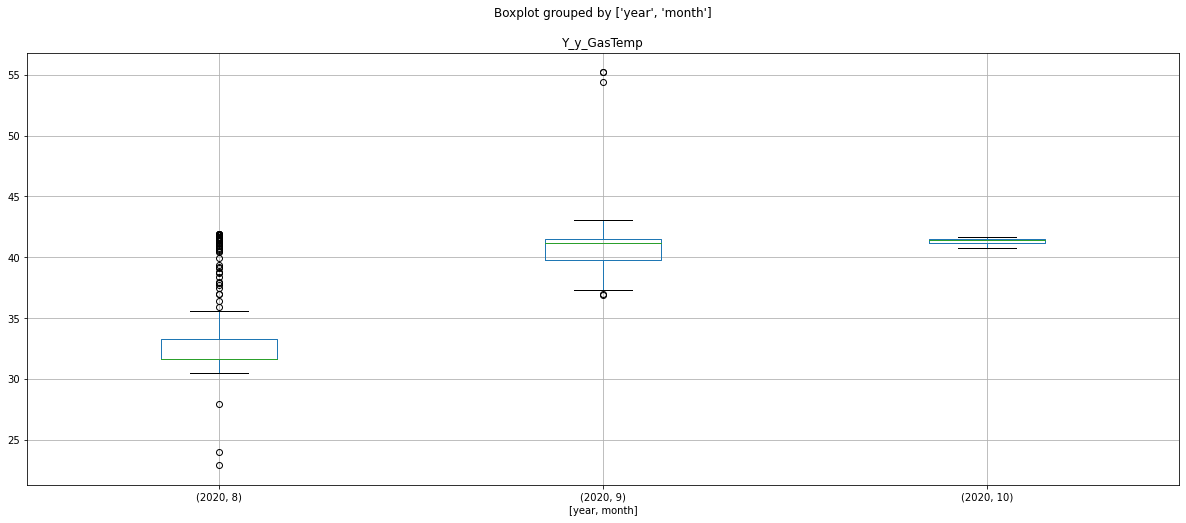

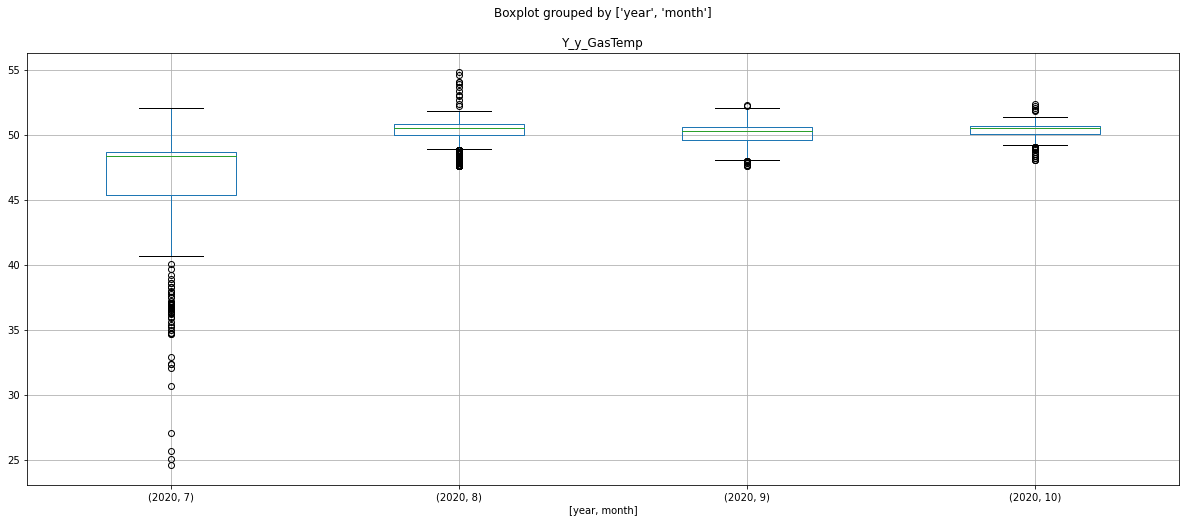

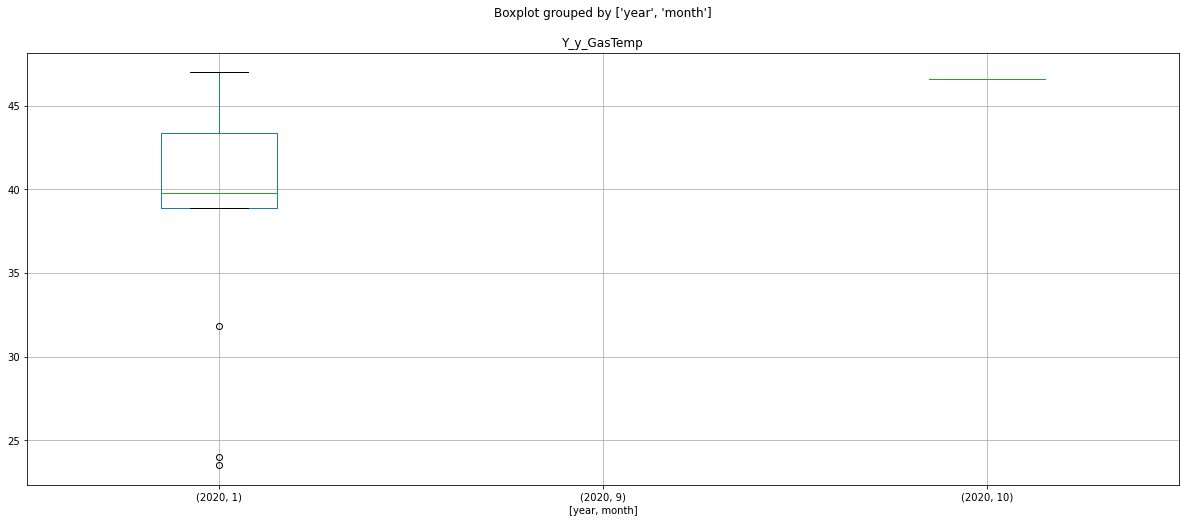

In [10]:
for i in list(data['equipmentNumber'].unique()):
    data[data['equipmentNumber']==i].boxplot(column=['Y_y_GasTemp'], by=['year', 'month'], figsize = (20,8))

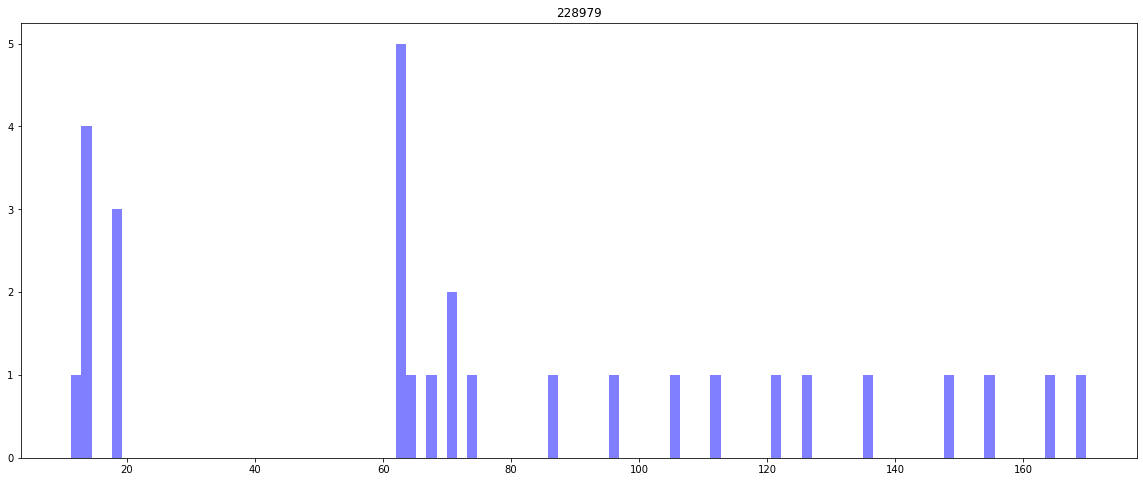

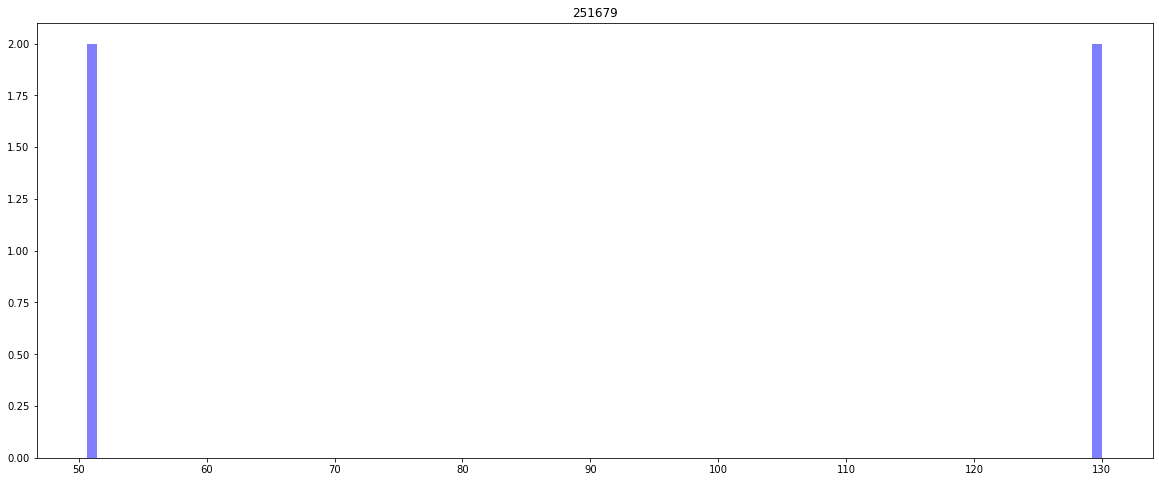

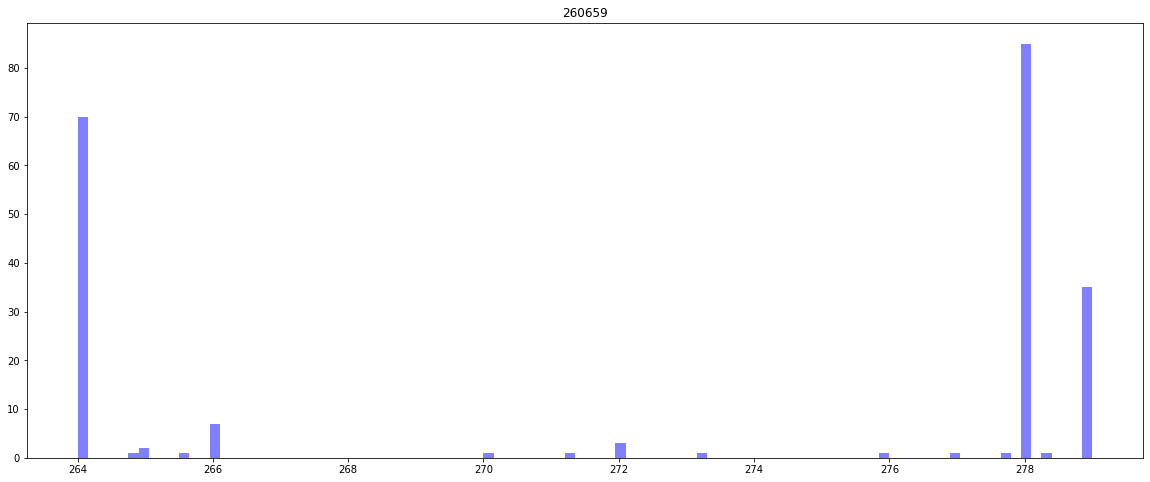

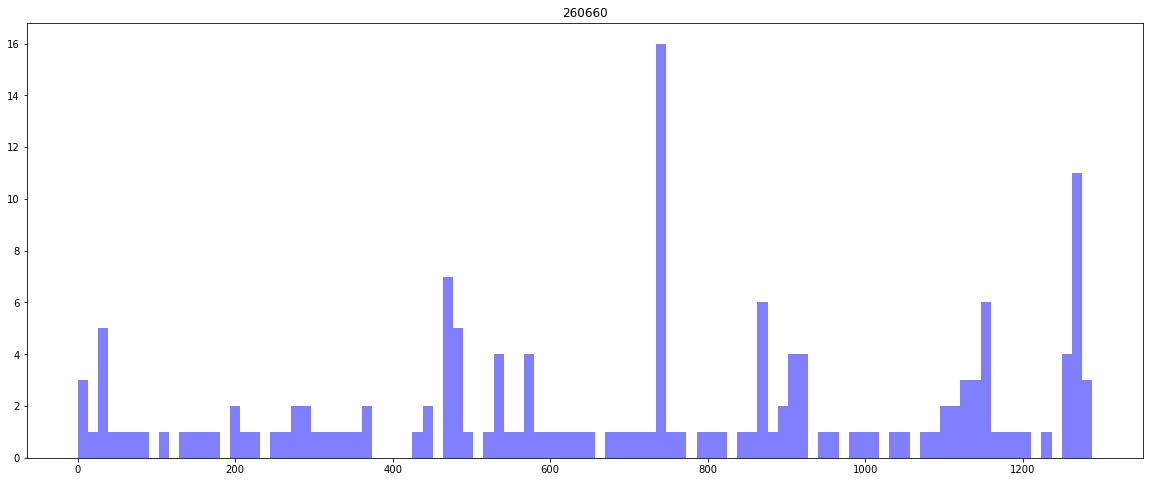

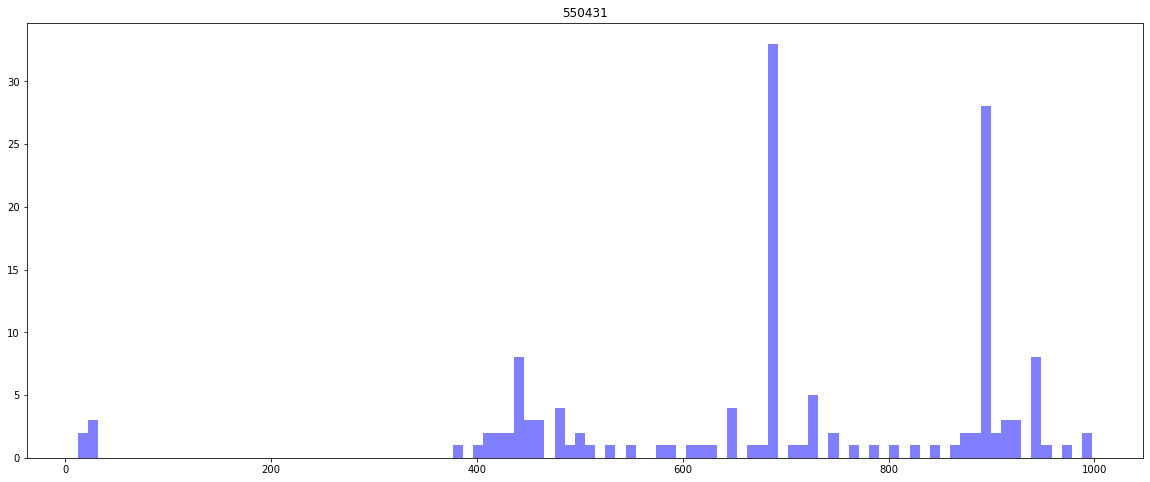

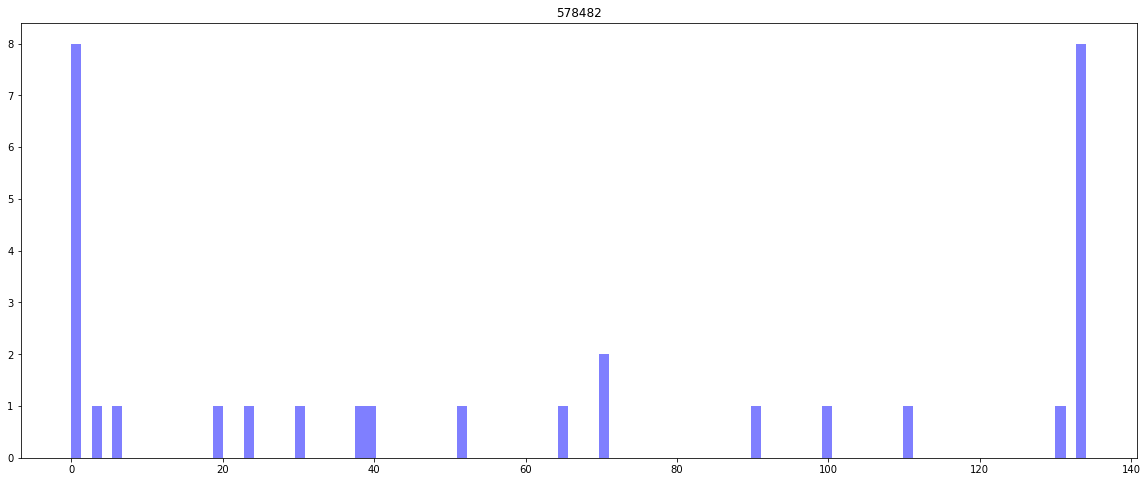

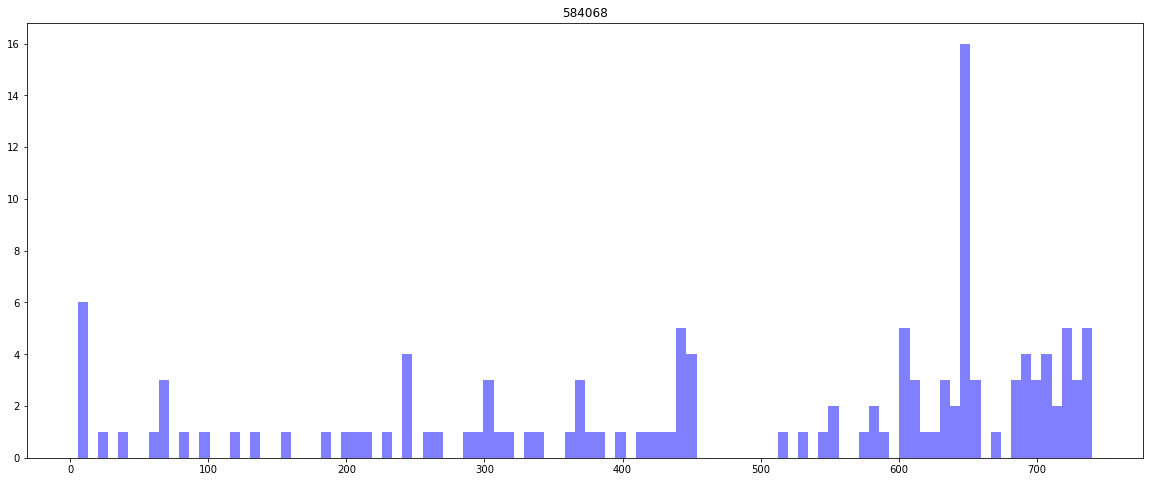

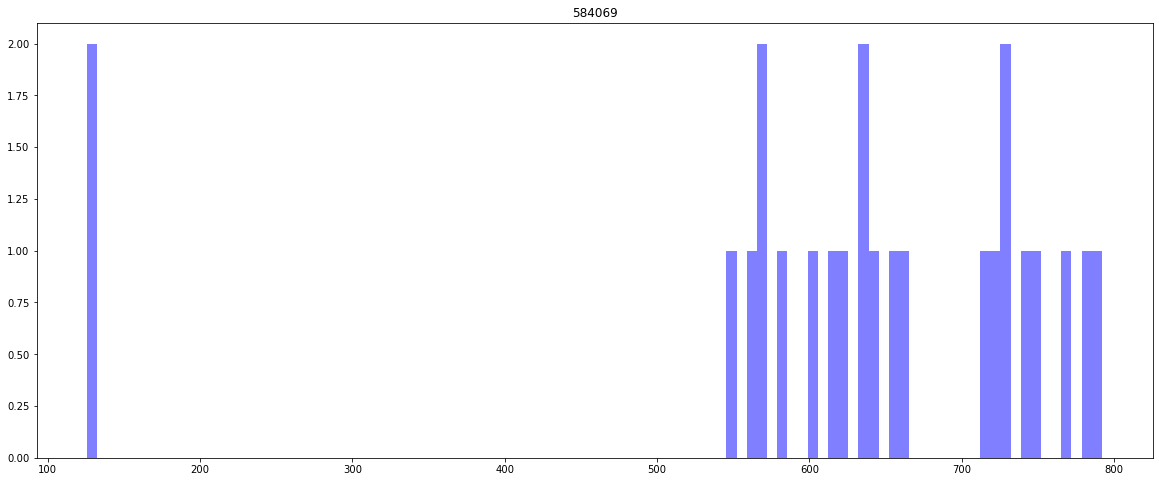

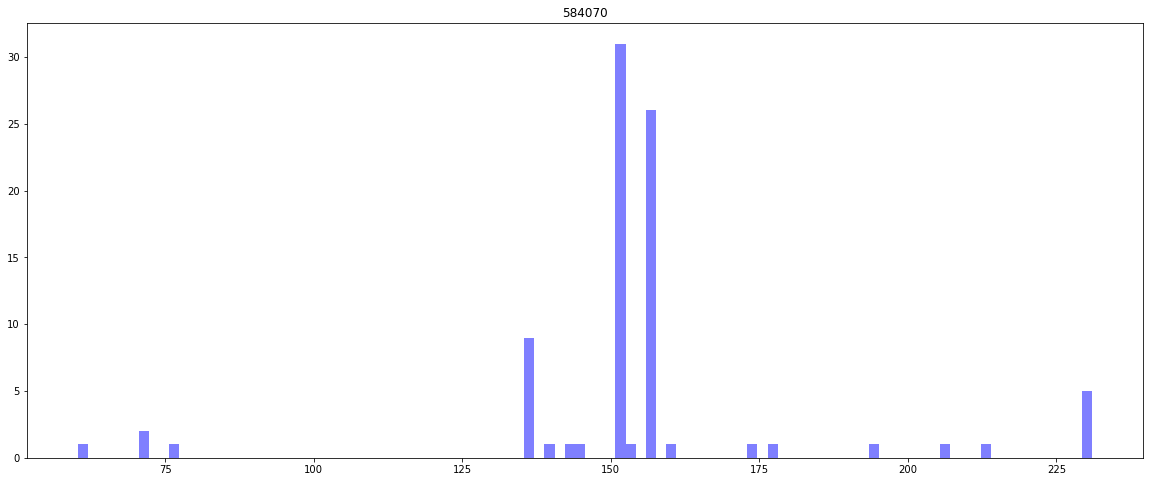

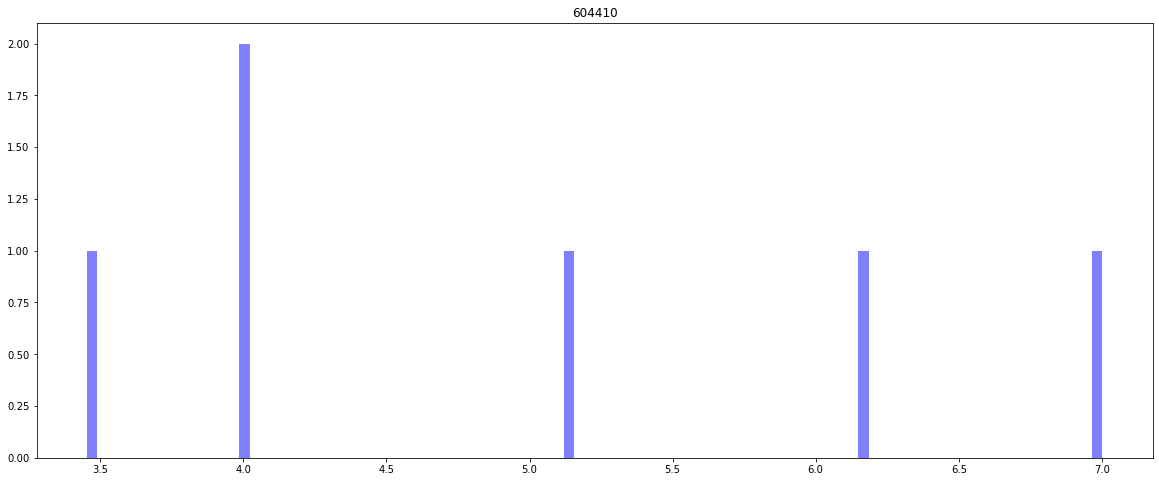

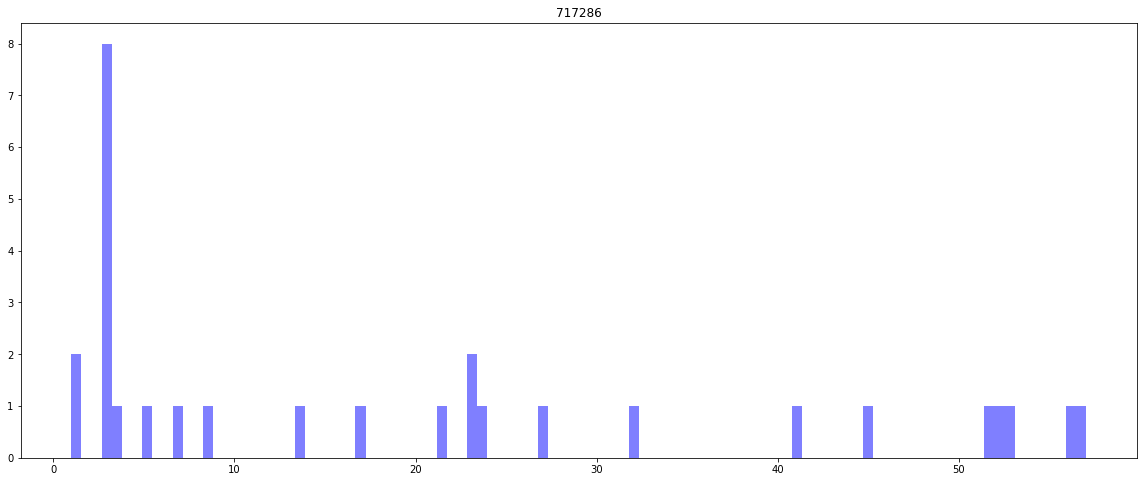

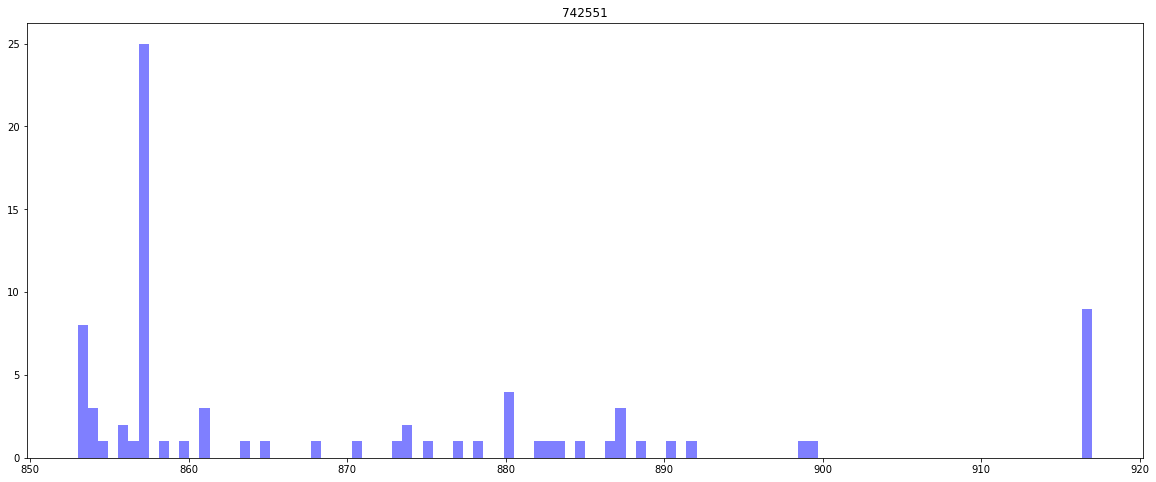

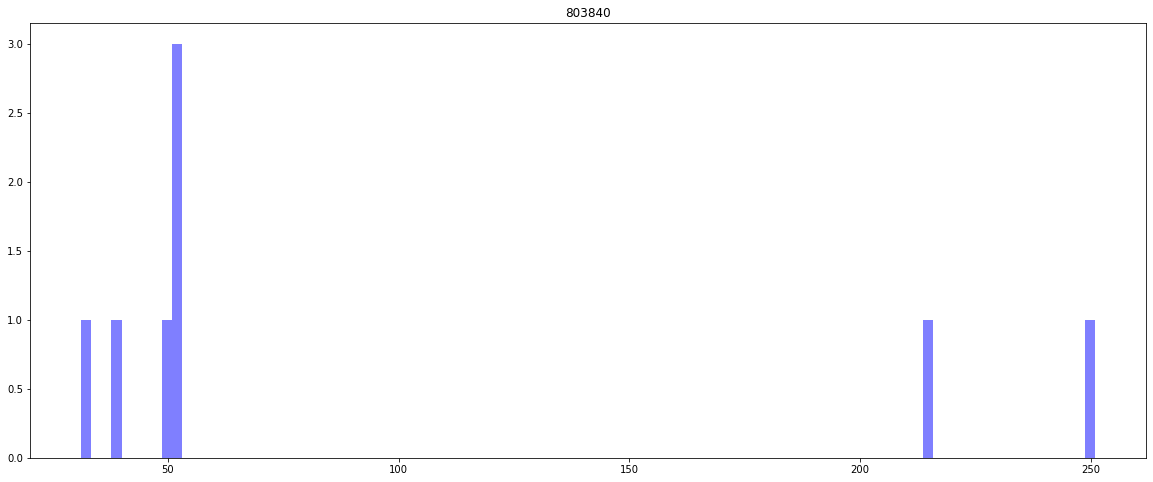

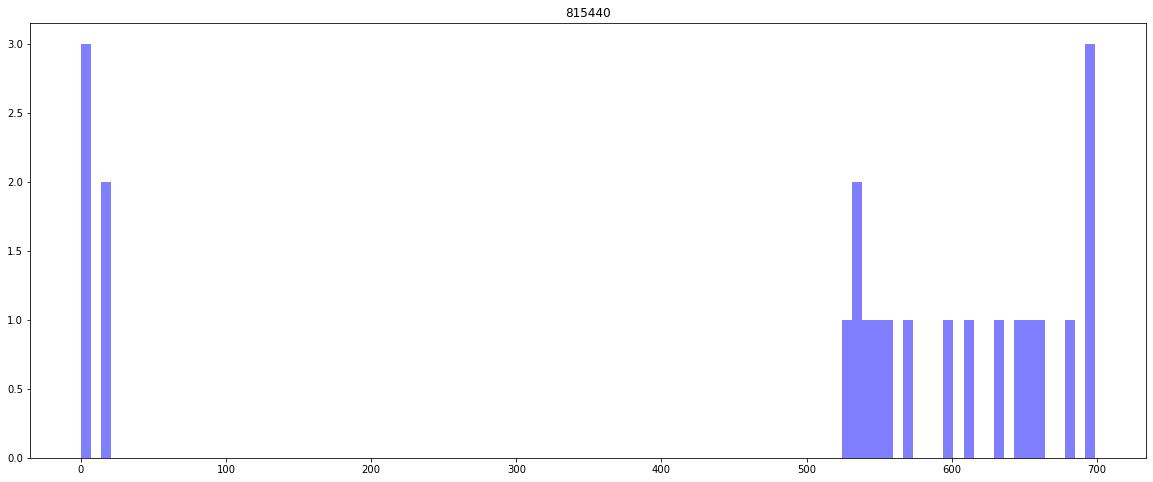

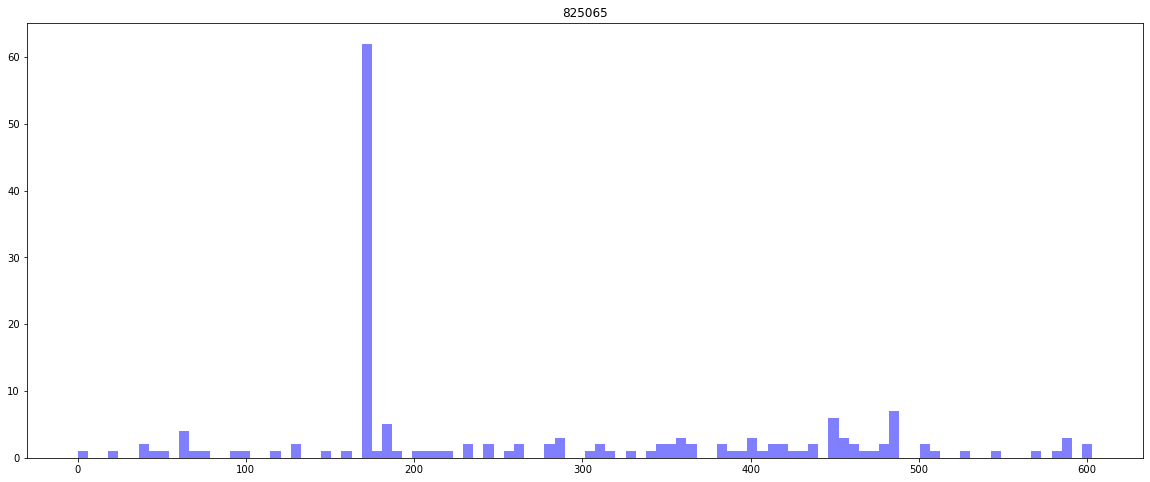

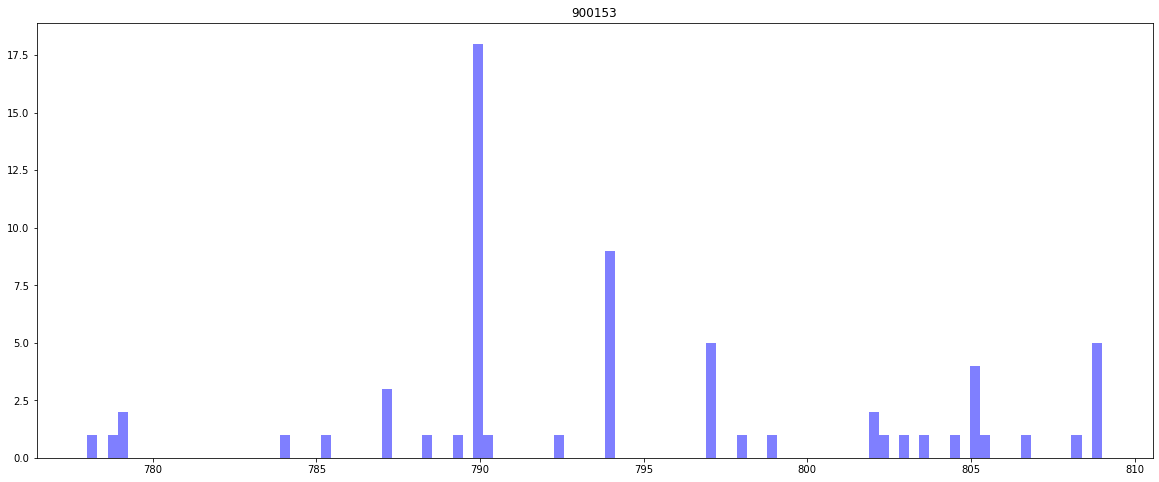

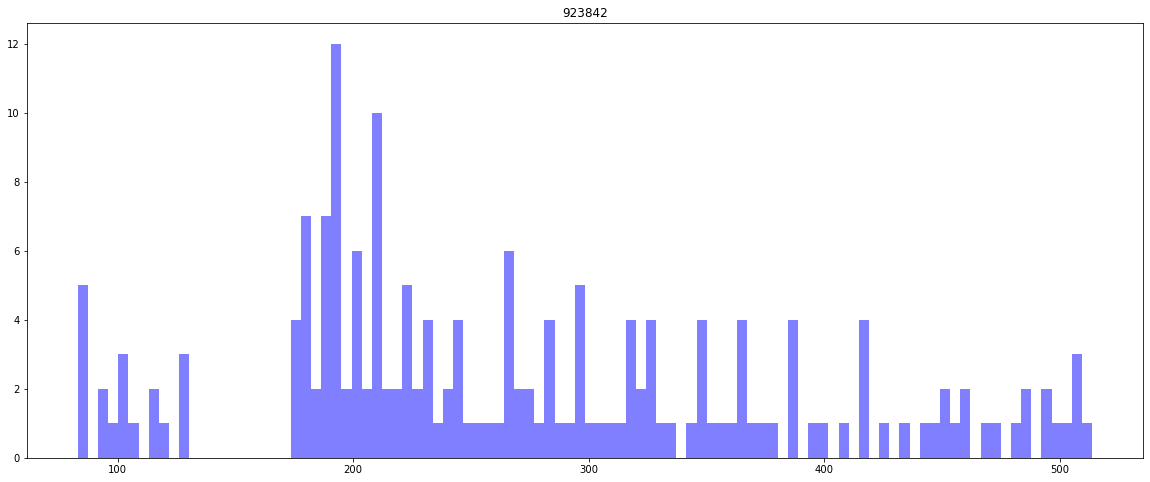

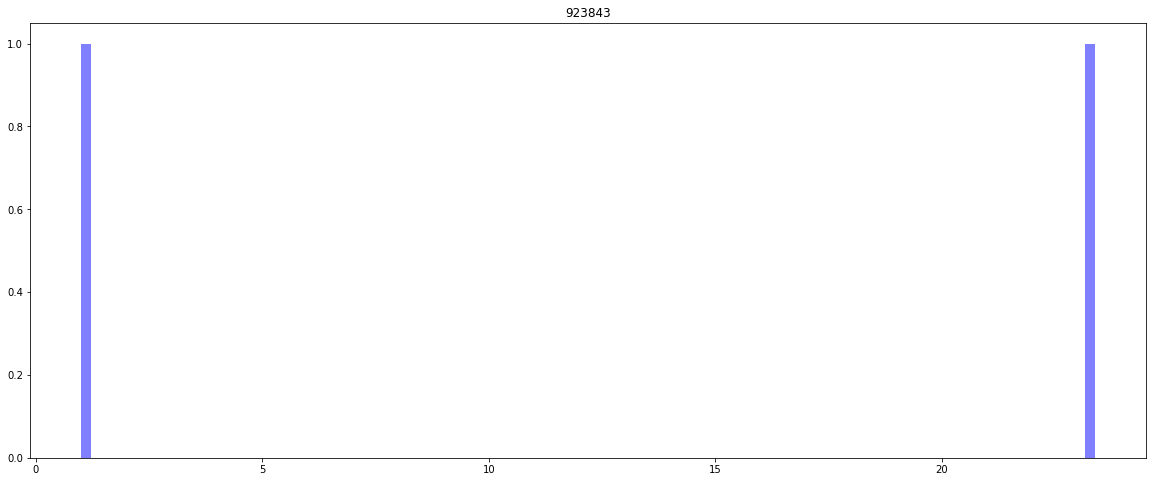

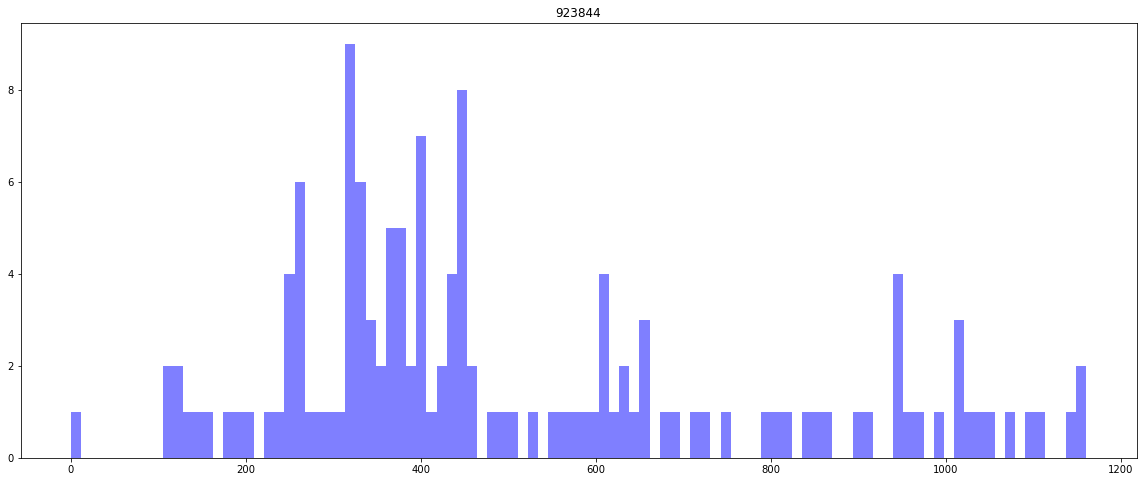

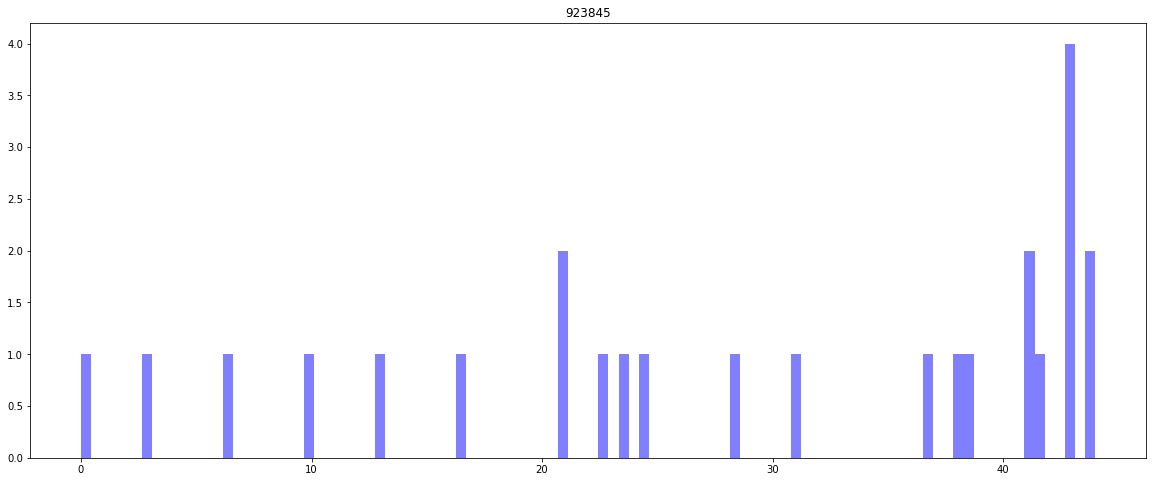

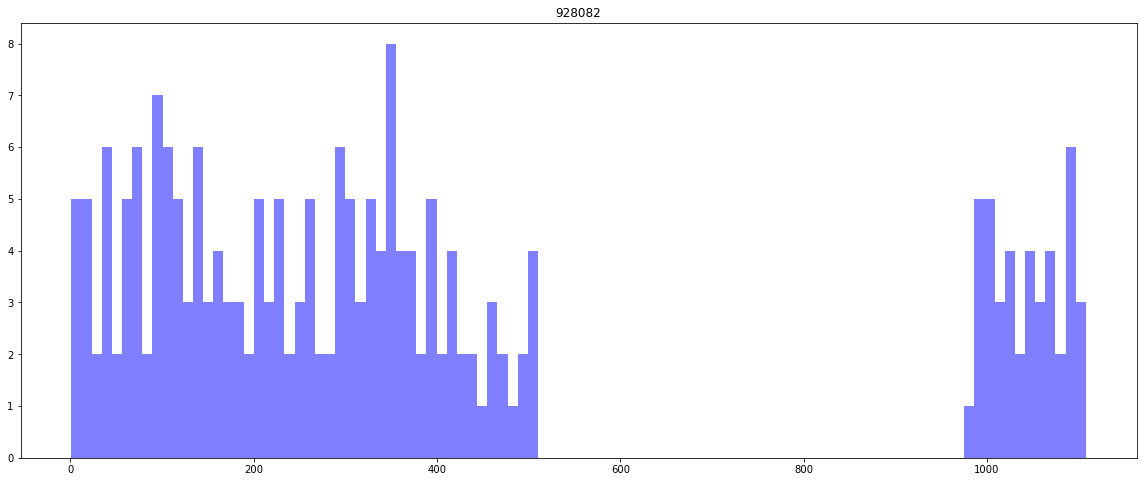

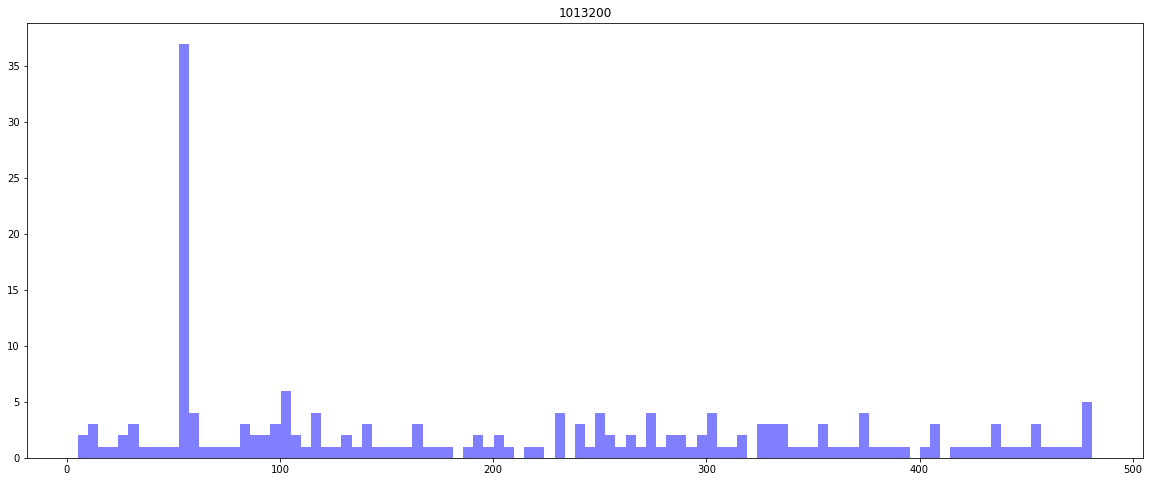

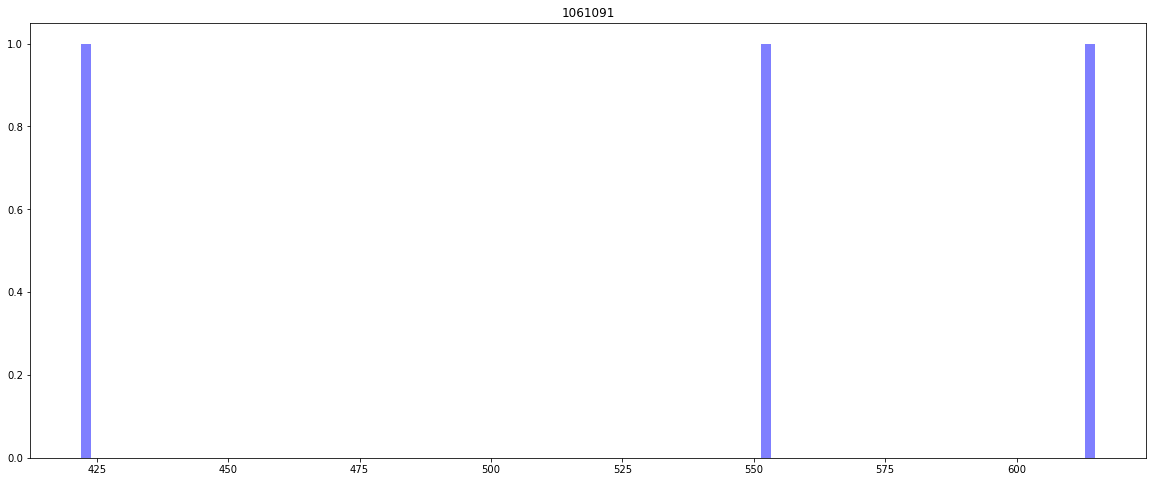

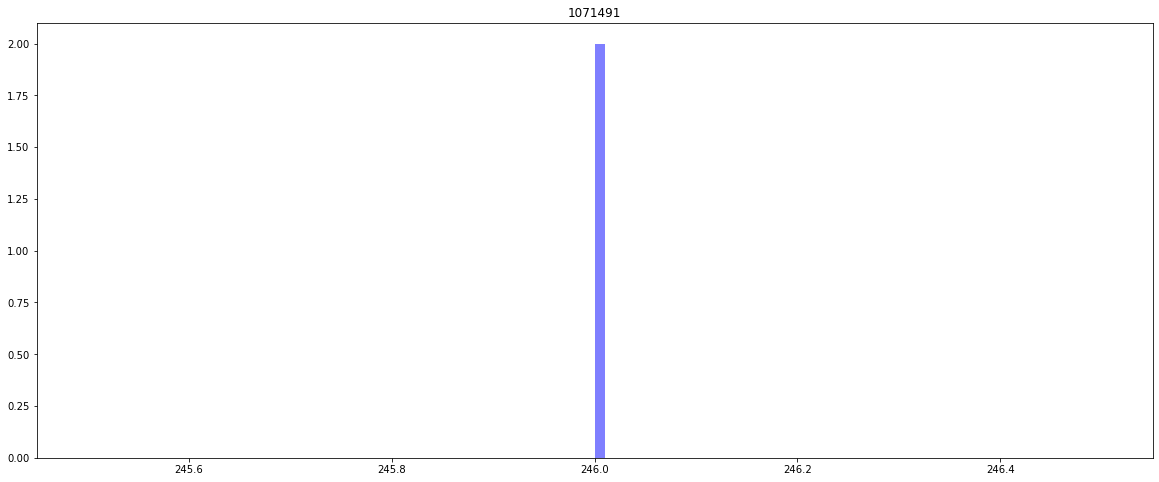

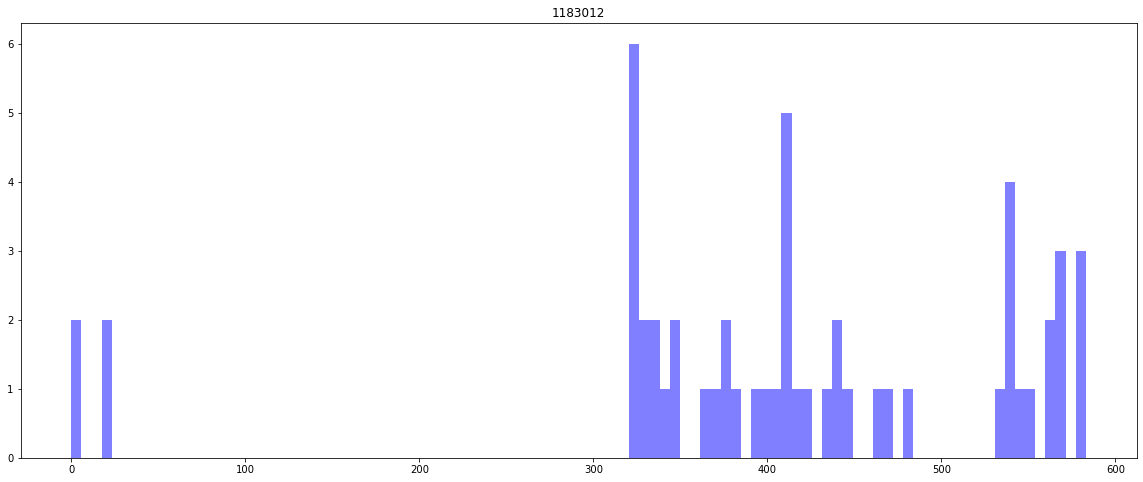

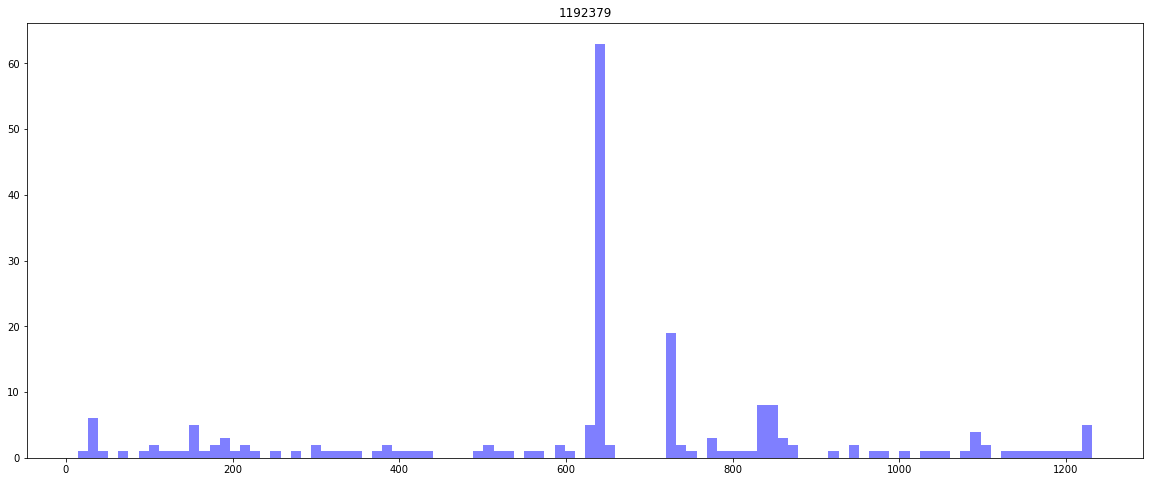

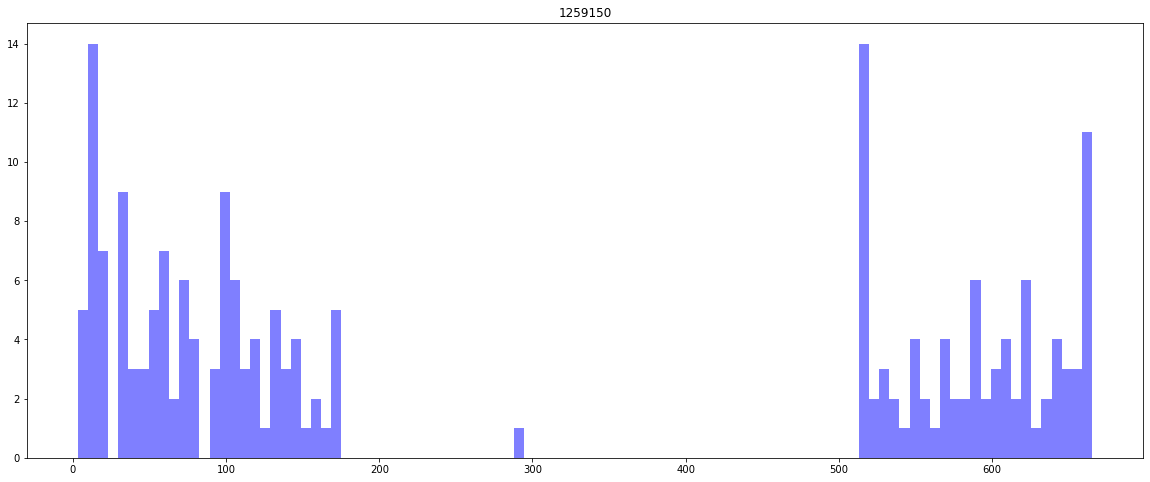

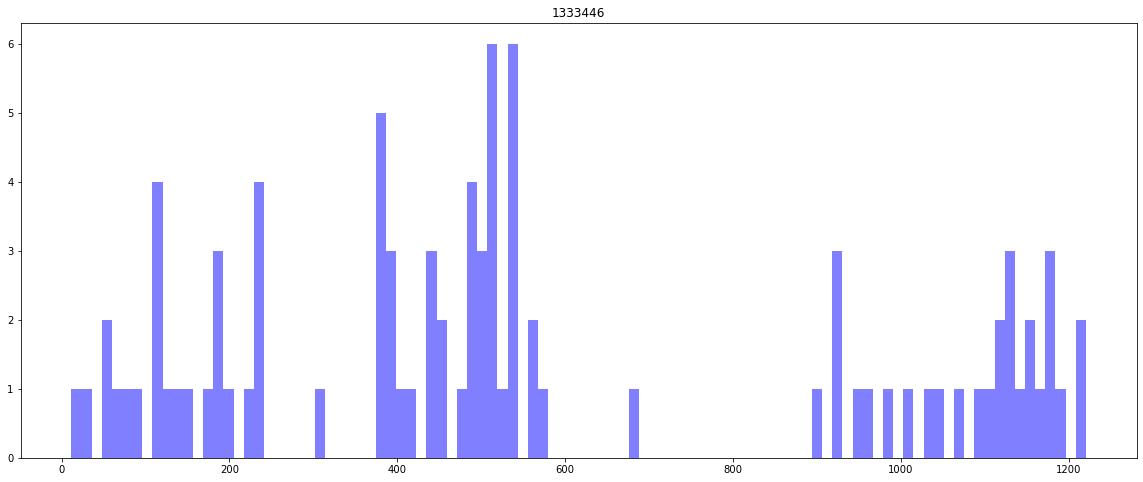

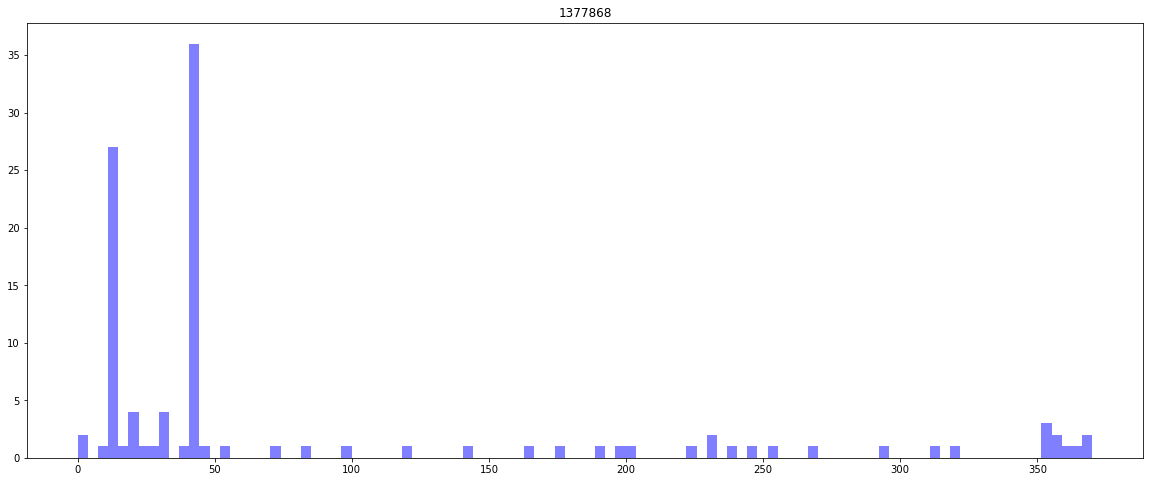

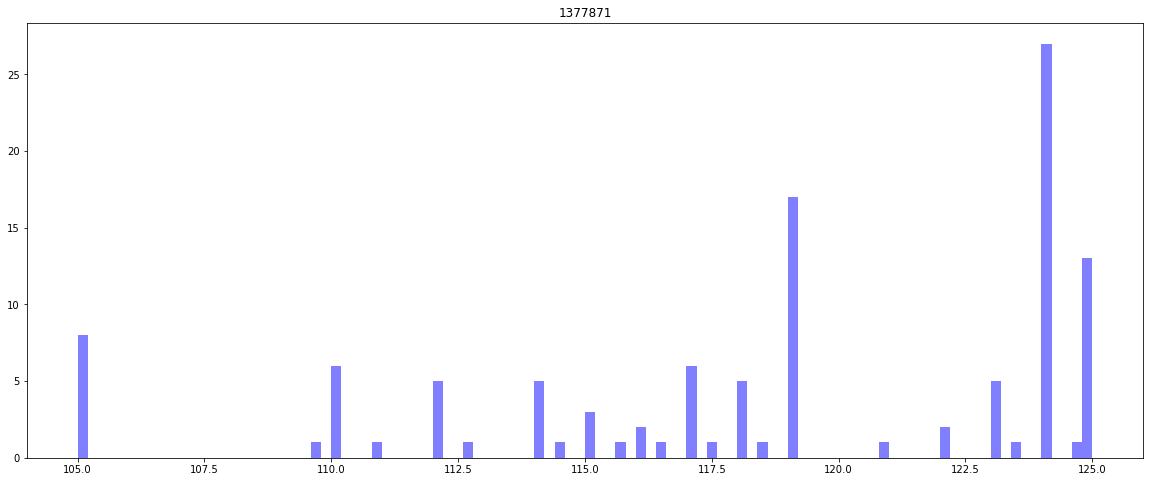

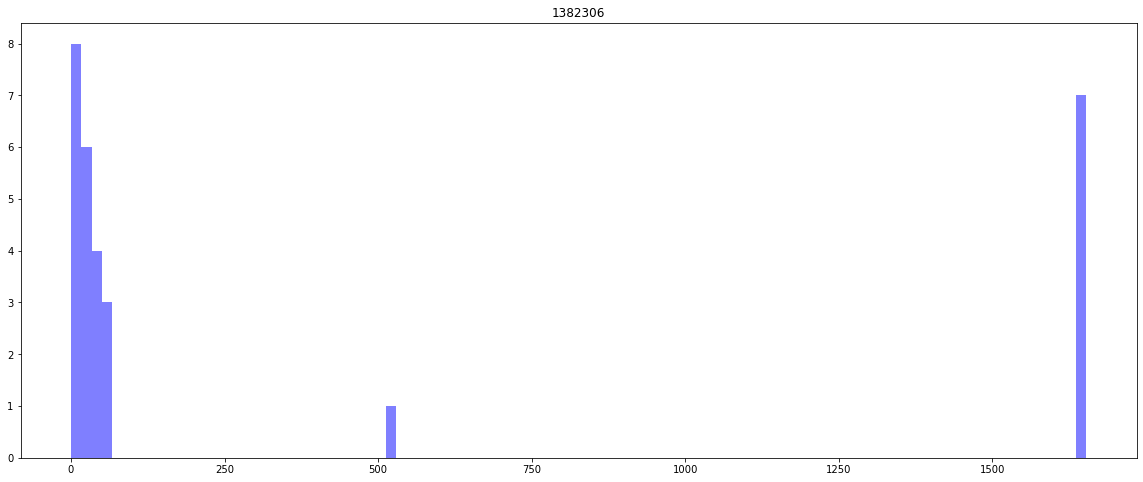

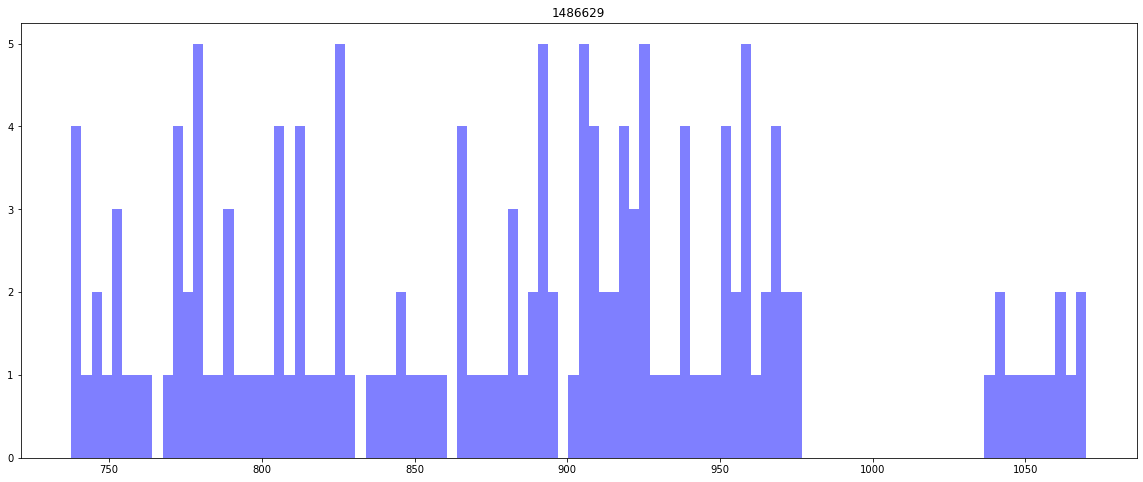

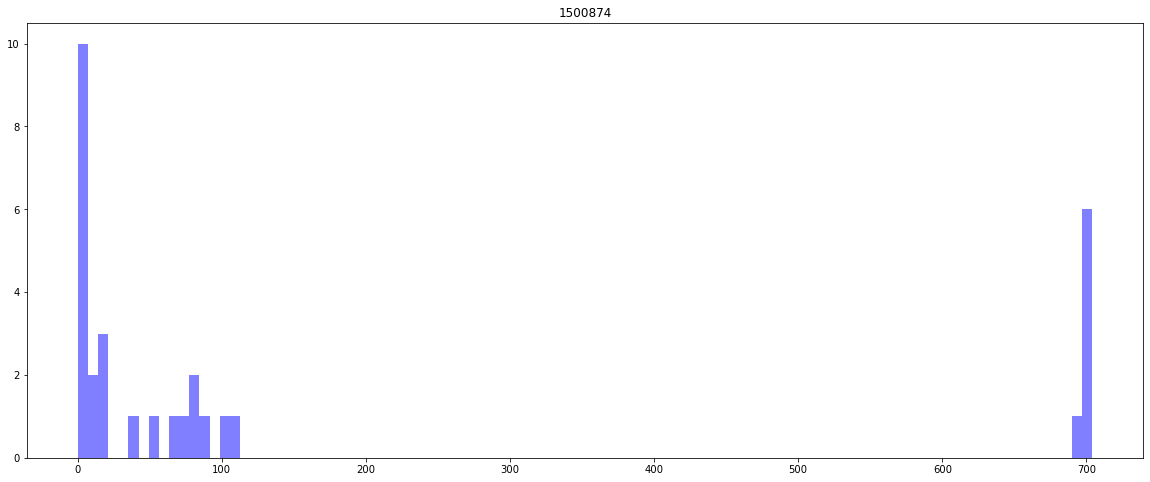

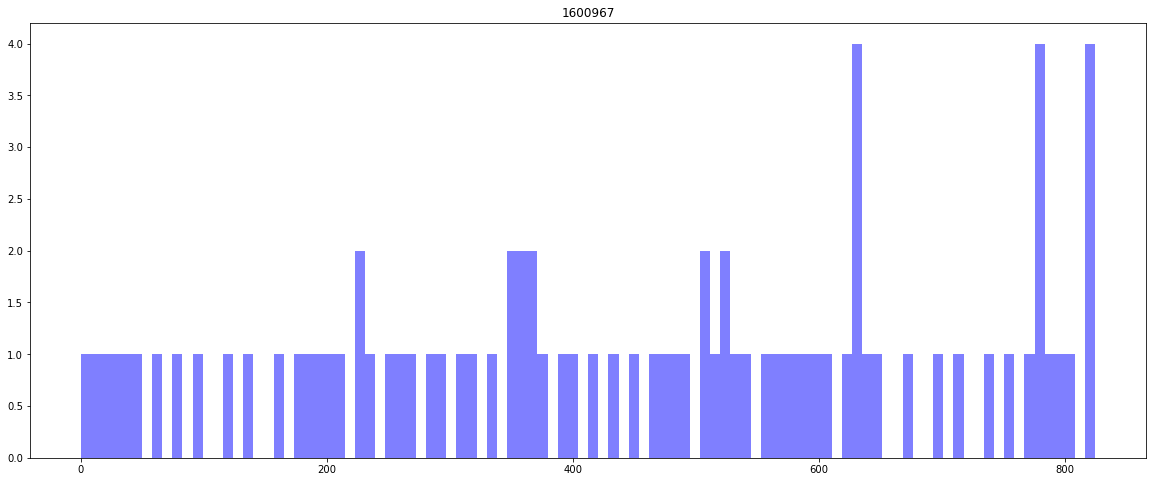

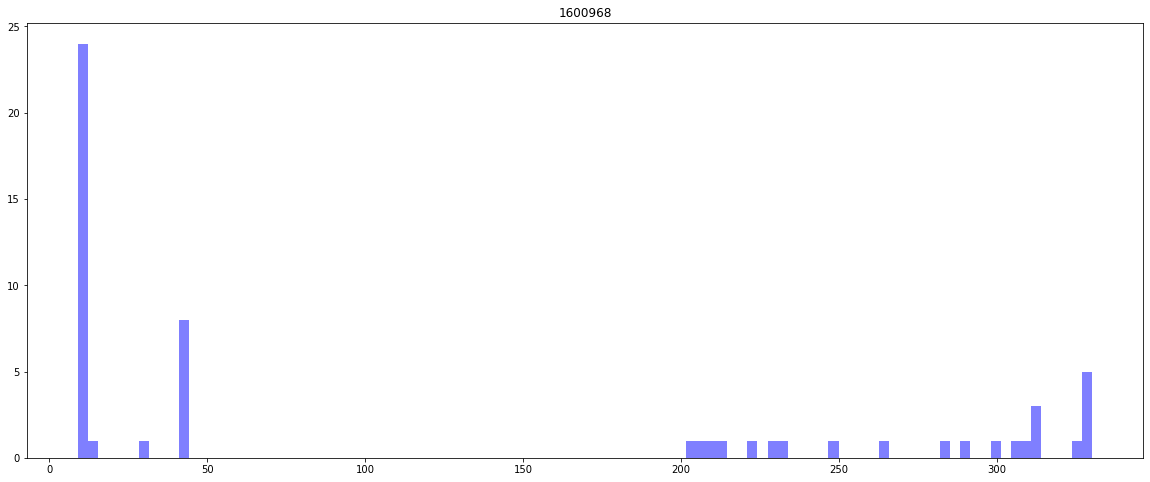

In [11]:
import warnings
warnings.filterwarnings('ignore')
for i in list(df['equipmentNumber'].unique()):
    #data[data['equipmentNumber']==i].boxplot(column=['P_x_-Hou_OperatingLastService'], by=['year', 'month'], figsize = (20,8))
    plt.figure(figsize=(20,8))
    plt.hist(df[df['equipmentNumber']==i]['P_x_SinceLastServiceHours'], 100, facecolor='blue', alpha=0.5)
    plt.title(i)
    plt.show()

In [46]:
out_of_range = pd.melt(dff, id_vars =['equipmentNumber'], value_vars =['P_x_SinceLastServiceHours','Y_y_mf_DILMFM','Y_y_GasTemp','Y_y_RelPressure', 'Y_y_Flow', 'Y_y_TECoolerHumidity',
       'Y_y_DilutionRatio', 'Y_y_MonitorDiode', 'Y_y_AbsPressure','Y_y_RelGasHumity']) 

In [47]:
out_of_range.rename(columns={'variable':'Channel name'},inplace=True)

In [48]:
df1 = pd.read_excel(r'D:\Device_Anomaly\data\channel_limits.xlsx')

In [49]:
df1.columns

Index(['Device', 'Channel name', 'Descriptive name', 'Value', 'Min', 'Max',
       'Default', 'Unit', 'State '],
      dtype='object')

In [50]:
out_of_range = out_of_range.merge(df1, on = 'Channel name')

In [51]:
out_of_range.rename(columns={'variable':'Channel name'},inplace=True)

In [52]:
out_of_range['flag'] = None
out_of_range['flag'] = np.where((out_of_range['value'] < out_of_range['Min']) | (out_of_range['value'] > out_of_range['Max']),1,0)

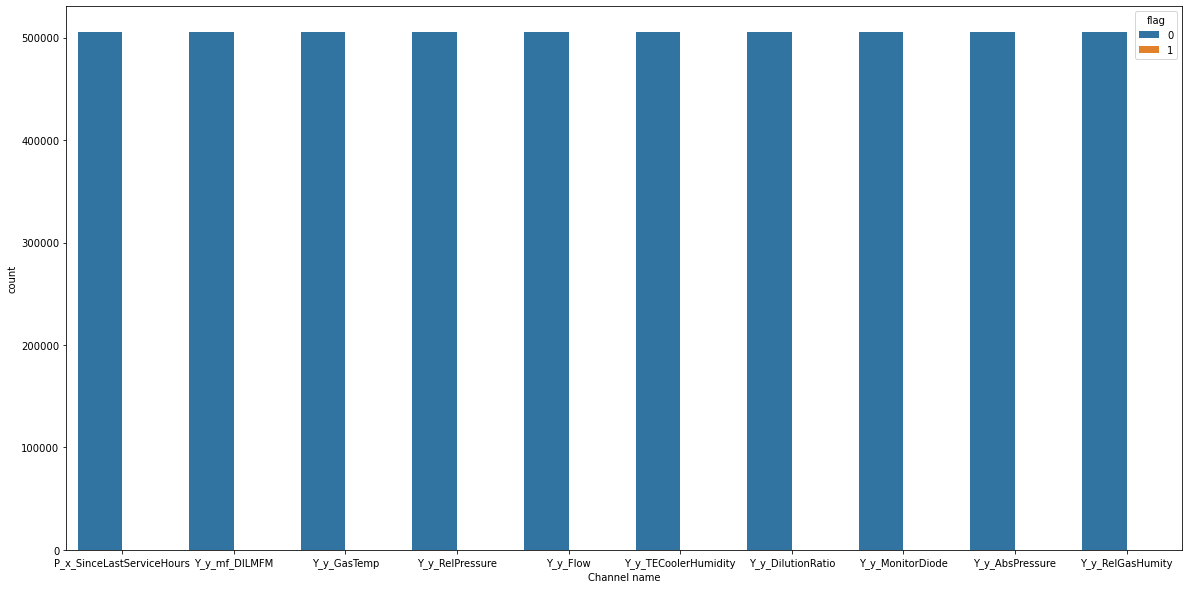

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.countplot(x="Channel name",hue="flag", data=out_of_range)

In [54]:
data = data.sort_values('time')

In [55]:
data['diff_new'] = (data.groupby('equipmentNumber').time.diff().dt.total_seconds().fillna(0))/60

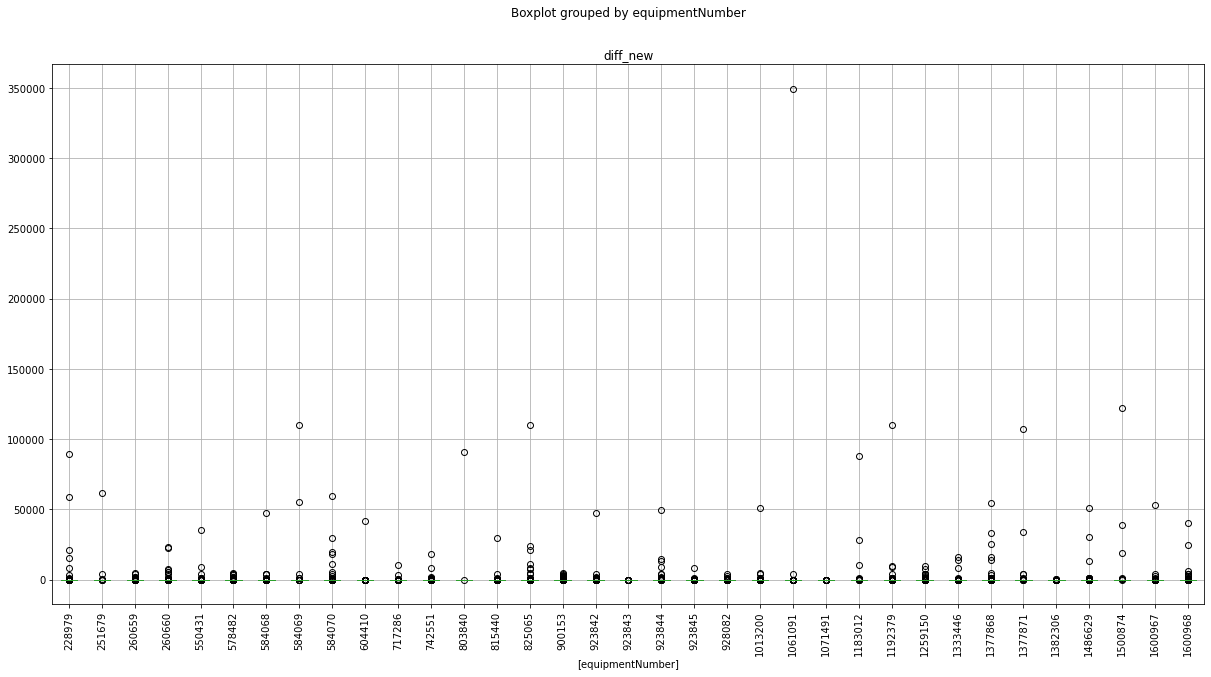

In [56]:
data.boxplot(column=['diff_new'], by=['equipmentNumber'], figsize = (20,10),rot=90)

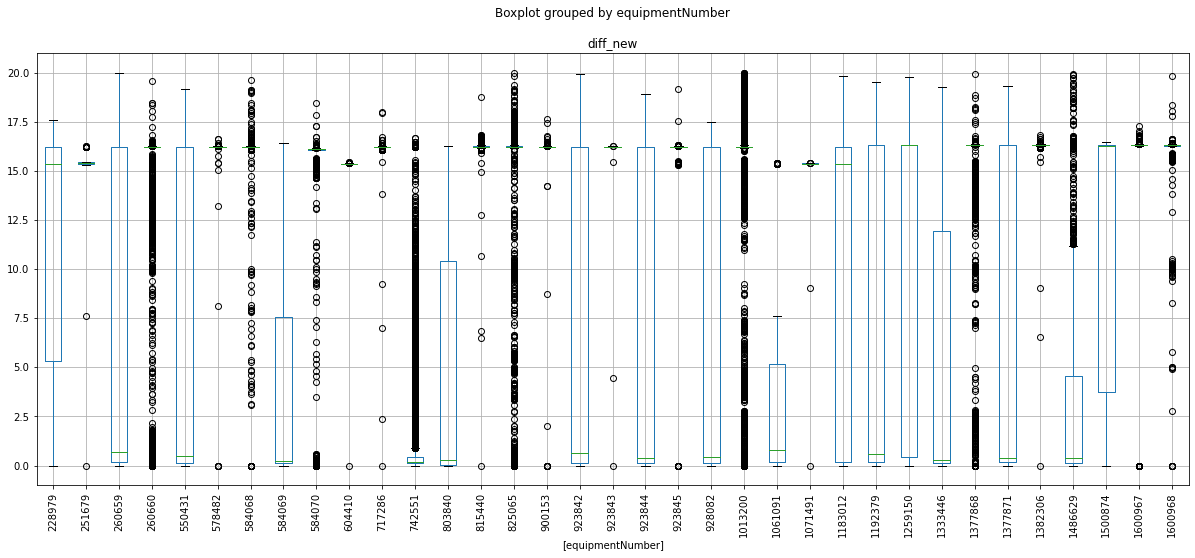

In [44]:
data[data['diff_new']<=20].boxplot(column=['diff_new'], by=['equipmentNumber'], figsize = (20,8),rot=90)

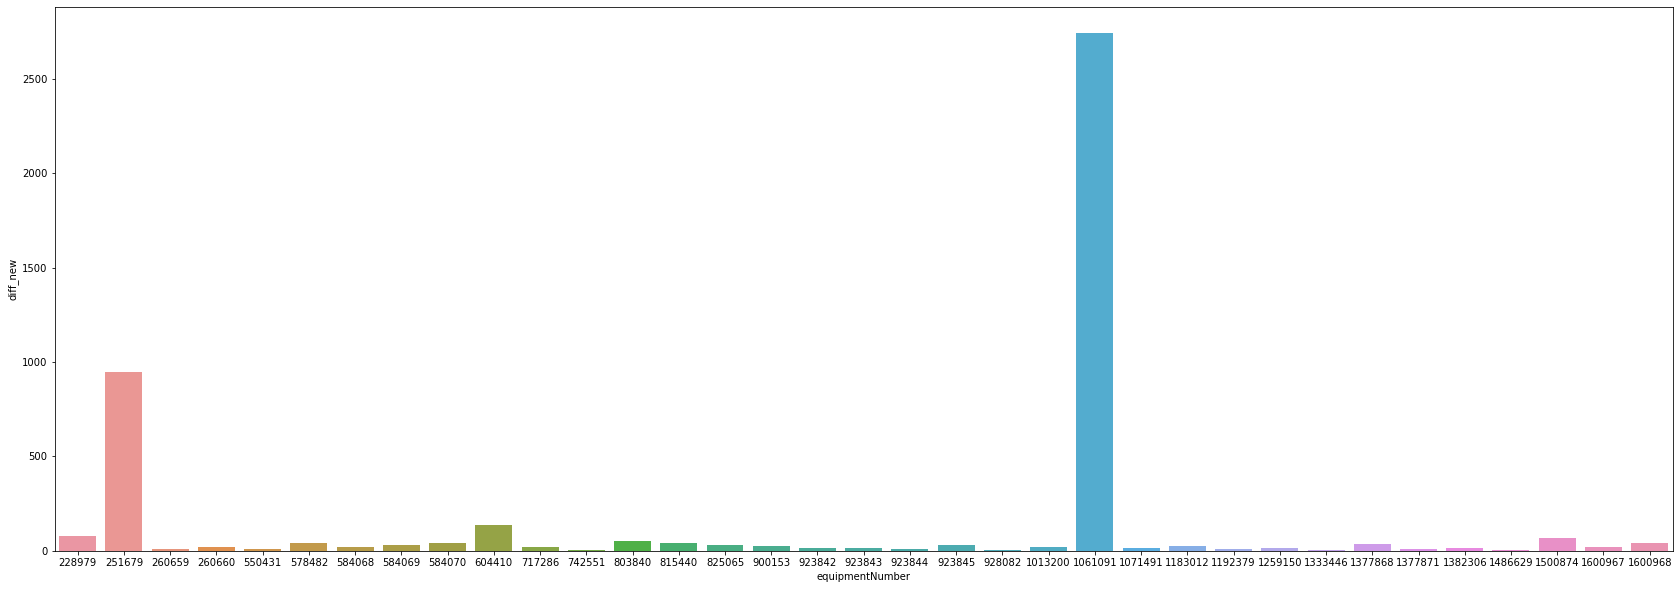

In [45]:
data1 = pd.DataFrame(data.groupby('equipmentNumber').diff_new.mean()).reset_index()
fig, ax = plt.subplots()
fig.set_size_inches(29, 10)
ax = sns.barplot(x="equipmentNumber", y="diff_new", data=data1)
